Before we get started on working out any new systems, it will be fruitful to simply implement a version of Conway's Game of Life. 

The rules to this game are simple. 

We shall implement a 50 x 50 lattice with periodic boundary conditions. Each element of this lattice will either be "alive" or "dead", indicated by a 1 or a zero.

Now, we can apply a condition for each element of the lattice.

If a lattice element is alive, then 
    if there are 2 or 3 live neighbors, i.e neighobor sums  = 2 or 3, then it stays alive.
    else it dies
If a lattice element is dead, then
    if it has 3 live neighbors, i.e neighbor sums = 3, then it becomes alive
    else it stays dead
    
These are the only rules to the game, however we need to apply these rules simultaneously to all lattice elements. This will be rather difficult.

We should note that we will be able to use a lot of the same code as the Ising Model system with respect to plotting our lattices.

1. Let's import some packages that will help us plot our stuff.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rng
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from tqdm import tqdm

2. Let's commandeer some functions from the Ising Model for plotting purposes.

In [23]:
def normallattice(N, M, value=0):
    '''
    This function returns an N (rows) x M (columns) lattice with identical values value
    '''
    return np.full((N, M), value)
def plotlattice(lattice):
    plt.imshow(lattice,cmap = "binary")
    plt.show()


Here is where we have the ability to generate variations on the classical GameOfLife. By changing NeighborSums or by changing pointChange, we are able to modify how our lattice changes with respect to its neightbors.

In [24]:
def neighborSumsReg(lattice, i, j):
    '''
    Sums the spins of the lattice points at four neighbor sites.
        Takes into account the size of the lattice in 
        terms of number of rows (i) and columns (j),
        thus implementing periodic boundary conditions.
    '''
    ip = (i + 1) % len(lattice)
    im = (i - 1) % len(lattice)
    jp = (j + 1) % len(lattice[0])
    jm = (j - 1) % len(lattice[0])
        

    return (lattice[ip][j] + lattice[im][j]+ lattice[i][jp] + lattice[i][jm] + lattice[ip][jp] + lattice[ip][jm] +lattice[im][jp] + lattice[im][jm])
def neighborSumsUpperRight(lattice, i, j):
    '''
    Sums the spins of the lattice points at four neighbor sites.
        Takes into account the size of the lattice in 
        terms of number of rows (i) and columns (j),
        thus implementing periodic boundary conditions.
    '''
    ip = (i + 1) % len(lattice)
    im = (i - 1) % len(lattice)
    jp = (j + 1) % len(lattice[0])
    jm = (j - 1) % len(lattice[0])
        

    return (lattice[ip][j] + lattice[im][j]+ lattice[i][jp] + lattice[i][jm] + 2*lattice[ip][jp] + lattice[ip][jm] +lattice[im][jp] + lattice[im][jm])

def neighborSums0(lattice, i, j):
    return 0
def pointChangeB3S23(lattice,i,j,func = neighborSums):
    if lattice[i][j] == 1:
        if func(lattice,i,j) == 2 or func(lattice,i,j) == 3:
            return 1
        else:
            return 0
    else:
        if func(lattice,i,j) == 3:
            return 1
        else:
            return 0

def pointChangeInverseB3S23(lattice,i,j,func = neighborSums):
    if lattice[i][j] == 1:
        if func(lattice,i,j) != 2 and func(lattice,i,j) != 3:
            return 1
        else:
            return 0
    else:
        if func(lattice,i,j) != 3:
            return 1
        else:
            return 0

NameError: name 'neighborSums' is not defined

Now we shall try and make an arbitrary function that follows the form of B#S#. For now, we shall simply keep the standard NeighborSums, since it will be a good exercise to explore this class first. 

For shits, we shall also create an arbitrary NeighborSums though.


The notation for the location weightings will be:

0 1 2

3  c  4

5 6 7

In [134]:
def pointChange(lattice,i,j,BornNums,SurvNums,locs,vals):
    if lattice[i][j] == 1:
        for num in SurvNums:
            if neighborSums(lattice,i,j,locs,vals) == num:
                return 1
        return 0
    else:
        for num in BornNums:
            if neighborSums(lattice,i,j,locs,vals) == num:
                return 1
        return 0
    
def neighborSums(lattice, i , j, locs, vals):
    ip = (i + 1) % len(lattice)
    im = (i - 1) % len(lattice)
    jp = (j + 1) % len(lattice[0])
    jm = (j - 1) % len(lattice[0])
    weight = [1 for i in range(8)]
    for k in range(len(locs)):
        weight[locs[k]] = vals[k]
    
    x = (weight[0]*lattice[im][jm] + weight[1]*lattice[i][jm] + weight[2]*lattice[ip][jm] + weight[3]*lattice[im][j] + weight[4]*lattice[ip][j] + weight[5]*lattice[im][jp] + weight[6]*lattice[i][jp] + weight[7]*lattice[ip][jp])
    return x
    

In [112]:
# def neighborSums(lattice, i , j, locs, vals):
#     ip = (i + 1) % len(lattice)
#     im = (i - 1) % len(lattice)
#     jp = (j + 1) % len(lattice[0])
#     jm = (j - 1) % len(lattice[0])
#     weight = [1 for i in range(8)]
#     for i in range(len(locs)):
#         weight[locs[i]] = vals[i]
#     return (weight[0]*lattice[jp][im] + weight[1]*lattice[jp][i] + weight[2]*lattice[jp][ip] + weight[3]*lattice[j][im] + weight[4]*lattice[j][ip] + weight[5]*lattice[jm][im] + weight[6]*lattice[jm][i] + weight[7]*lattice[jm][ip])


Now that we have that, we are able to translate these different functions into behaviors of the code.

In [209]:
def singleStep(lattice, B, S, locs,vals) :
    output = normallattice(len(lattice),len(lattice[0]))
    for i in range(len(lattice)):
        for j in range(len(lattice[i])):
            output[i][j] = pointChange(lattice,i,j,B,S,locs,vals)
    return output

def manyStepsOnePlot(lattice,num_steps,B = [3], S = [2,3],locs = [] , vals = [] , analysis = False,boundary = False) :
    if boundary:
        if analysis:
            sumList = [0 for i in range(num_steps)]
            distanceList = [0 for i in range(num_steps)]
            for i in range(num_steps):
                lattice = singleStepBound(lattice,B,S,locs,vals)
                sumList[i],distanceList[i] = numAliveAndDistance(lattice)
                plotlattice(lattice)
            plotStuff(sumList,distanceList)
            return lattice,sumList,distanceList
    
        else:
            for i in range(num_steps):
                lattice = singleStepBound(lattice,B,S,locs,vals)
                plotlattice(lattice)
            return lattice
    else:
        if analysis:
            sumList = [0 for i in range(num_steps)]
            distanceList = [0 for i in range(num_steps)]
            for i in range(num_steps):
                lattice = singleStep(lattice,B,S,locs,vals)
                sumList[i],distanceList[i] = numAliveAndDistance(lattice)
                plotlattice(lattice)
            plotStuff(sumList,distanceList)
            return lattice,sumList,distanceList
    
        else:
            for i in range(num_steps):
                lattice = singleStep(lattice,B,S,locs,vals)
                plotlattice(lattice)
            return lattice
        


In [3]:
size = 200
lattice= normallattice(200,200)
lattice[int(size/2)][int(size/2)] = 1
# lattice[52][50] = 1
# lattice[51][50] = 1
lattice = manyStepsOnePlot(lattice,100, B = [1], S = [2,3,4,5])

NameError: name 'normallattice' is not defined

In [2]:
size = 200
lattice= normallattice(200,200)
lattice[int(size/2)][int(size/2)] = 1
# lattice[52][50] = 1
# lattice[51][50] = 1
lattice = manyStepsOnePlot(lattice,100, B = [1,2], S = [2,3,4,5])

NameError: name 'normallattice' is not defined

In [1]:
size = 200
lattice= normallattice(200,200)
lattice[int(size/2)][int(size/2)] = 1
# lattice[52][50] = 1
# lattice[51][50] = 1
lattice = manyStepsOnePlot(lattice,100, B = [1,2,3], S = [2,3,4,5])

NameError: name 'normallattice' is not defined

In [4]:
size = 200
lattice= normallattice(200,200)
lattice[int(size/2)][int(size/2)] = 1
# lattice[52][50] = 1
# lattice[51][50] = 1
lattice = manyStepsOnePlot(lattice,100, B = [1,2,3,4], S = [2,3,4,5])

NameError: name 'normallattice' is not defined

In [5]:
size = 200
lattice= normallattice(200,200)
lattice[int(size/2)][int(size/2)] = 1
# lattice[52][50] = 1
# lattice[51][50] = 1
lattice = manyStepsOnePlot(lattice,100, B = [1,2,3,4,5], S = [2,3,4,5])

NameError: name 'normallattice' is not defined

In [6]:
size = 200
lattice= normallattice(200,200)
lattice[int(size/2)][int(size/2)] = 1
# lattice[52][50] = 1
# lattice[51][50] = 1
lattice = manyStepsOnePlot(lattice,100, B = [1,2,3,4,5,6], S = [2,3,4,5])

NameError: name 'normallattice' is not defined

In [7]:
size = 200
lattice= normallattice(200,200)
lattice[int(size/2)][int(size/2)] = 1
# lattice[52][50] = 1
# lattice[51][50] = 1
lattice = manyStepsOnePlot(lattice,100, B = [1,2,3,4,5,6,7], S = [2,3,4,5])

NameError: name 'normallattice' is not defined

In [8]:
size = 200
lattice= normallattice(200,200)
lattice[int(size/2)][int(size/2)] = 1
# lattice[52][50] = 1
# lattice[51][50] = 1
lattice = manyStepsOnePlot(lattice,100, B = [1,2,3,4,5,6,7,8], S = [2,3,4,5])

NameError: name 'normallattice' is not defined

Edward Frenkin's Replicator

In [9]:
size = 128
lattice= normallattice(size,size)
lattice[int(size/2) +1][int(size/2)] = 1
lattice[int(size/2)][int(size/2)] = 1
lattice = manyStepsOnePlot(lattice,100, B = [1,3,5,7], S = [1,3,5,7])

NameError: name 'normallattice' is not defined

In [10]:

lattice = manyStepsOnePlot(lattice,200, B = [3], S = [2,3])

NameError: name 'manyStepsOnePlot' is not defined

Now that we can do this, let's make a glider.

In [220]:
def PutGlider(lattice,i,j):
    lattice[i% len(lattice)][j% len(lattice[0])] = 1
    lattice[i% len(lattice)][(j+2) % len(lattice[0])] = 1
    lattice[(i+1)% len(lattice)][(j+1)% len(lattice[0])] = 1
    lattice[(i+1)% len(lattice)][(j+2)% len(lattice[0])] = 1
    lattice[(i-1)% len(lattice)][(j+2)% len(lattice[0])] = 1
    return lattice
def GliderLat(size):
    lattice = normallattice(size,size)
    lattice = PutGlider(lattice, int(size/2),int(size/2))
    return lattice

In [12]:
lattice = GliderLat(40)
plotlattice(lattice)
lattice = manyStepsOnePlot(lattice,500)
plotlattice(lattice)

NameError: name 'normallattice' is not defined

In [13]:
#7468 M
size = 100
lattice = normallattice(int(size),size)

lattice[int(size/2)][int(size/2)] = 1
lattice[int(size/2)-1][int(size/2)] = 1
lattice[int(size/2)-1][int(size/2)+1] = 1
lattice[int(size/2)-1][int(size/2)+3] = 1
lattice[int(size/2)-1][int(size/2)+4] = 1
lattice[int(size/2)-2][int(size/2)+4] = 1
lattice[int(size/2)-3][int(size/2)+4] = 1
lattice[int(size/2)-2][int(size/2)+5] = 1
lattice = manyStepsOnePlot(lattice,1000)

NameError: name 'normallattice' is not defined

Here, we shall look at John Parker's code for animation and see if we can use it to do our animation.

In [14]:

def plot_lattice_pcolor(lattice, ax=None):
    """
    Create a visualization of a lattice 
    """
    if ax is None:
        ax = plt.gca()
    
    edgecolor = 'black' if max(lattice.shape) < 25 else None
    im = ax.pcolormesh(lattice, cmap='binary', edgecolor=edgecolor, vmax=1, vmin=-1)
    ax.set_aspect('equal')
    return im
size = 100
Nsteps = 1000
history = []
Bn = [3]
Sn = [2,3]
loc = []
val = []
lattice = GliderLat(size)

for t in range(Nsteps):
    lattice = singleStep(lattice, B = Bn, S = Sn, locs = loc, vals = val) 
    history.append(lattice.copy())
history = np.asarray(history)
fig, ax = plt.subplots()
im = plot_lattice_pcolor(lattice, ax=ax)

def updatefig(lattice):
    dataImg = history[lattice, :-1,:-1]
    im.set_array(np.ravel(dataImg.T))

    return im

anim = animation.FuncAnimation(fig, updatefig, np.arange(0, 1000), repeat=True, interval=30)

plt.show()

NameError: name 'normallattice' is not defined

Now that we actually understand the way to do it, let's try it.

In [15]:
size = size = 100
Nsteps = 10000
history = []
Bn = [3]
Sn = [2,3]
loc = []
val = []
lattice = GliderLat(size)

for t in range(Nsteps):
    lattice = singleStep(lattice, B = Bn, S = Sn, locs = loc, vals = val) 
    history.append(lattice.copy())
history = np.asarray(history)
fig, ax = plt.subplots()
im = plot_lattice_pcolor(lattice, ax=ax)

def updatefig(lattice):
    dataImg = history[lattice, :-1,:-1]
    im.set_array(np.ravel(dataImg.T))

    return im

anim = animation.FuncAnimation(fig, updatefig, np.arange(0, 1000), repeat=True, interval=30)

plt.show()

NameError: name 'normallattice' is not defined

In [16]:
size = 100
numSteps = 50
latticematrix = [[0 for i in range(8)] for i in range(8)]
for i in range(8):
    for j in range(8):
        latticematrix[i][j] = normallattice(size,size)
        latticematrix[i][j][int(size/2)][int(size/2)] = 1
        Bn = [k+1 for k in range(i)]
        Sn = [k+1 for k in range(j)]
        latticematrix[i][j] = manyStepsOnePlot(latticematrix[i][j],numSteps,Bn,Sn)

NameError: name 'normallattice' is not defined

In [17]:
for i in range(8):
    plotlattice(latticematrix[1][i])
    

NameError: name 'plotlattice' is not defined

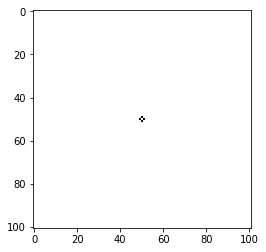

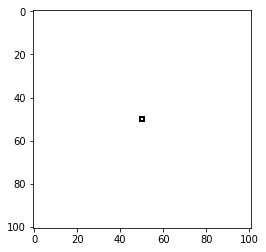

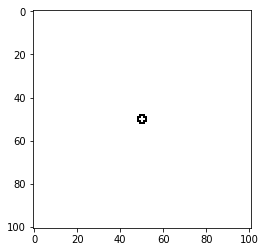

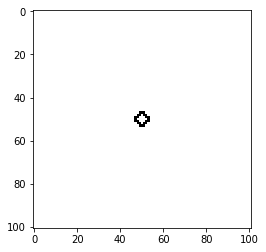

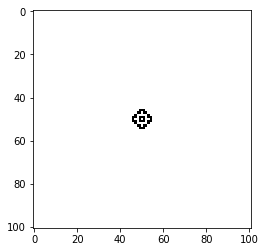

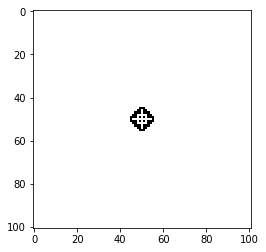

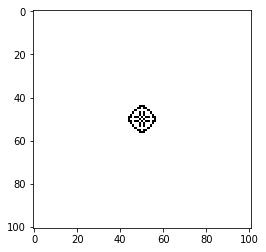

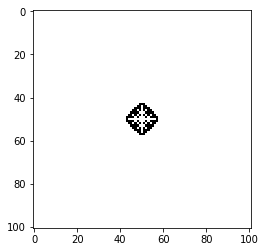

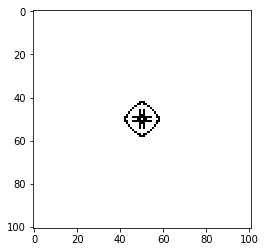

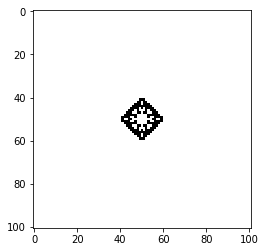

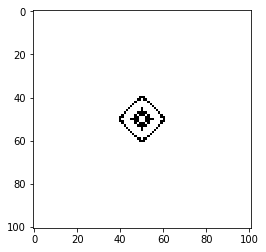

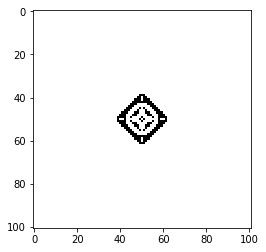

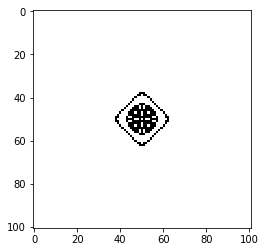

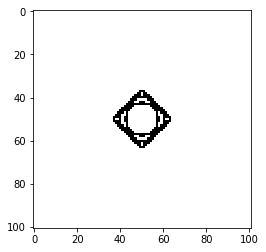

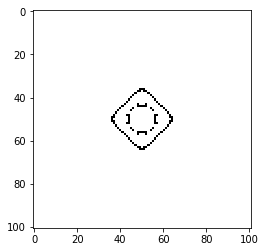

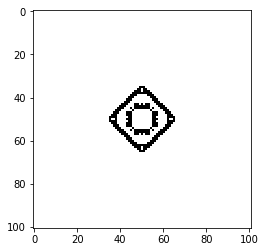

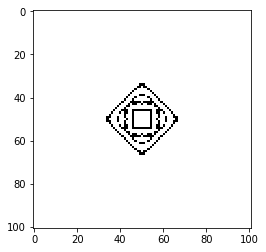

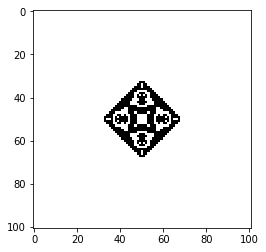

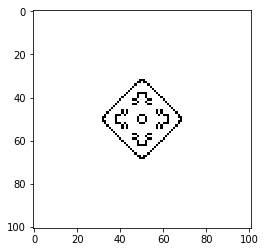

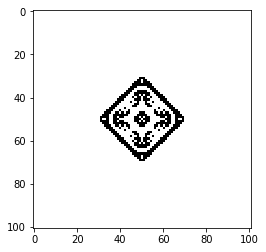

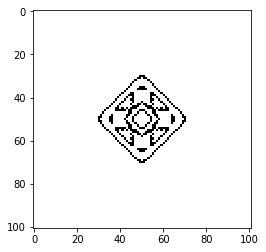

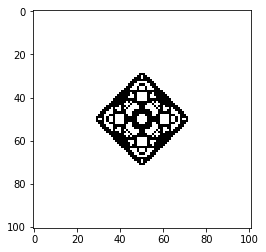

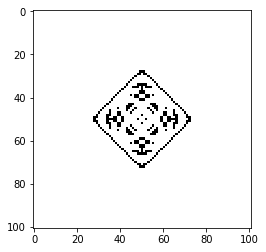

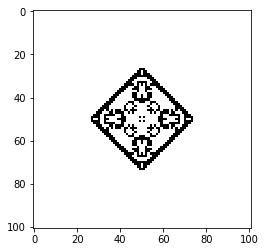

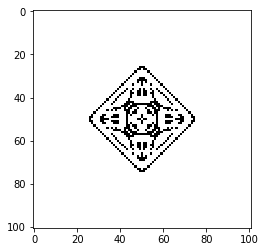

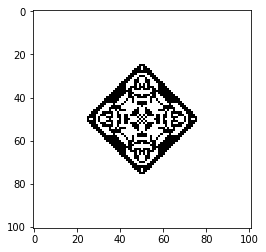

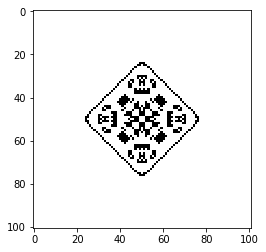

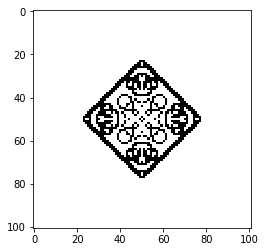

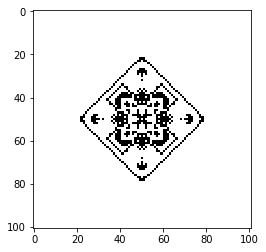

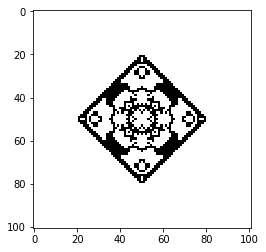

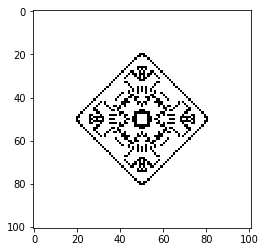

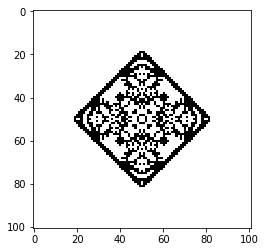

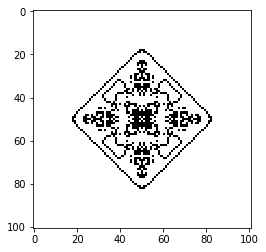

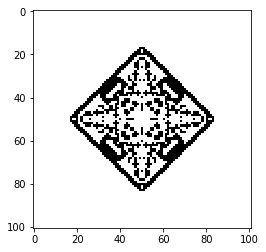

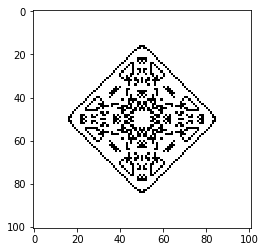

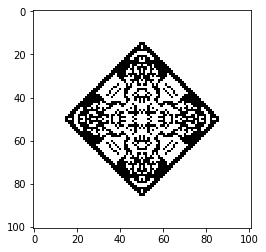

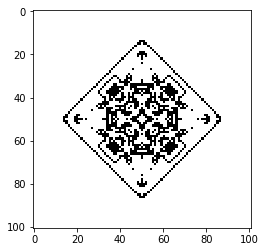

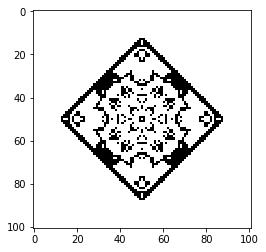

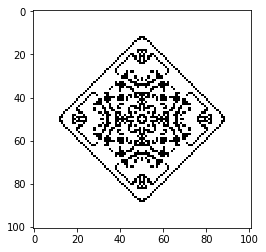

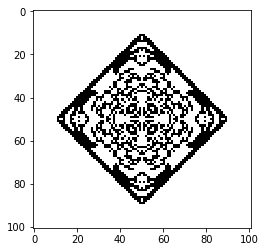

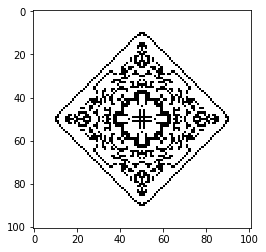

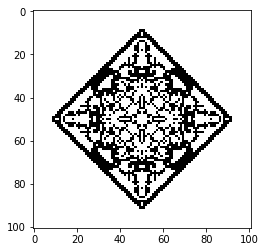

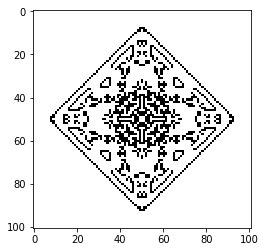

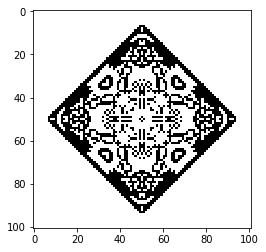

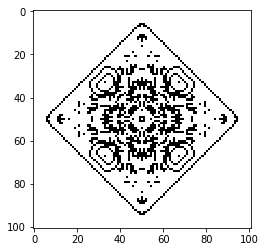

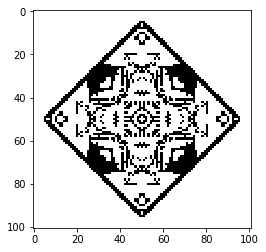

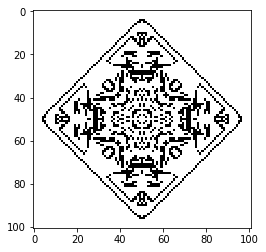

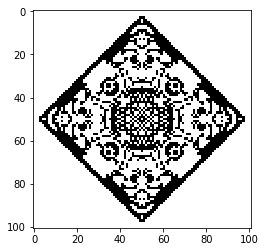

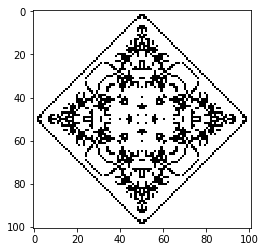

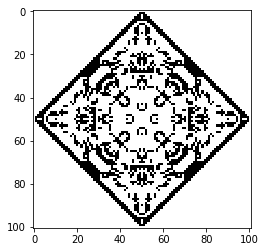

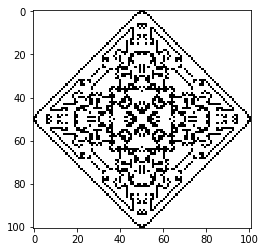

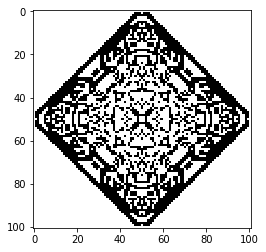

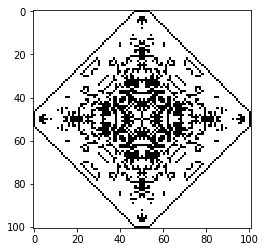

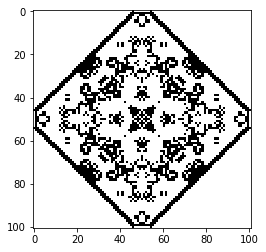

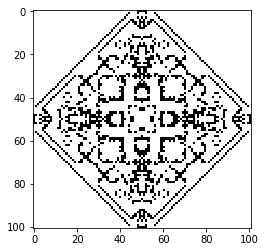

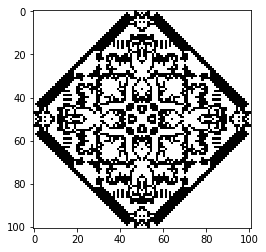

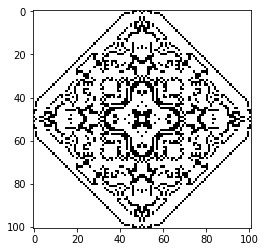

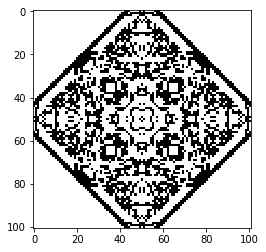

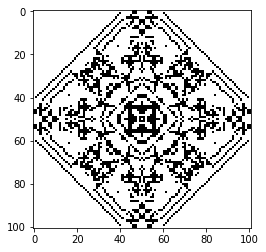

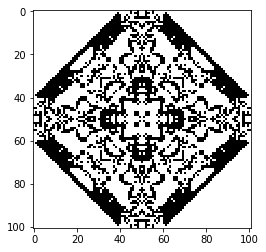

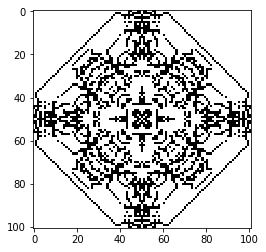

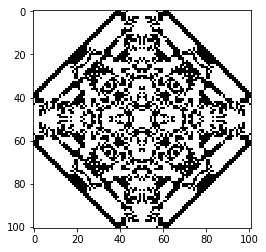

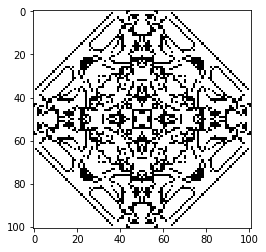

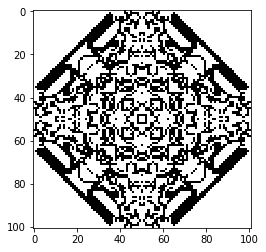

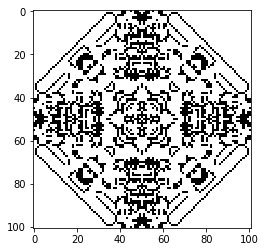

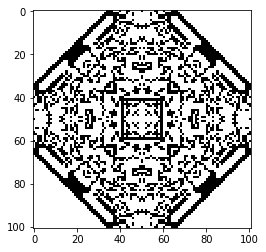

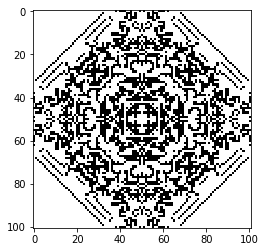

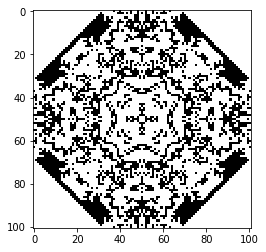

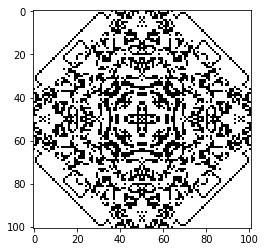

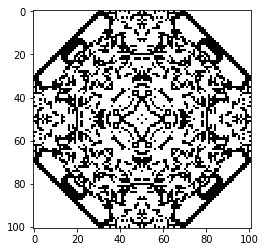

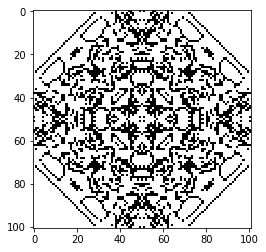

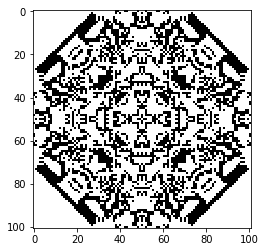

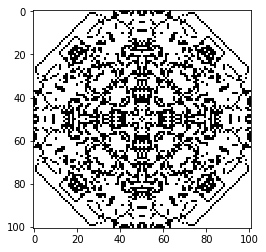

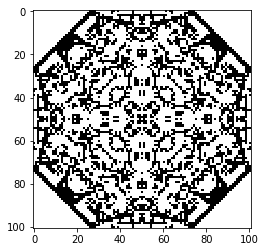

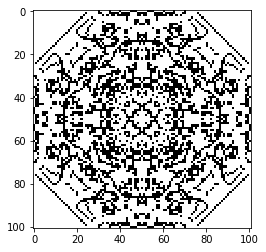

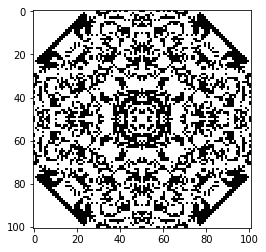

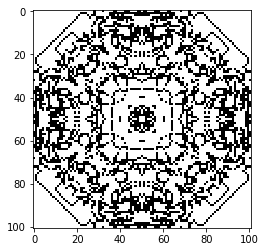

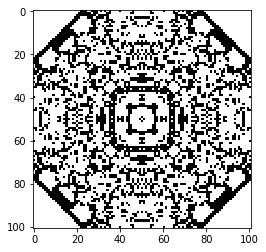

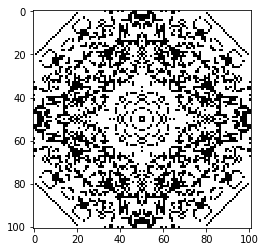

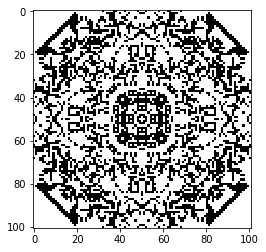

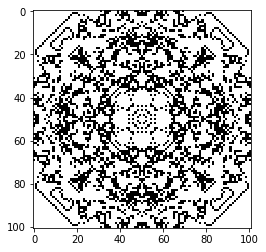

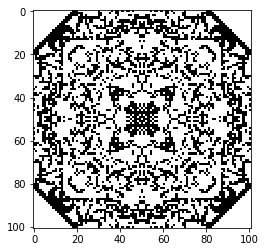

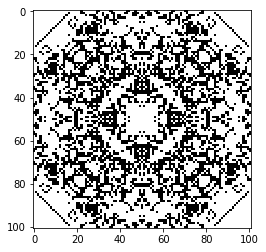

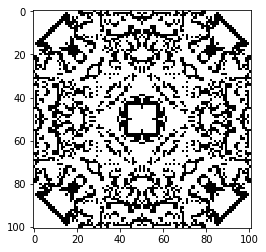

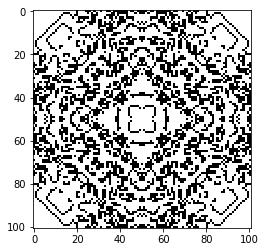

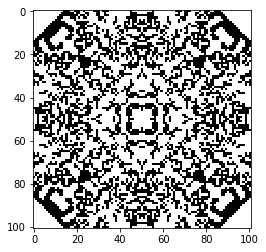

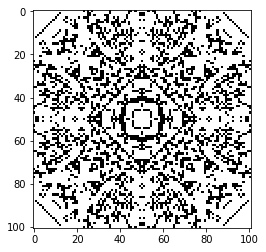

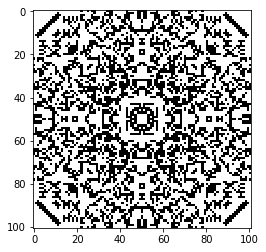

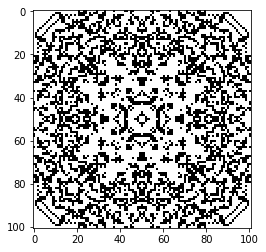

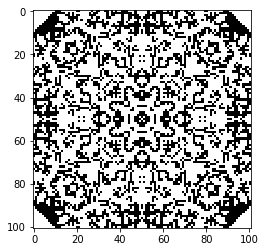

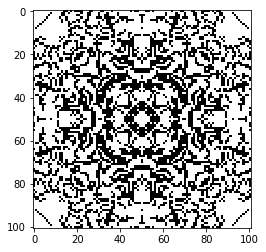

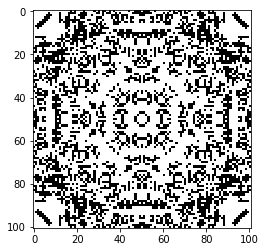

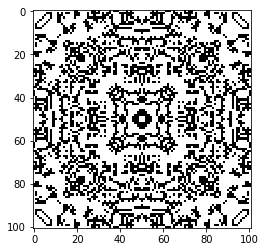

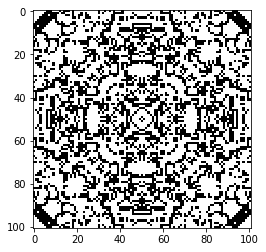

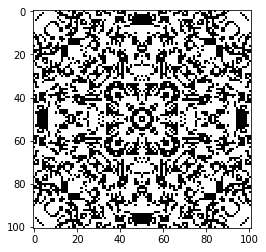

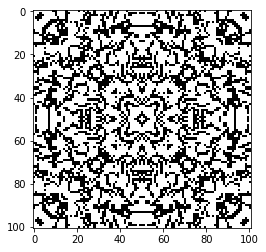

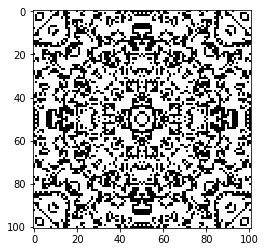

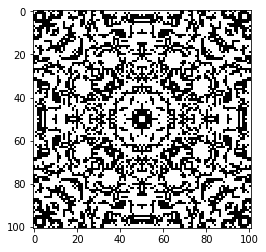

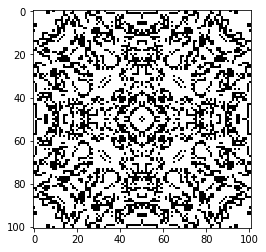

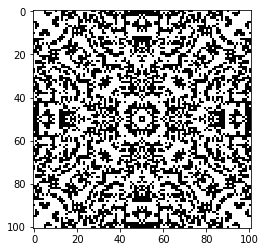

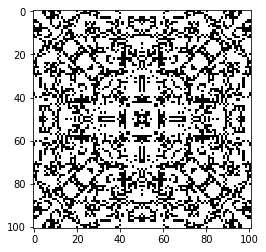

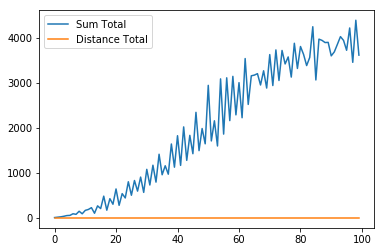

In [233]:
size = 101
half = int(size/2)
lattice = normallattice(size,size)
lattice[half-1][half] = 1
lattice[half+1][half] = 1
lattice[half][half-1] = 1
lattice[half][half+1] = 1
plotlattice(lattice)
lattice ,sumList,distanceList = manyStepsOnePlot(lattice,100,B=[2,3],S = [2,3],locs = [0,1,3],vals = [1,1,1], analysis = True)

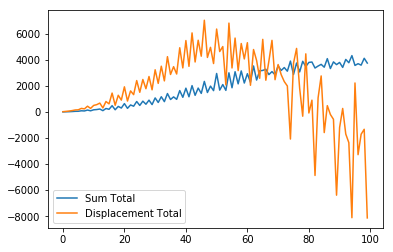

In [158]:
plt.plot(sumList,label = 'Sum Total')
plt.plot(distanceList,label = 'Displacement Total')
plt.legend()
plt.show()

## Analysis Part! Here we shall define some functions that will hopefully give us a better sense of what is going on in our simulations


In [72]:
def numAliveAndDistance(lattice):
    sum = 0
    distance = 0
    for i in range(len(lattice)):
        for j in range(len(lattice[i])):
            if lattice[i][j] ==1:
                sum +=1
                distance += i + j - 2*int(len(lattice)/2)
    return sum, distance

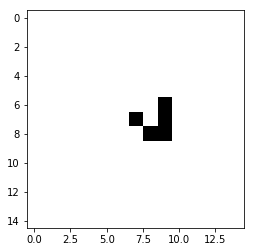

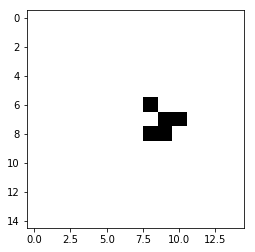

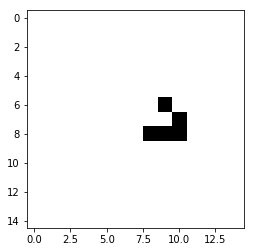

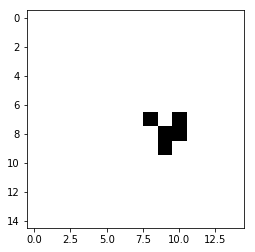

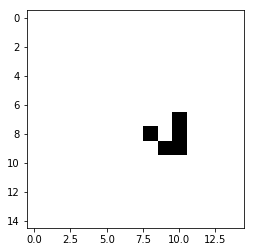

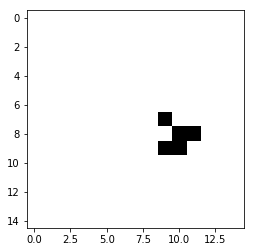

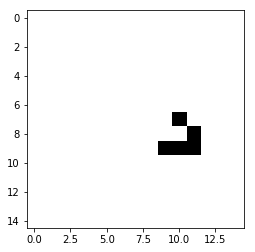

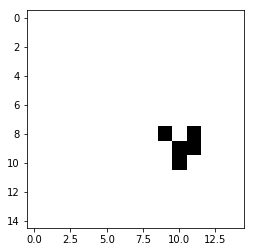

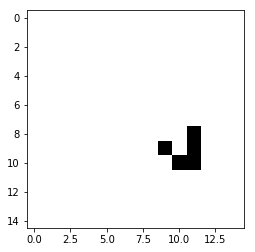

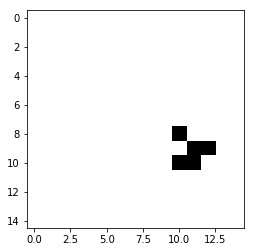

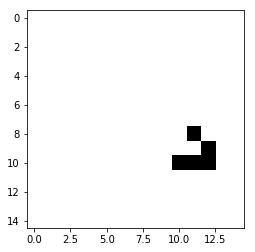

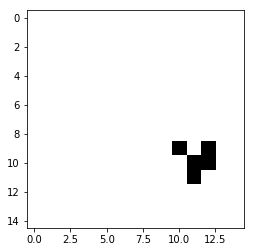

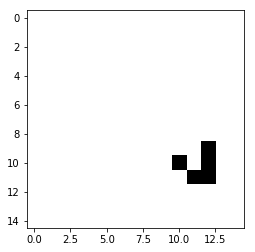

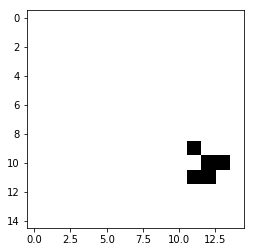

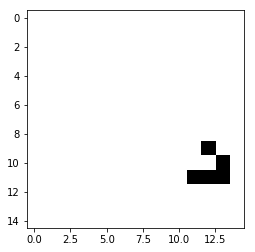

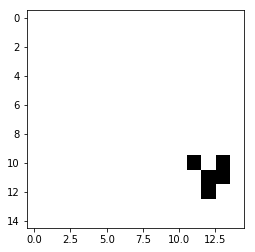

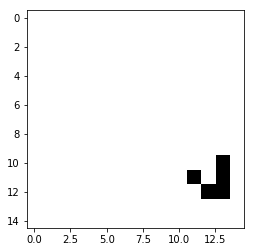

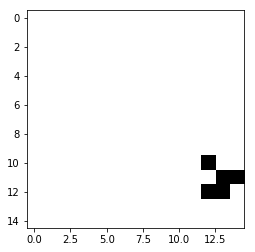

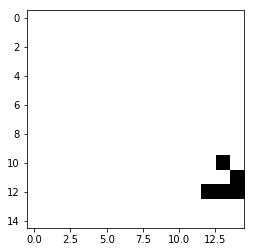

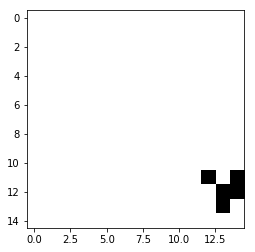

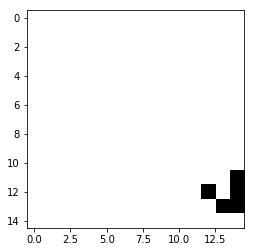

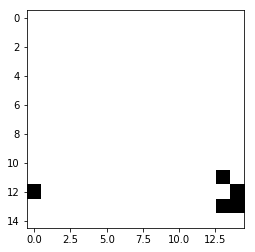

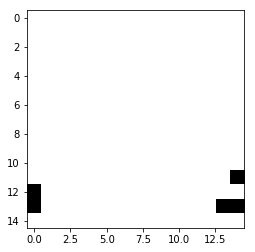

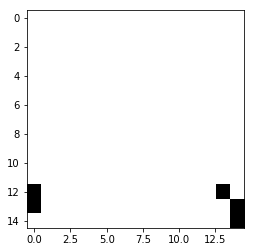

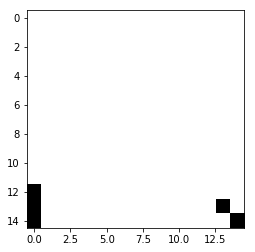

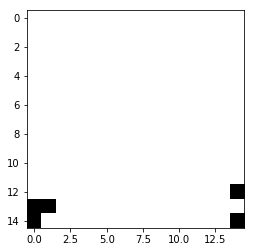

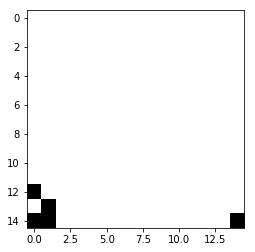

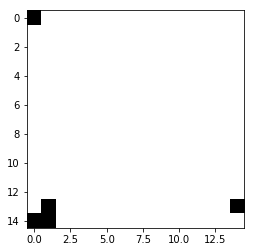

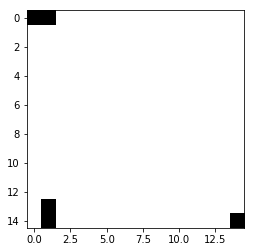

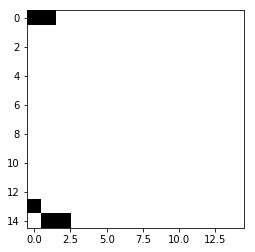

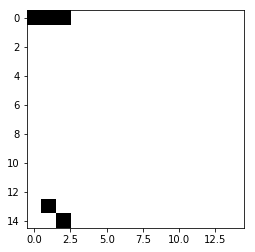

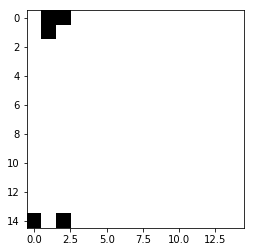

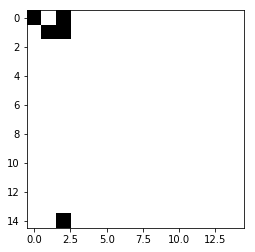

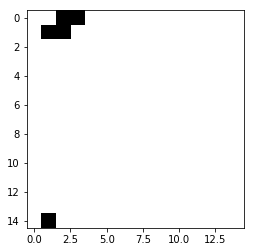

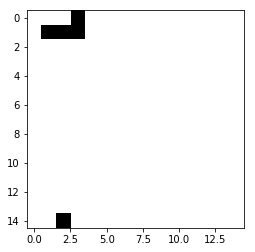

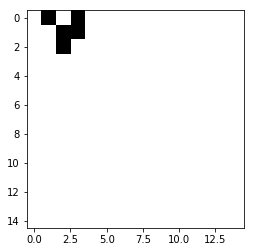

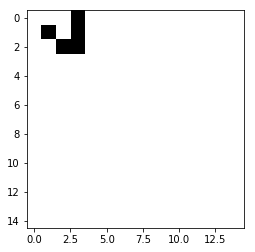

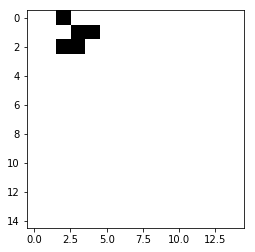

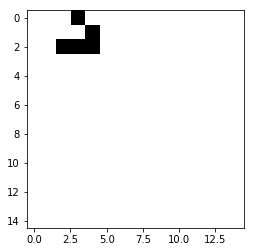

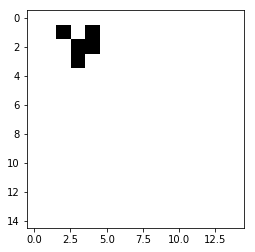

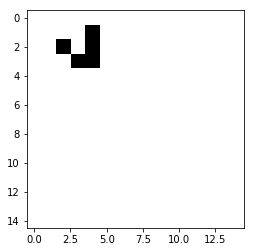

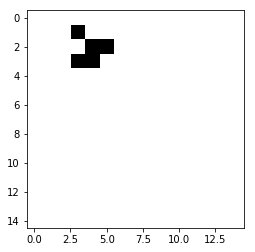

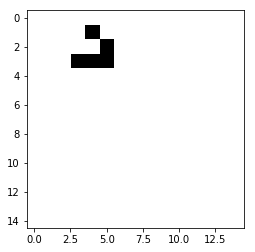

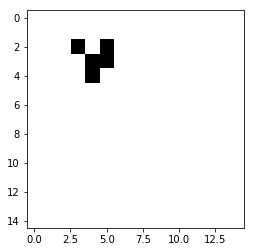

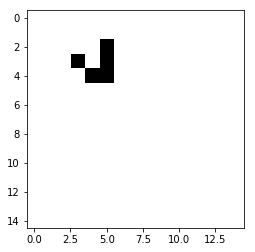

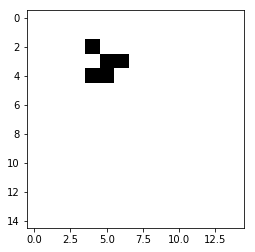

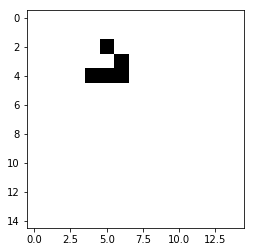

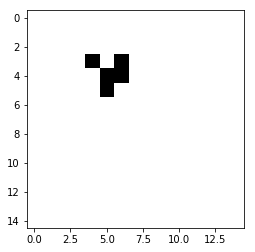

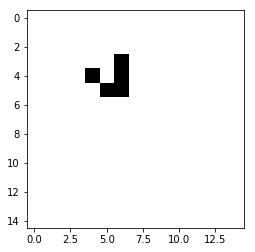

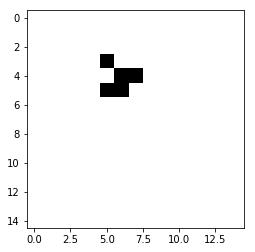

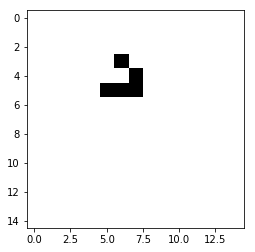

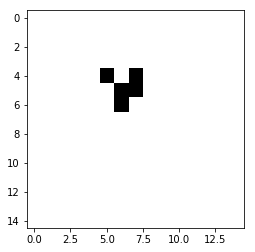

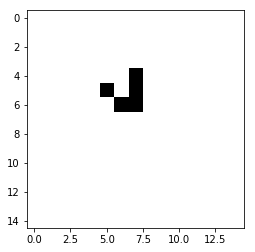

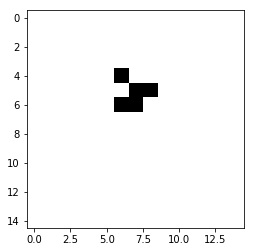

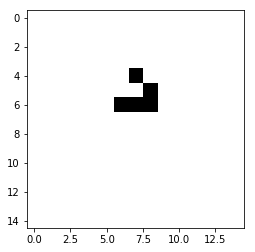

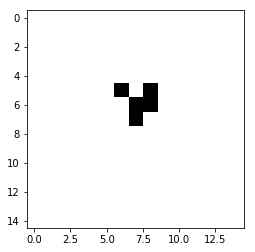

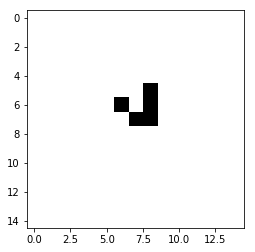

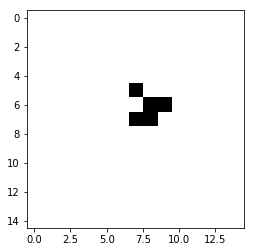

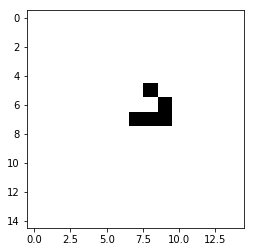

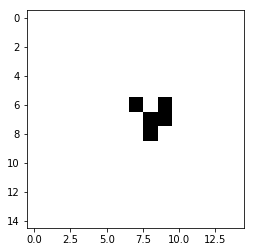

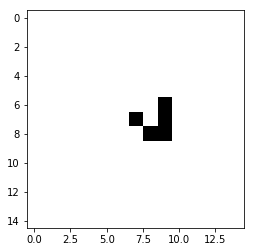

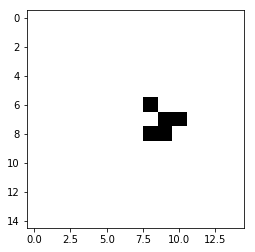

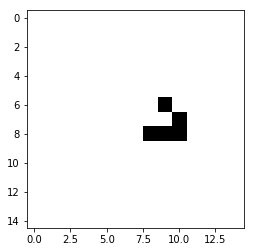

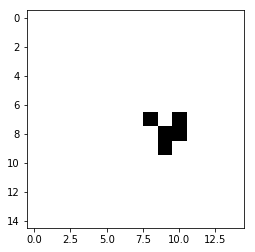

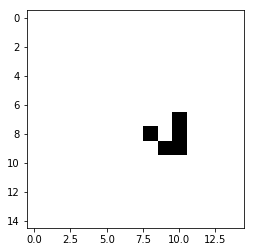

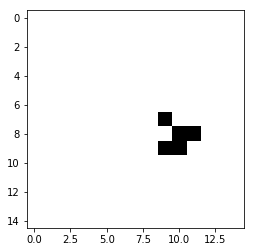

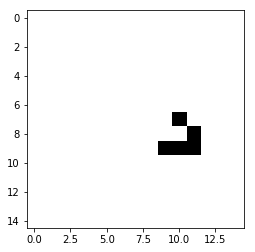

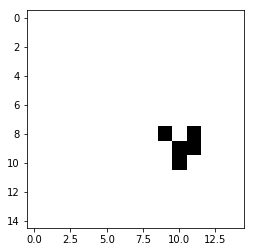

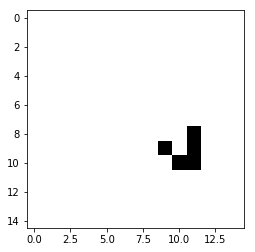

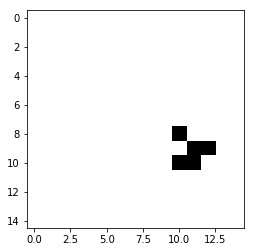

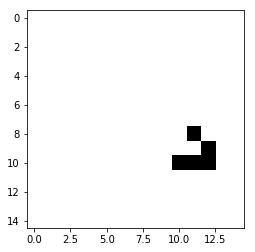

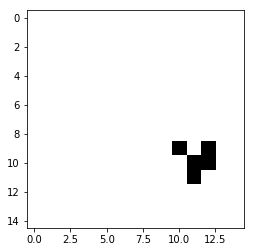

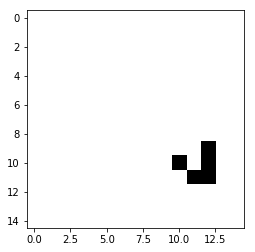

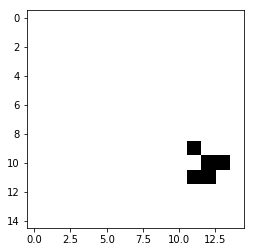

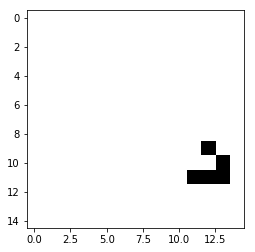

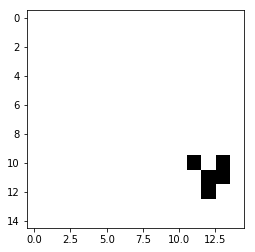

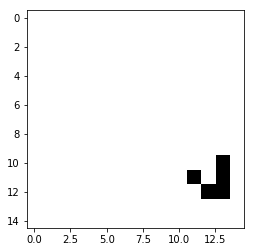

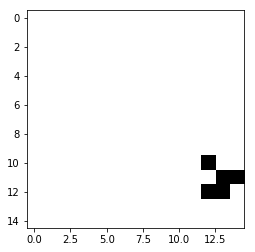

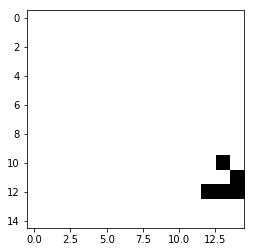

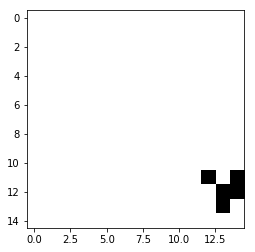

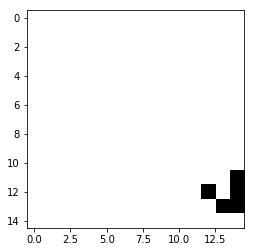

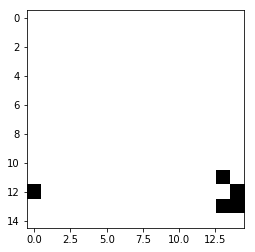

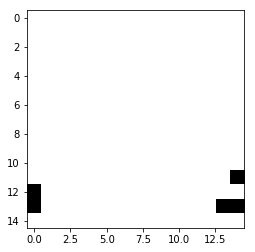

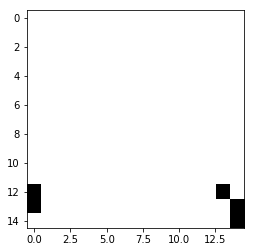

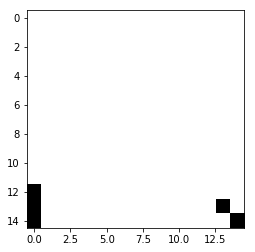

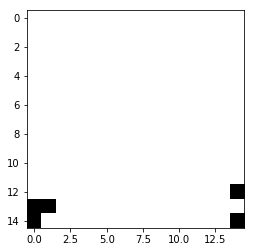

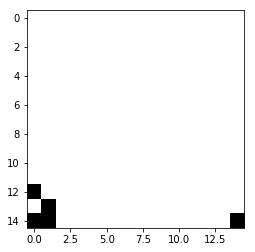

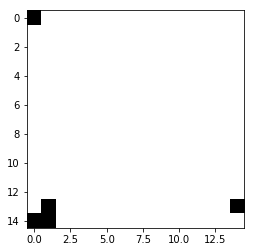

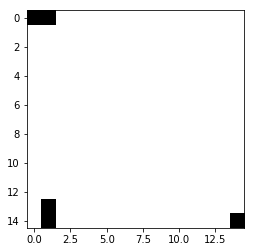

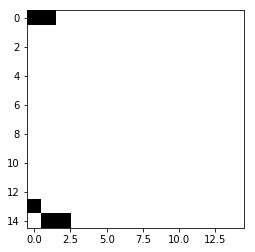

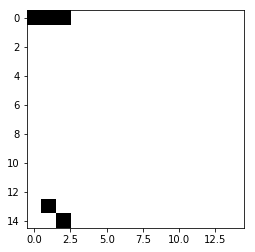

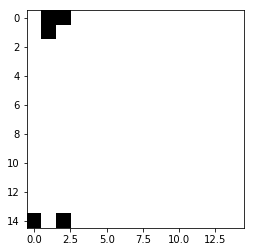

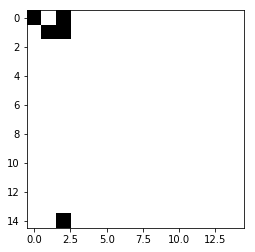

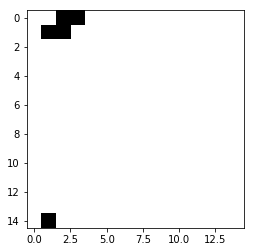

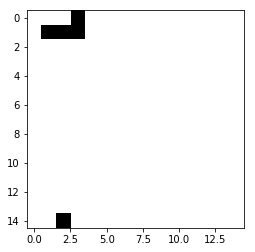

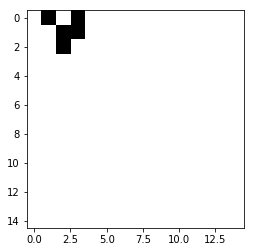

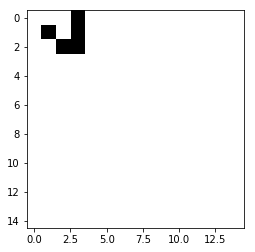

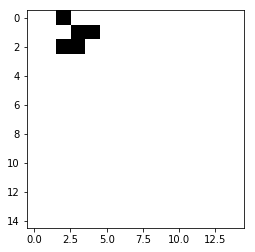

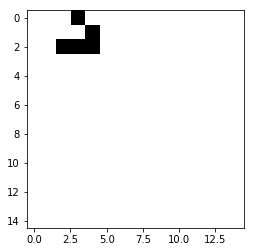

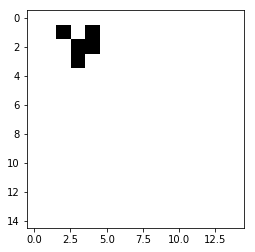

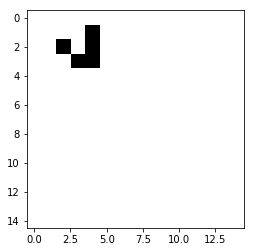

In [77]:
size = 15
lattice = GliderLat(size)
plotlattice(lattice)
lattice, sumList, distanceList = manyStepsOnePlot(lattice, 100, analysis = True)


In [216]:
def plotStuff(sumList,distanceList):
    plt.plot(sumList,label = 'Sum Total')
    plt.plot(distanceList,label = 'Distance Total')
    plt.legend()
    plt.show()

Mohammed's Section: Boundary Problems

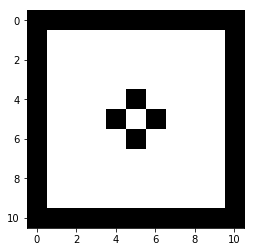

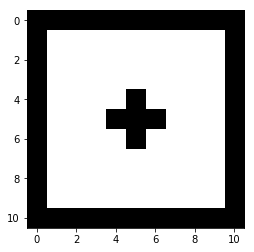

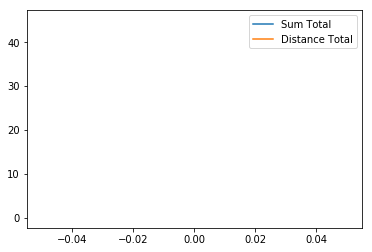

In [230]:
def MomoLattice(sizex,sizey):
    lattice = normallattice(sizex,sizey)
    for i in range(sizex):
        lattice[0][i] = 1
        lattice[i][0] = 1
        lattice[sizex-1][i] = 1
        lattice[i][sizex-1] = 1
    return lattice

def singleStepBound(lattice, B, S, locs,vals) :
    output = MomoLattice(len(lattice),len(lattice[0]))
    for i in np.arange(2,len(lattice)-2):
        for j in np.arange(2,len(lattice[i])-2):
            output[i][j] = pointChange(lattice,i,j,B,S,locs,vals)
    return output


size = 11
half = int(size/2)
lattice = MomoLattice(size,size)
lattice[half][half-1] = 1
lattice[half][half+1] = 1
lattice[half-1][half] = 1
lattice[half+1][half] = 1
plotlattice(lattice)
lattice,sumList, distanceList = manyStepsOnePlot(lattice,1,B=[3,4],S=[2,3],locs = [0], vals = [1,2,2,2],boundary = True,analysis = True)


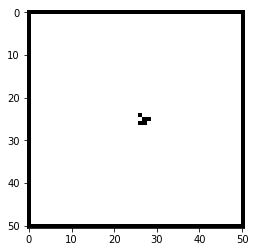

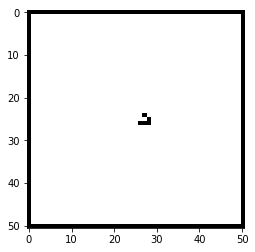

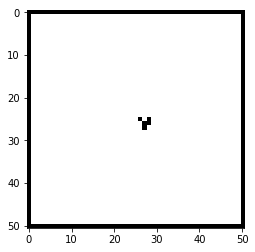

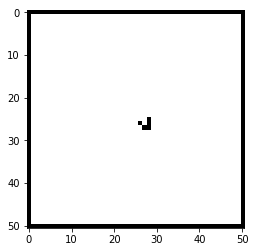

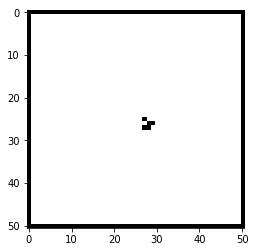

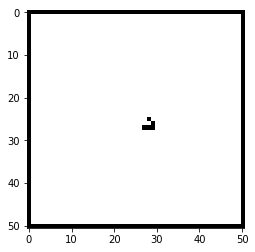

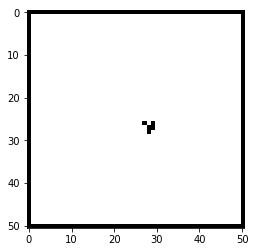

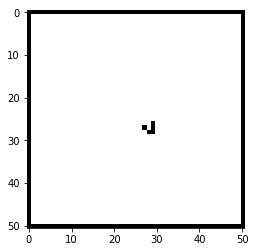

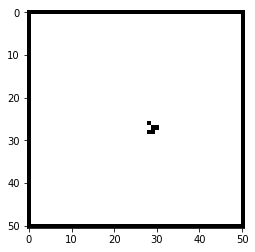

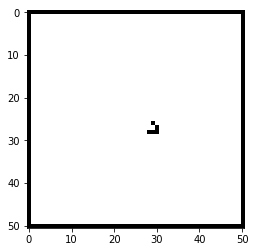

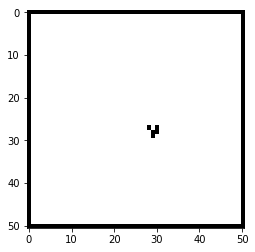

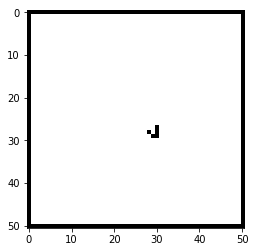

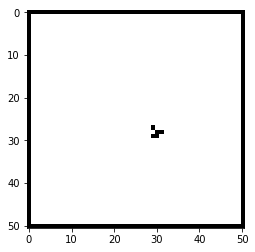

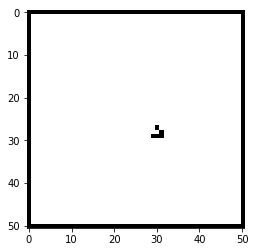

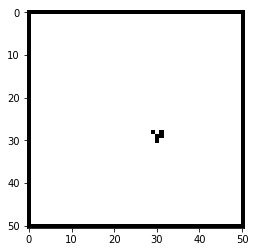

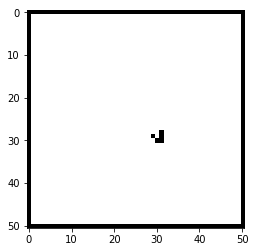

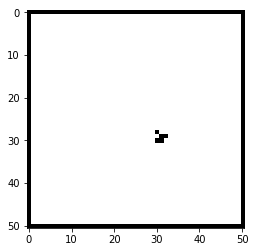

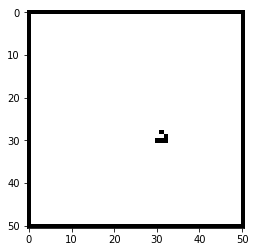

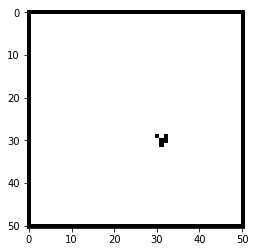

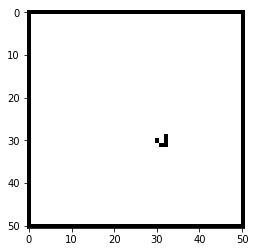

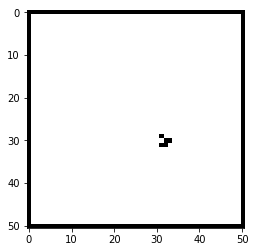

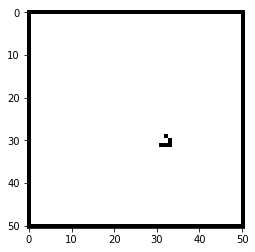

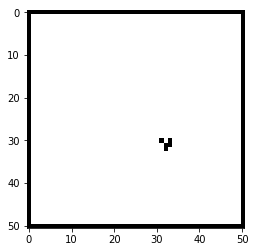

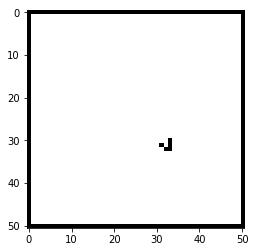

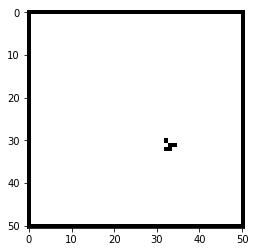

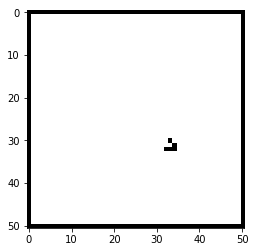

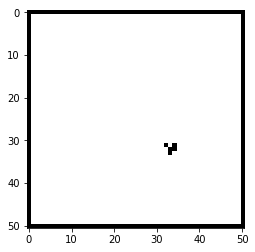

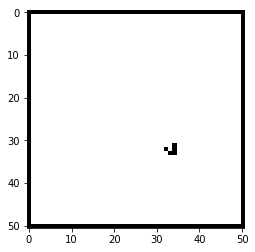

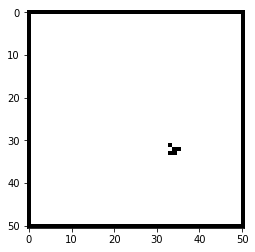

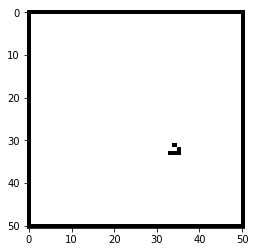

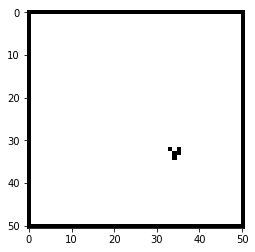

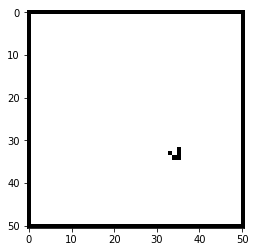

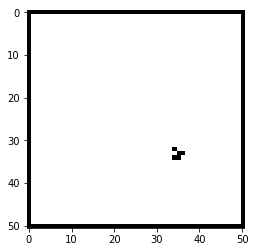

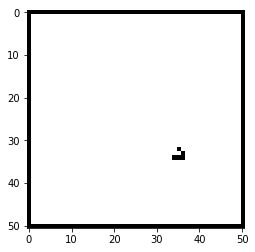

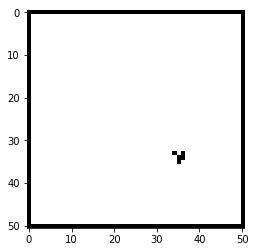

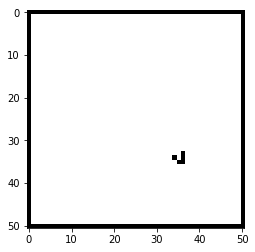

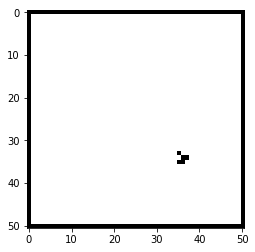

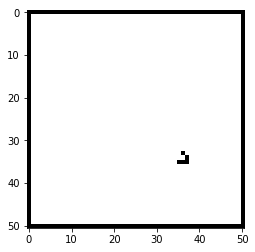

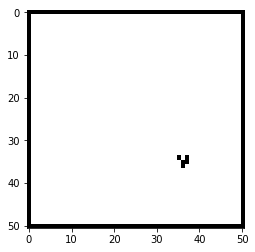

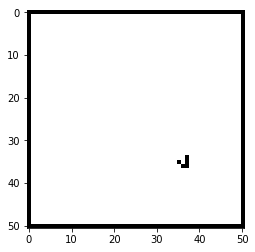

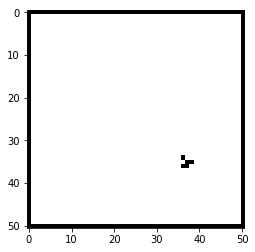

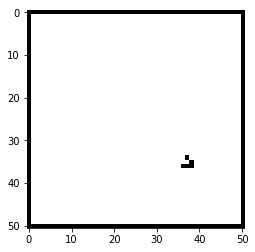

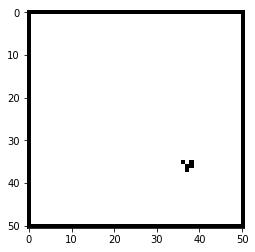

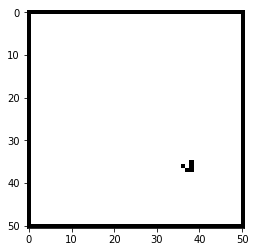

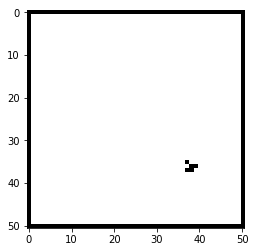

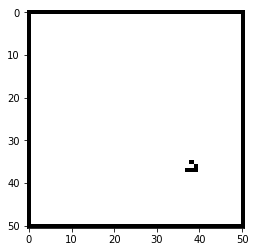

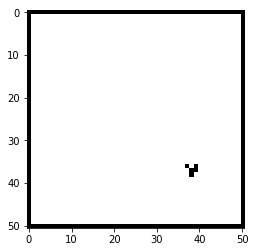

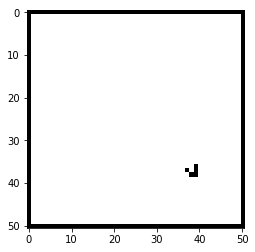

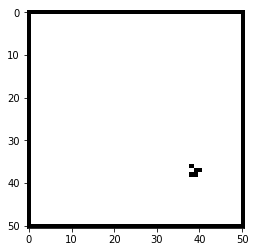

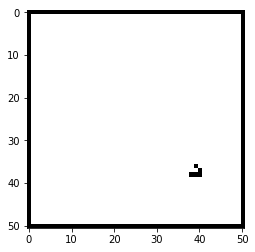

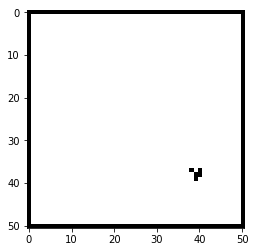

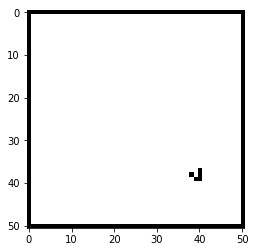

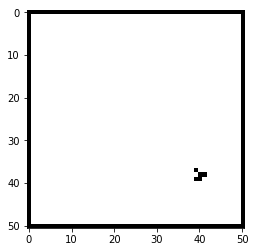

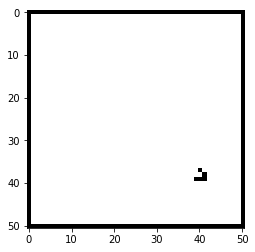

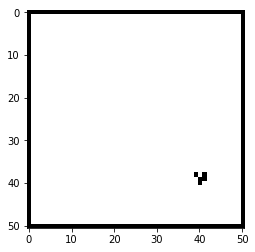

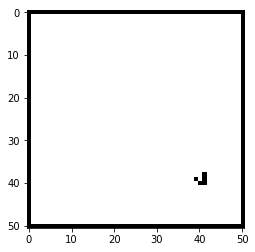

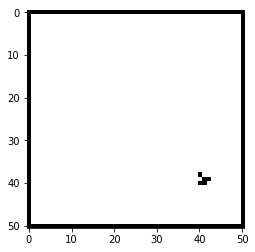

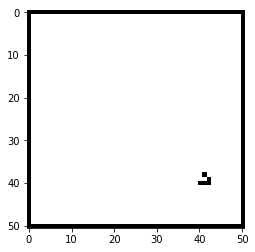

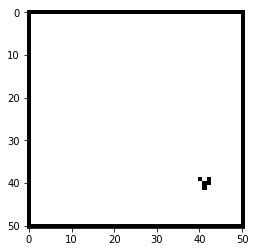

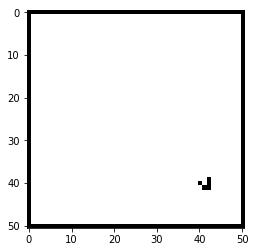

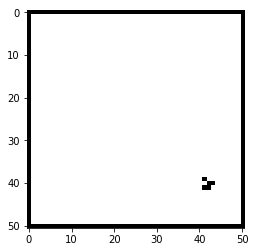

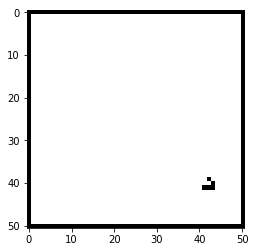

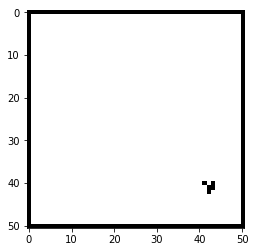

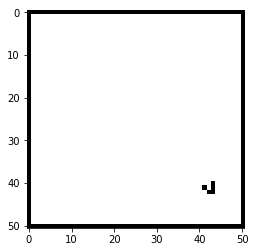

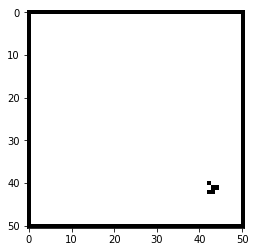

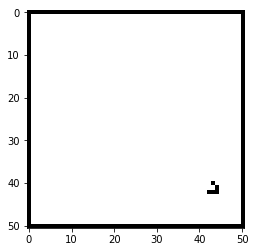

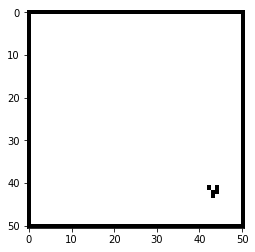

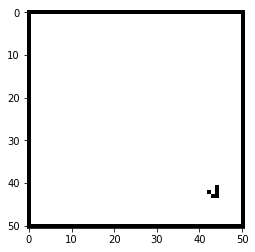

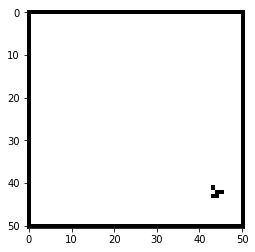

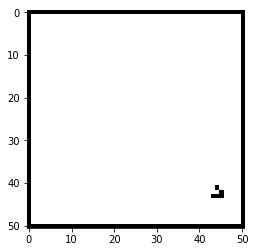

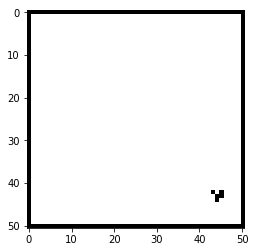

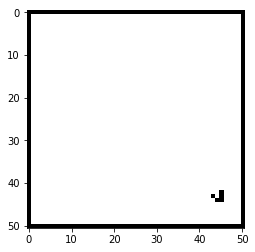

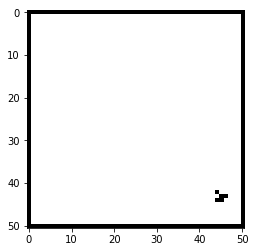

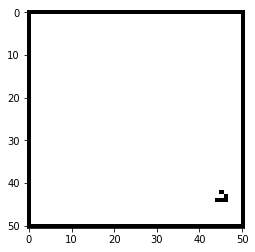

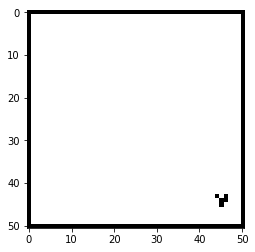

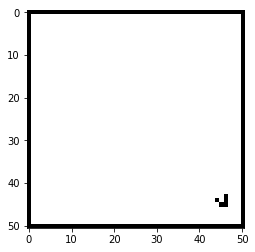

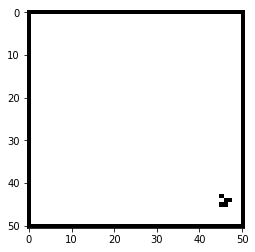

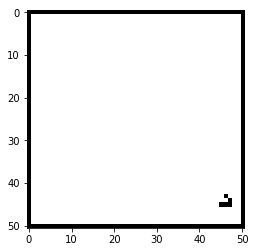

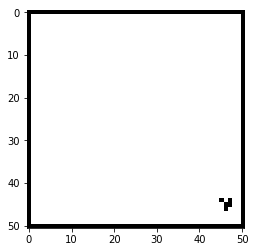

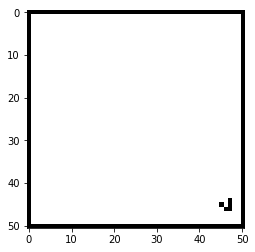

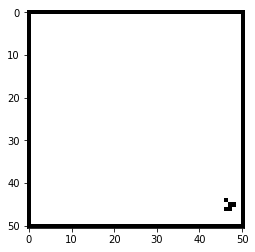

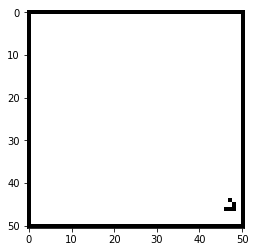

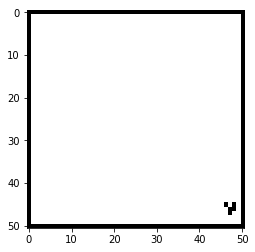

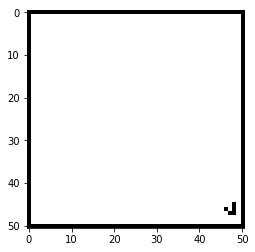

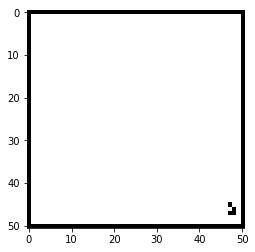

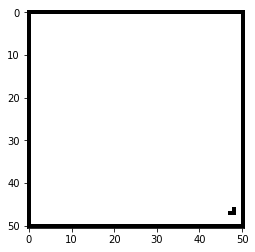

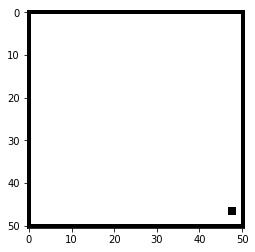

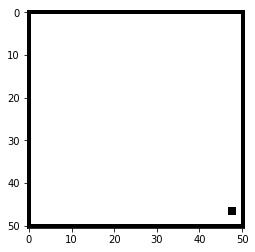

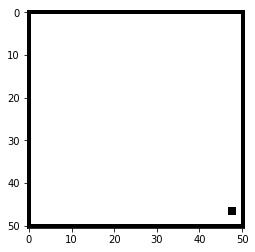

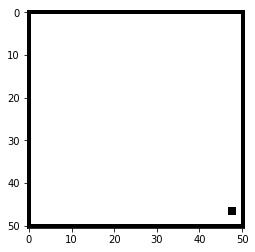

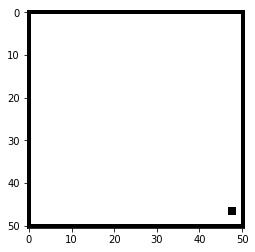

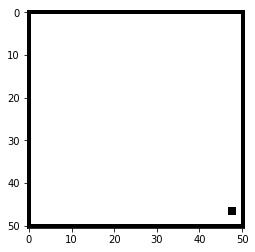

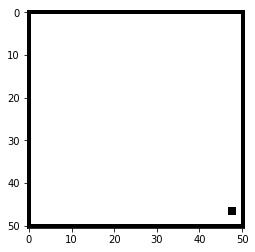

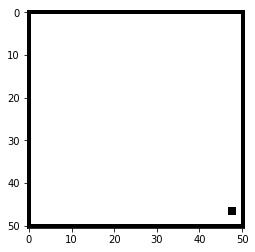

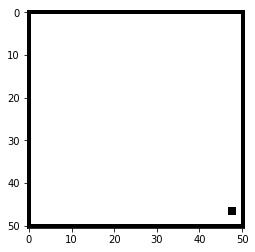

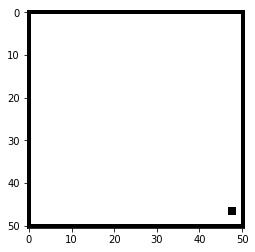

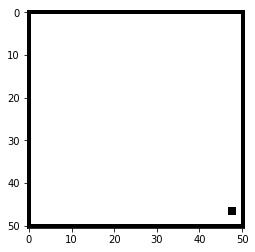

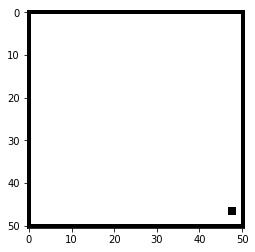

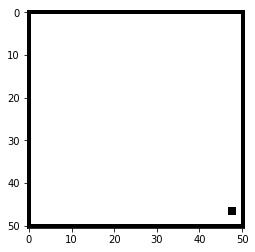

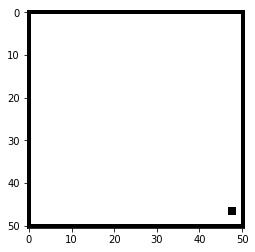

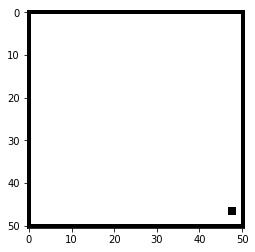

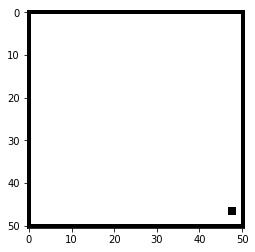

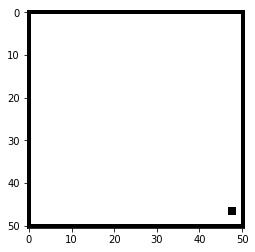

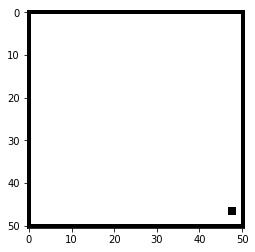

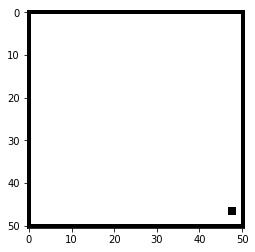

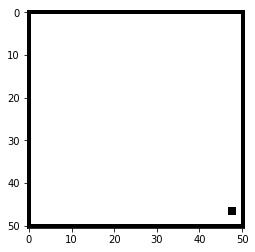

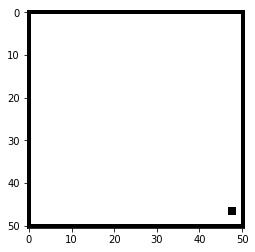

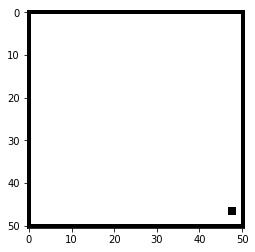

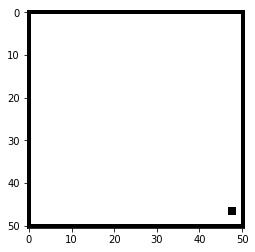

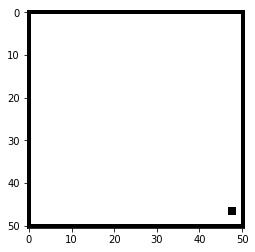

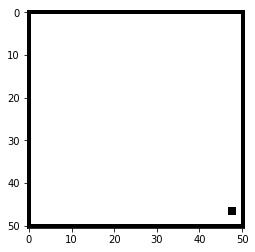

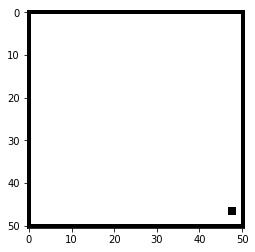

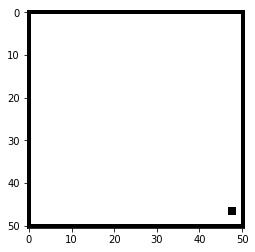

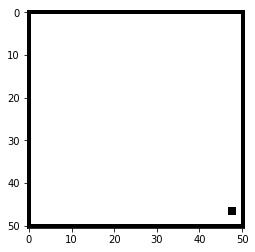

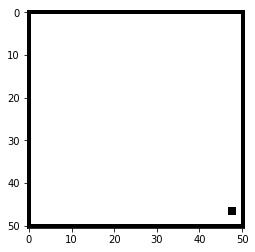

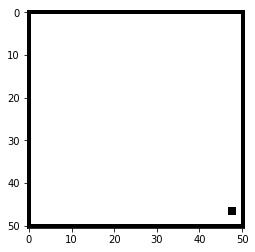

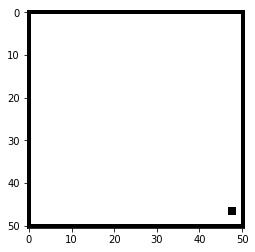

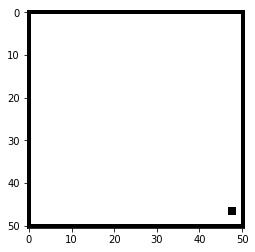

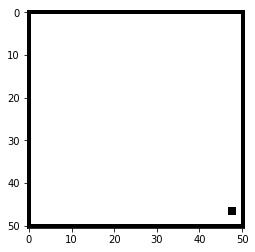

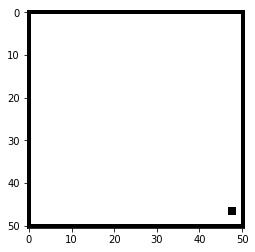

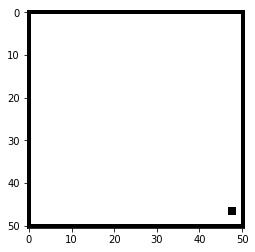

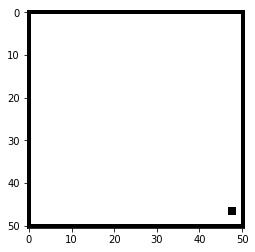

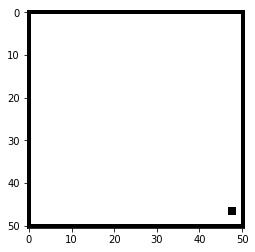

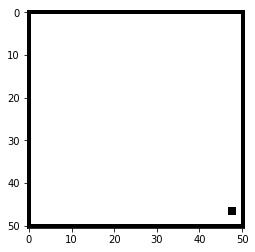

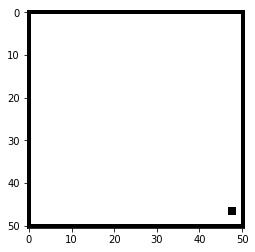

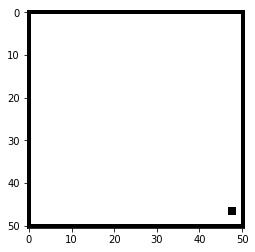

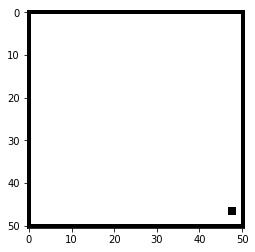

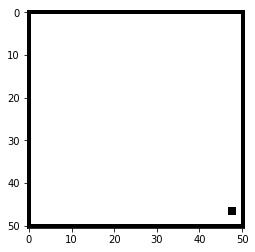

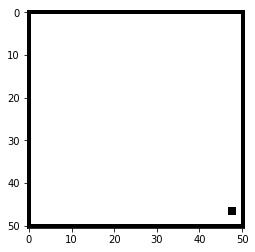

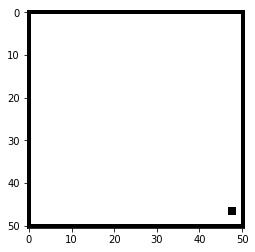

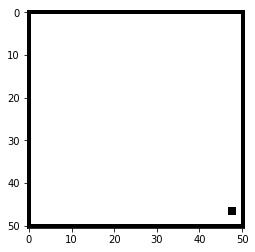

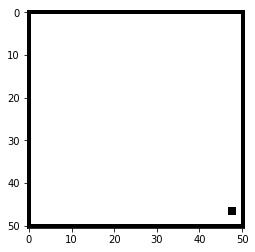

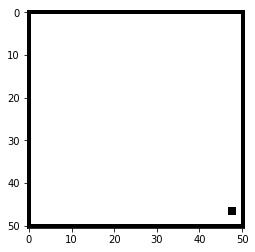

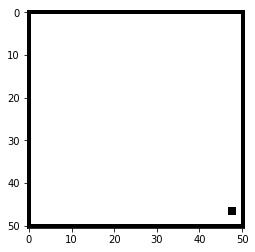

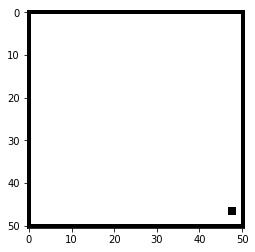

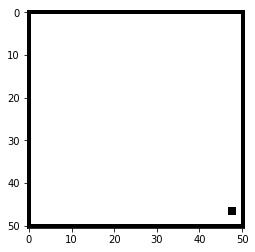

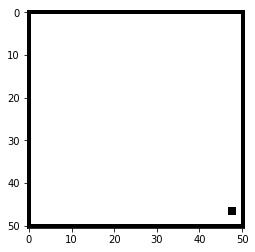

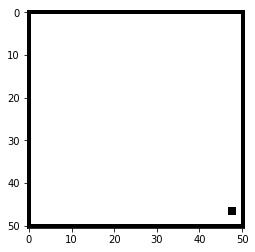

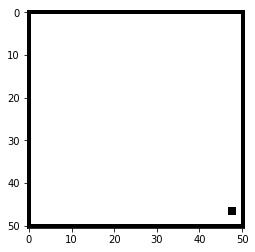

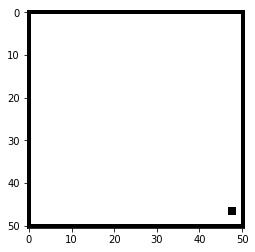

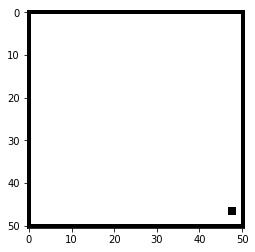

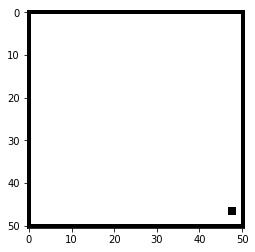

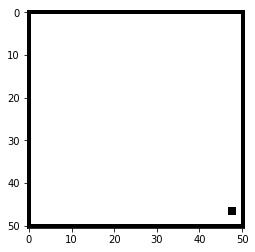

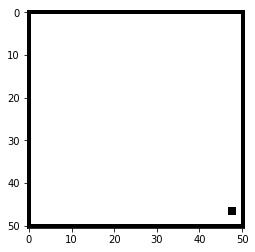

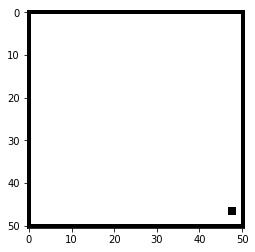

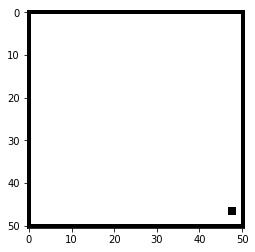

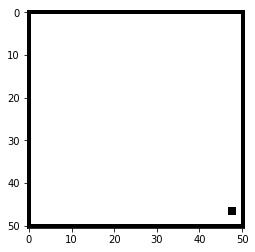

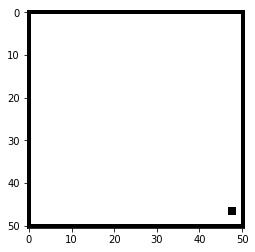

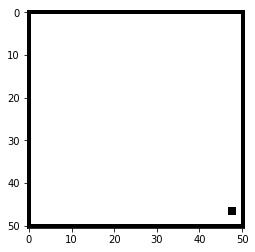

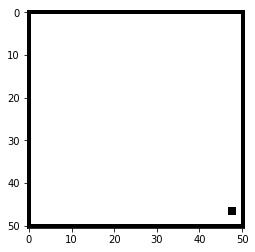

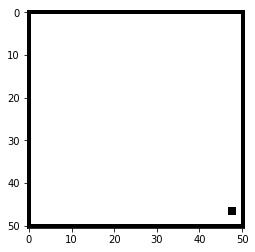

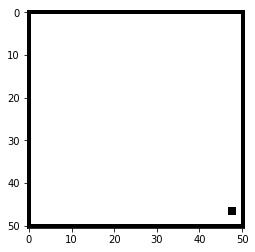

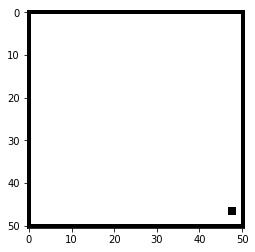

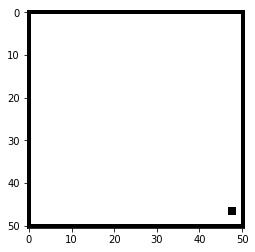

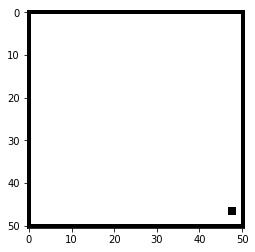

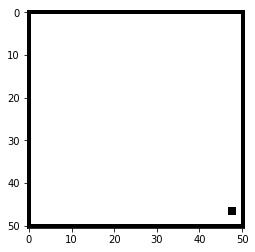

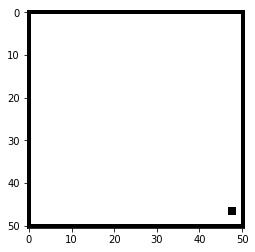

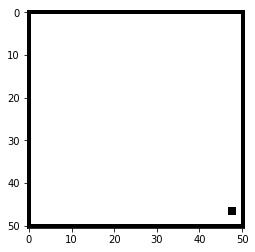

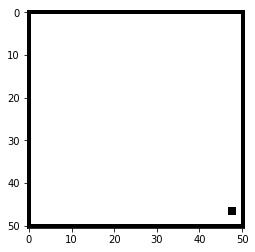

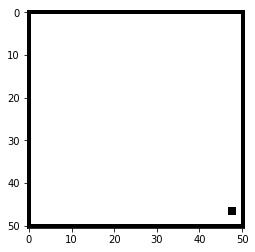

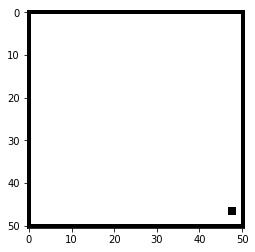

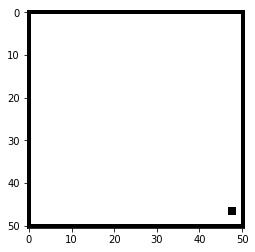

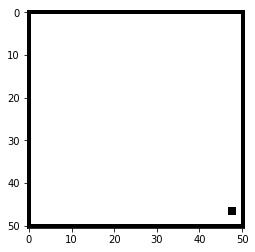

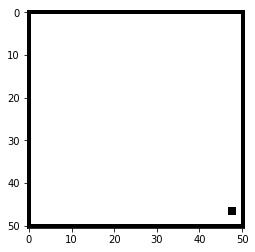

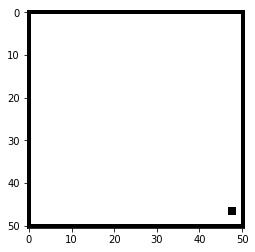

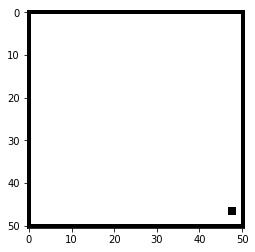

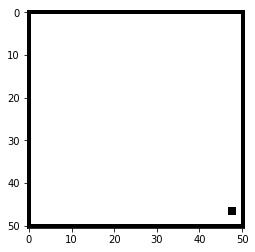

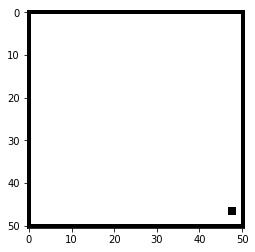

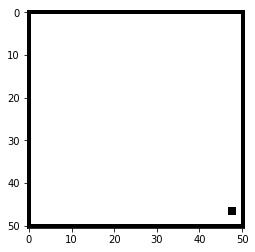

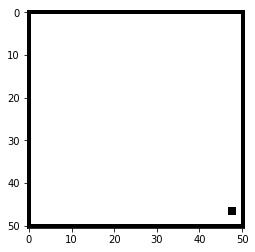

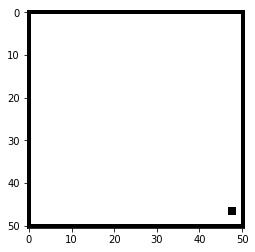

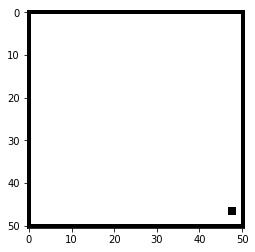

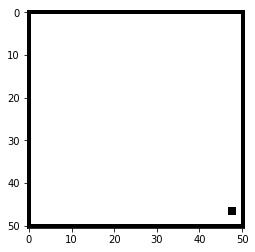

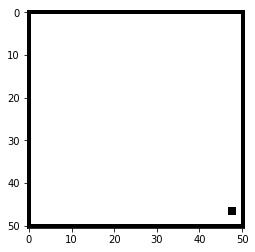

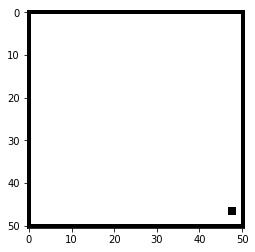

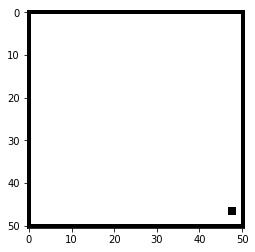

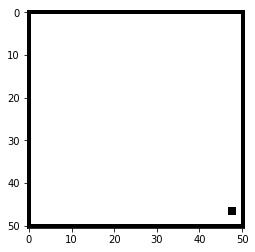

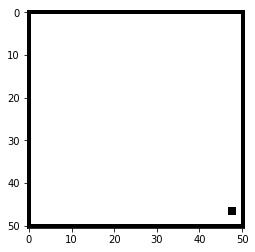

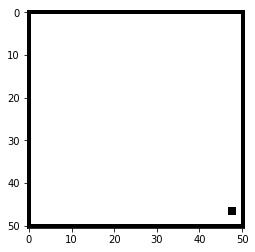

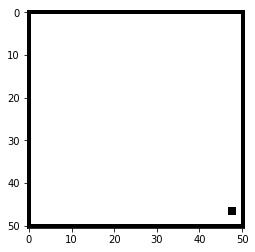

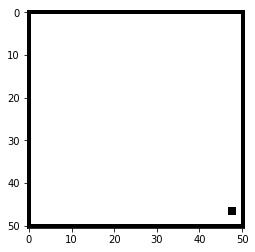

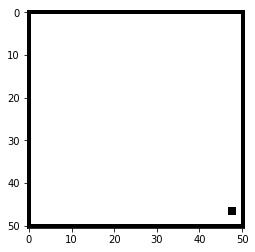

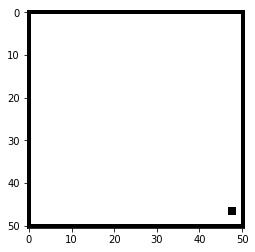

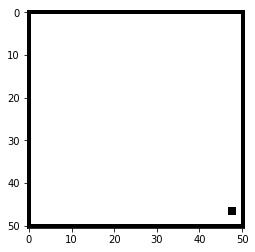

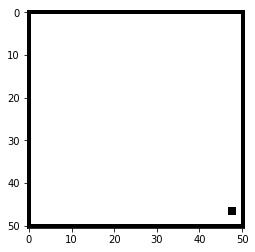

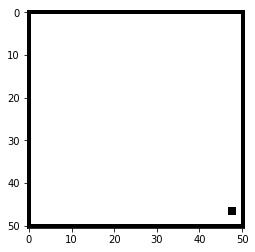

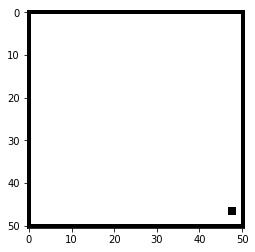

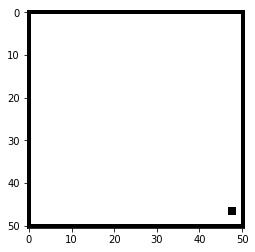

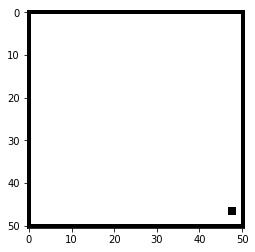

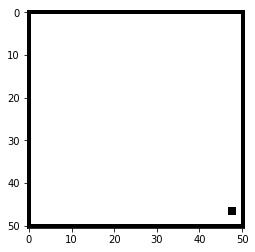

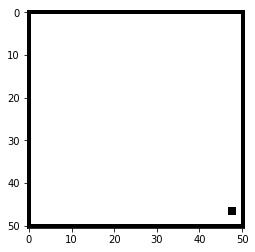

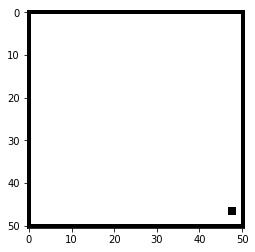

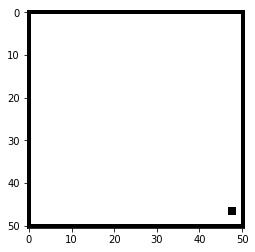

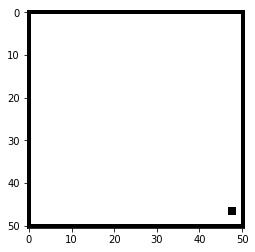

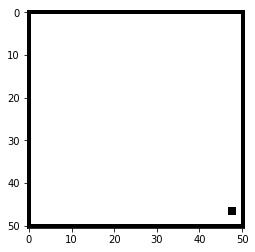

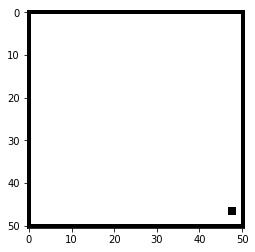

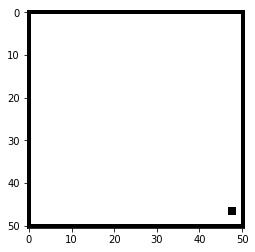

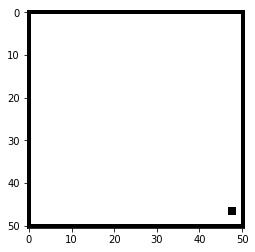

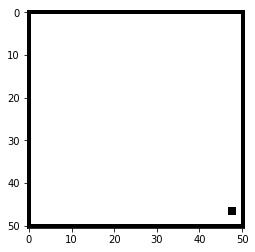

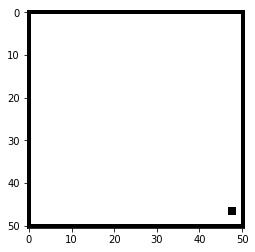

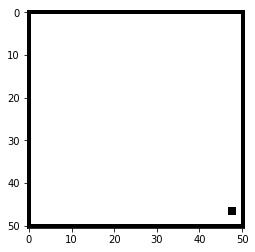

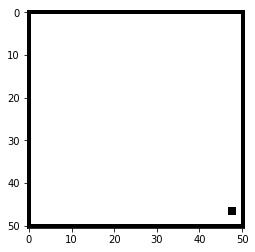

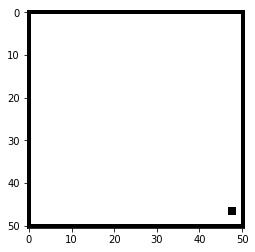

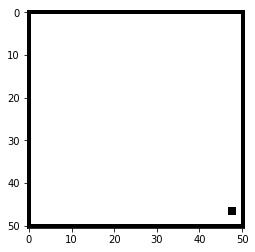

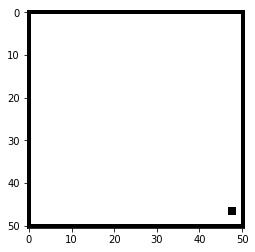

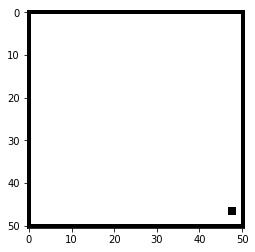

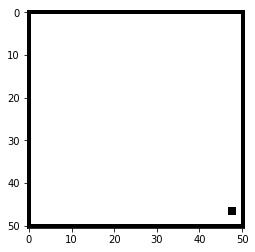

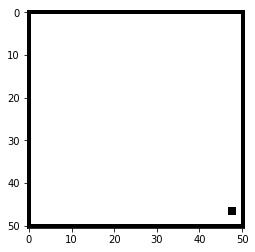

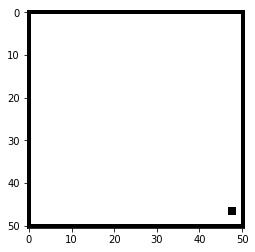

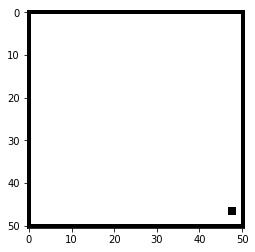

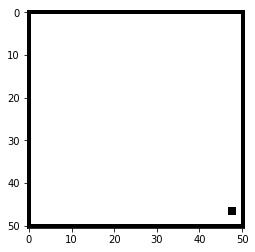

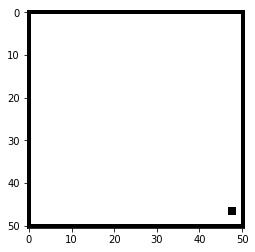

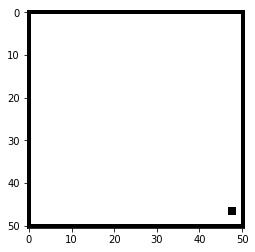

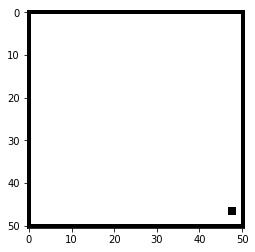

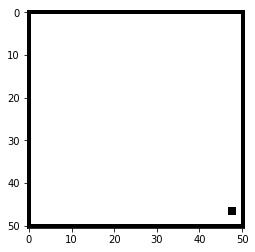

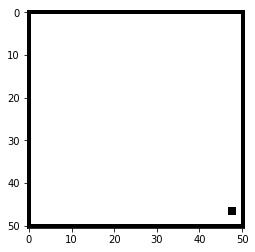

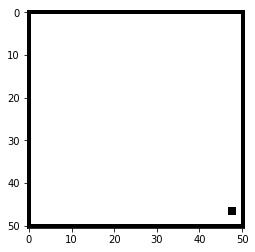

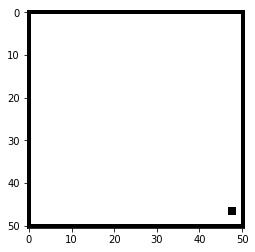

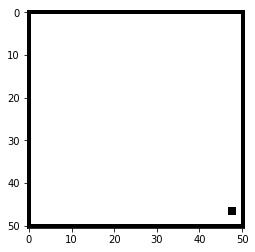

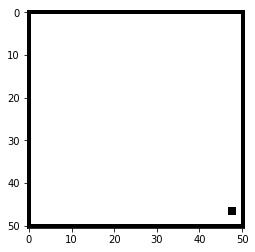

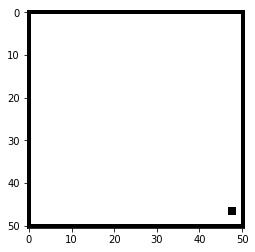

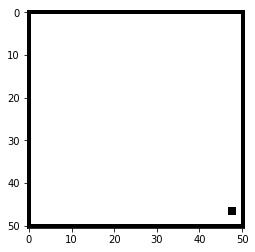

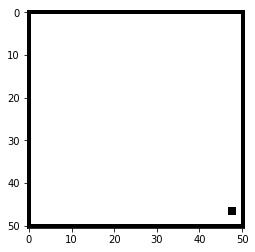

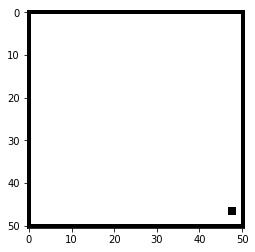

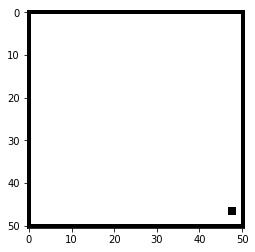

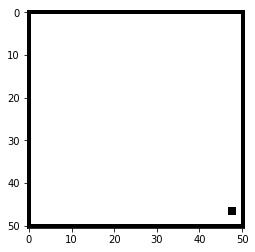

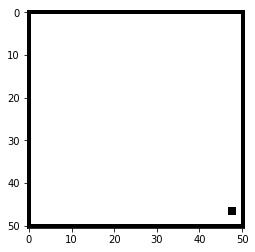

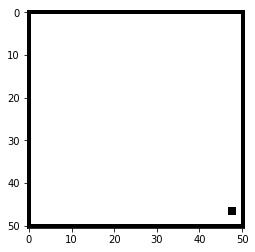

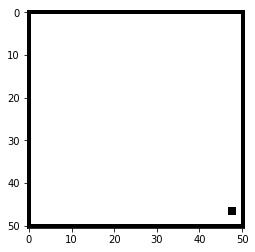

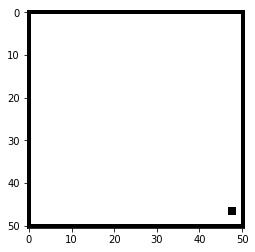

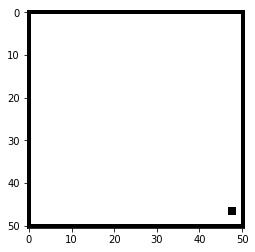

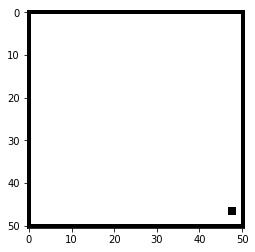

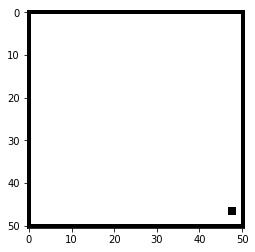

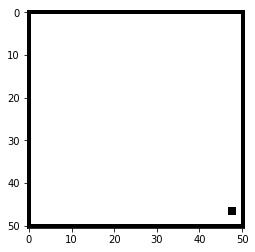

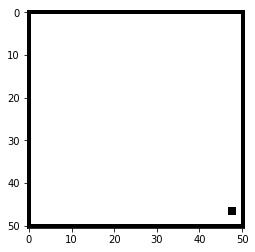

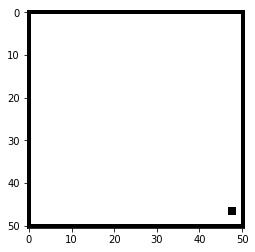

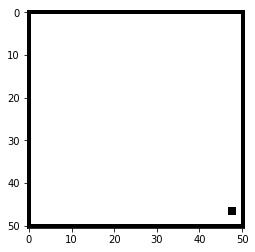

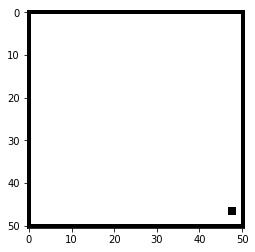

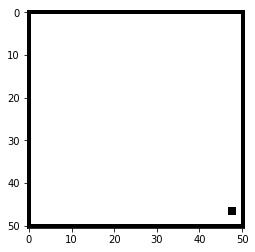

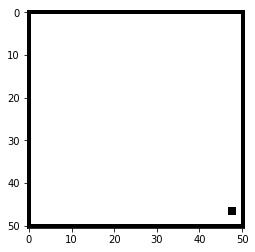

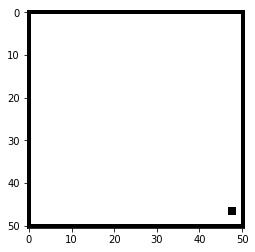

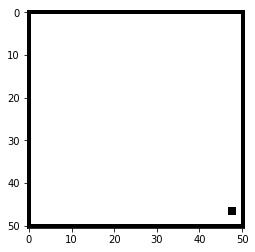

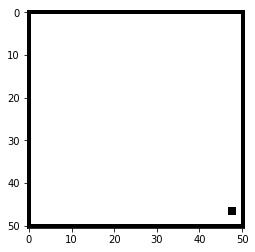

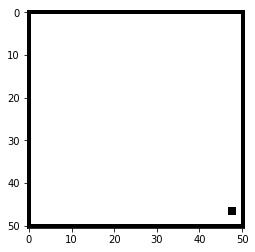

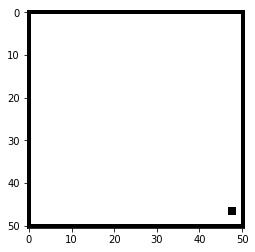

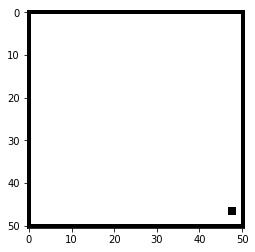

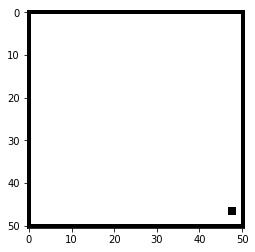

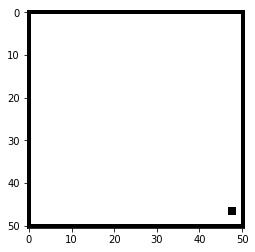

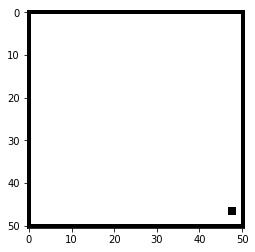

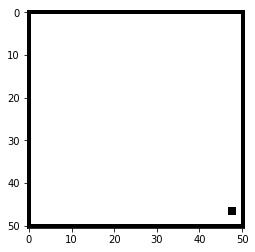

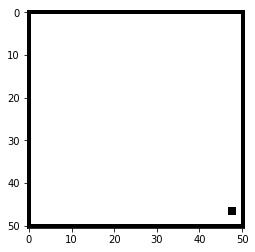

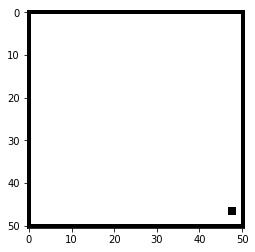

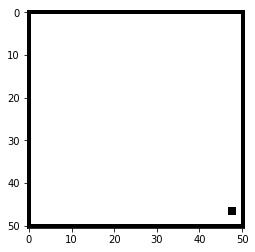

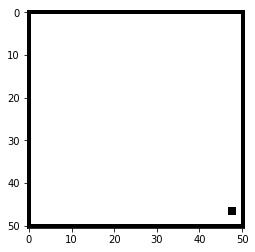

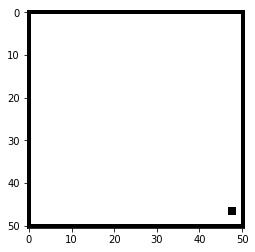

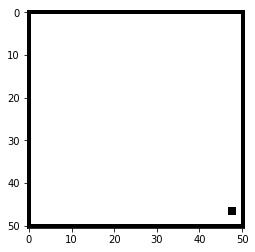

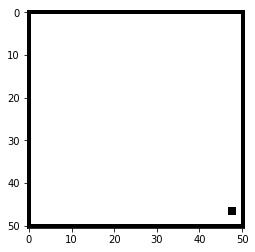

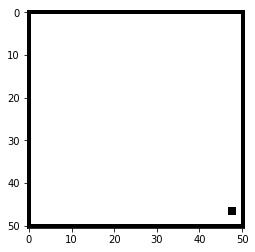

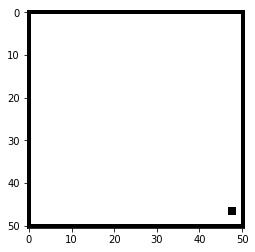

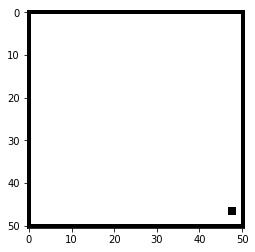

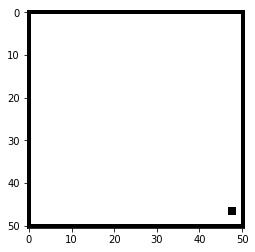

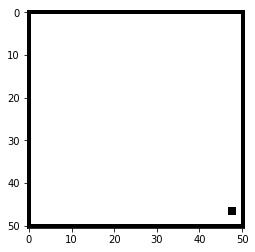

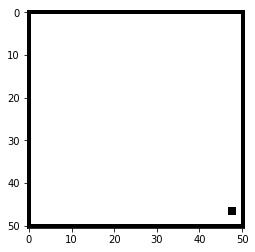

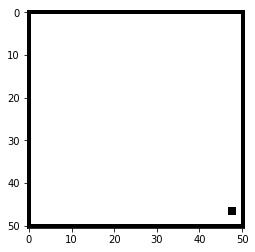

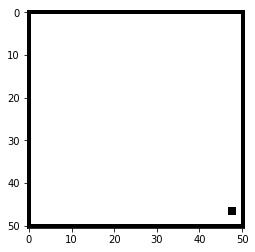

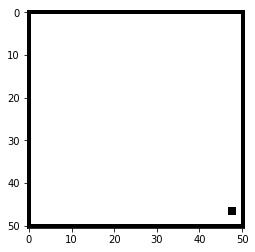

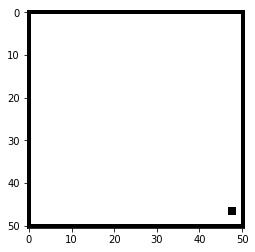

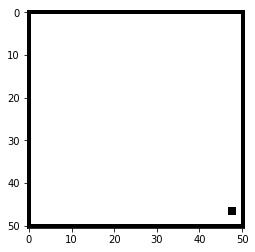

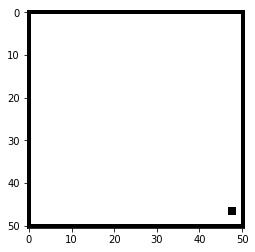

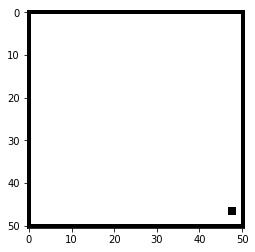

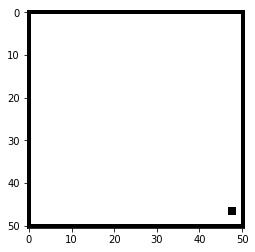

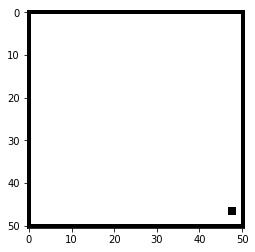

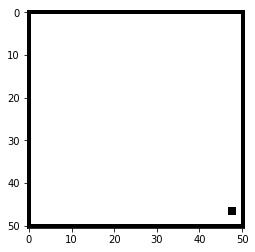

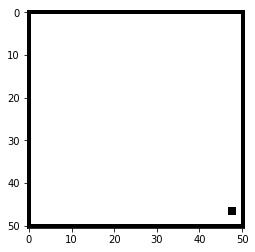

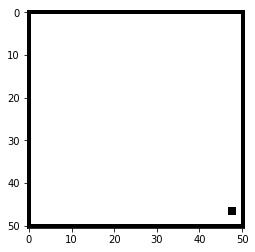

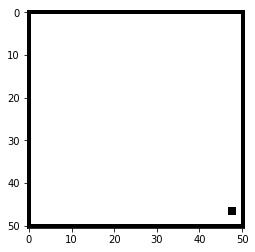

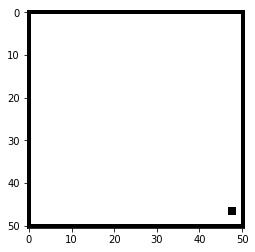

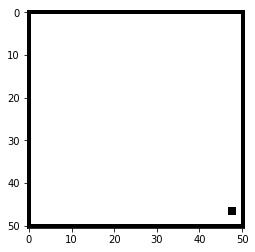

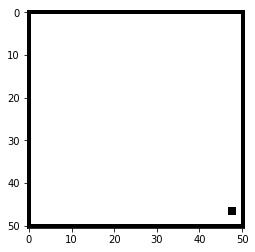

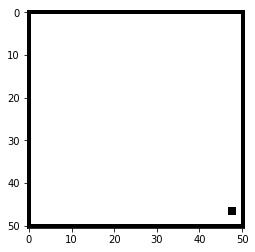

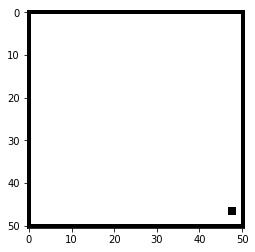

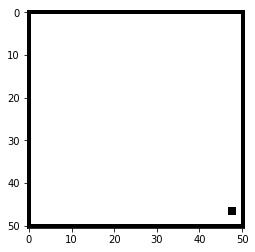

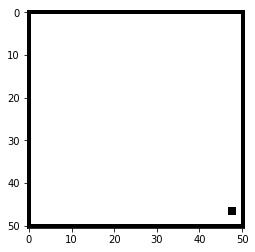

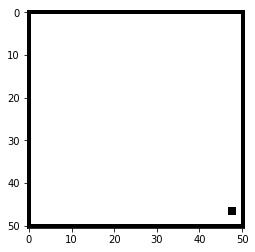

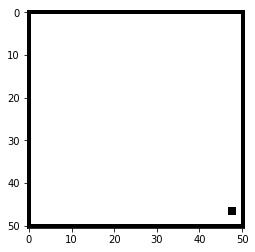

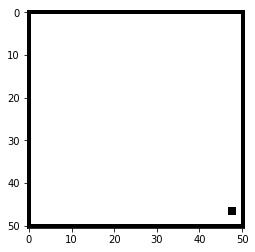

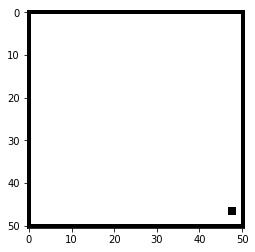

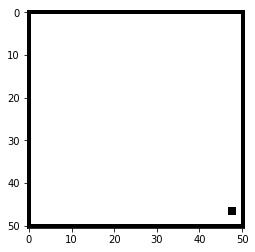

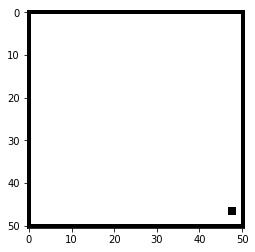

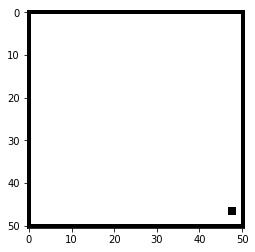

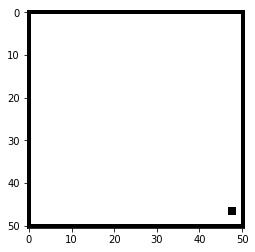

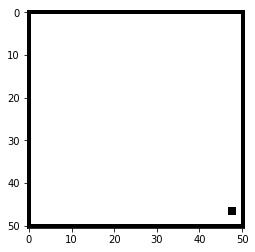

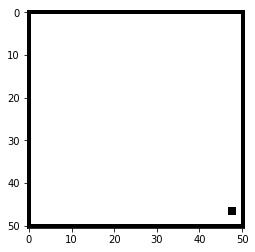

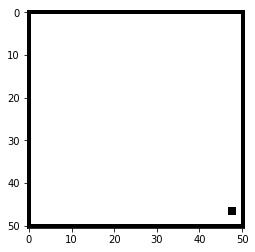

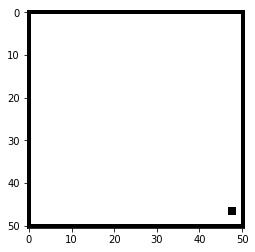

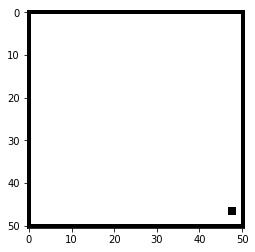

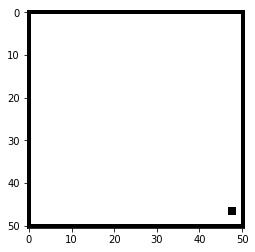

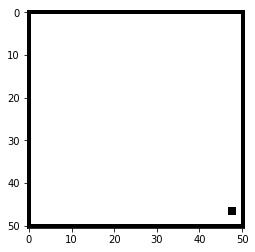

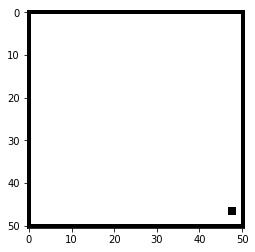

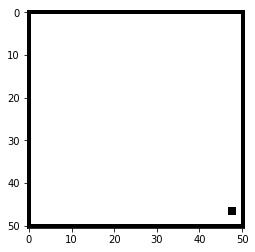

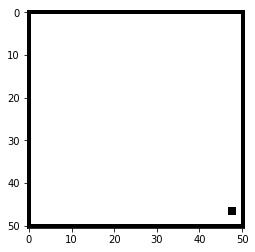

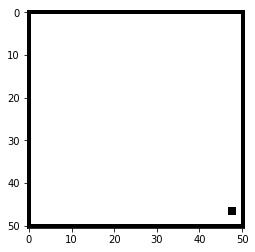

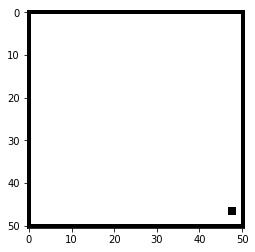

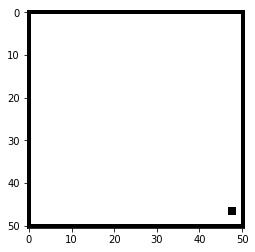

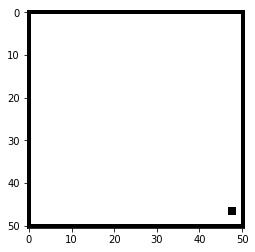

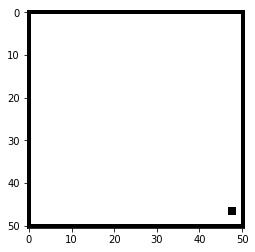

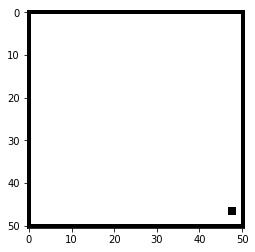

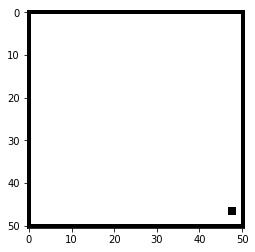

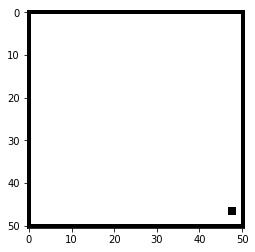

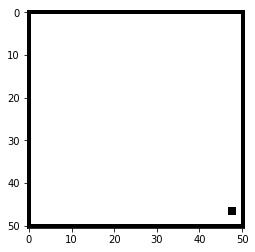

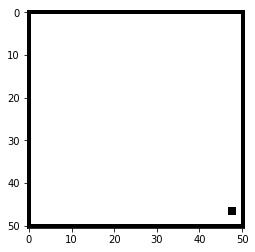

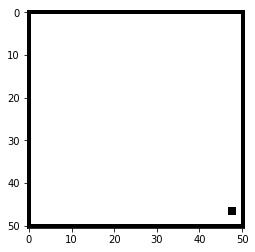

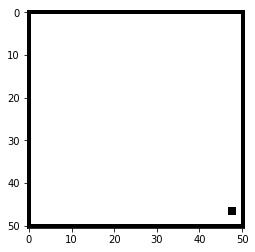

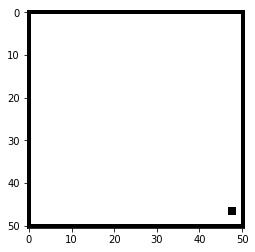

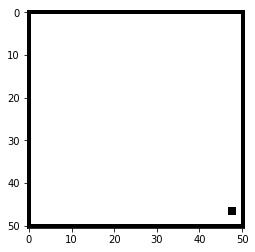

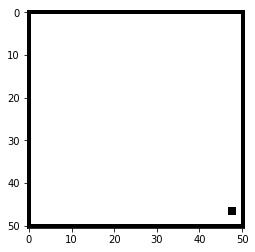

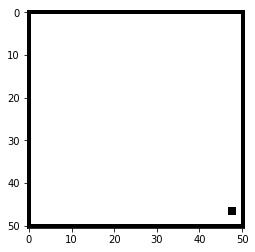

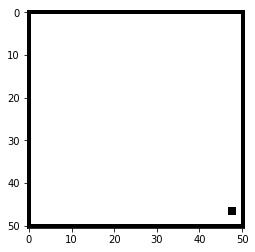

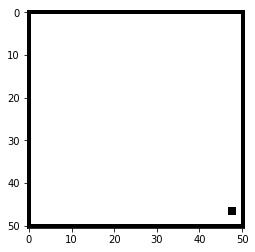

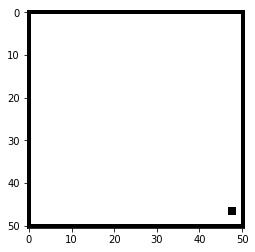

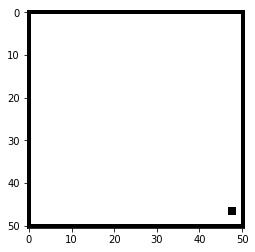

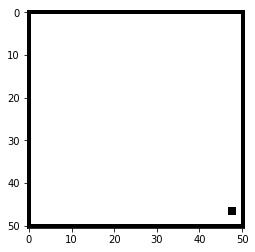

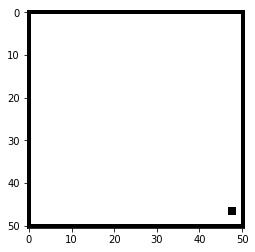

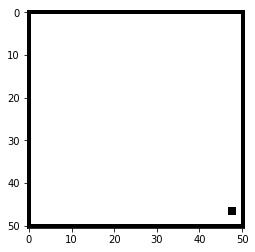

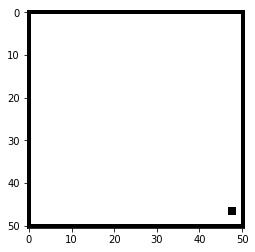

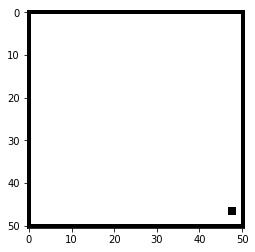

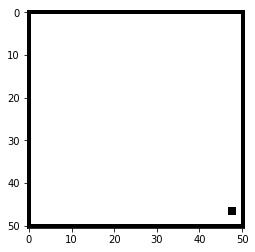

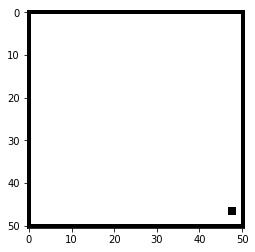

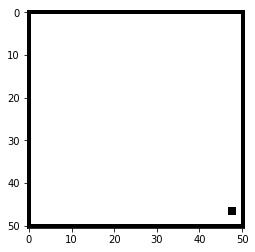

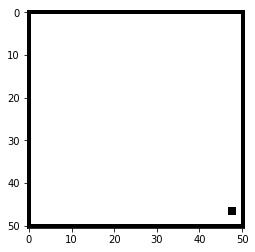

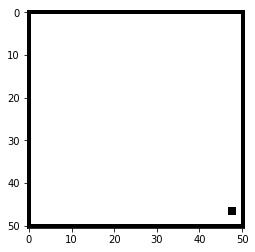

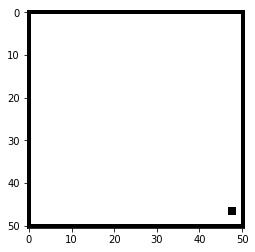

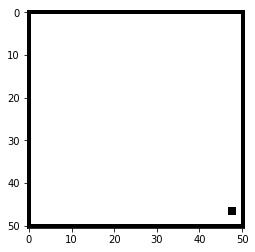

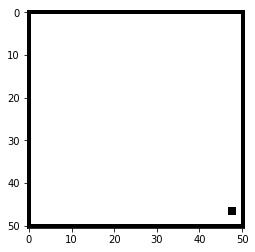

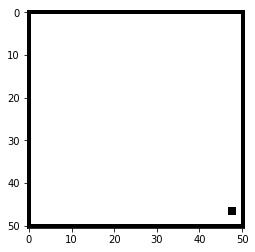

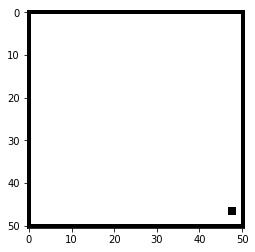

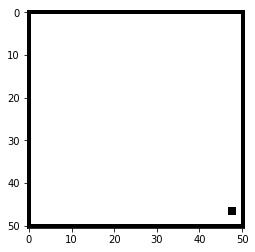

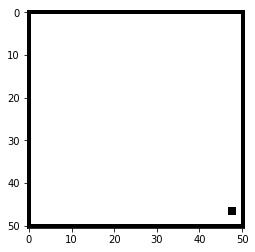

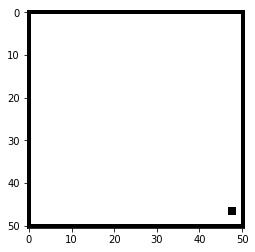

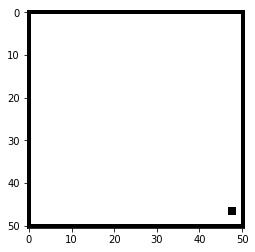

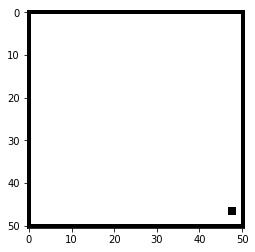

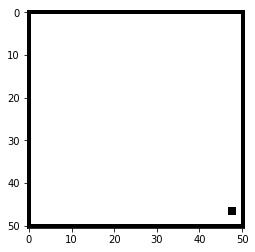

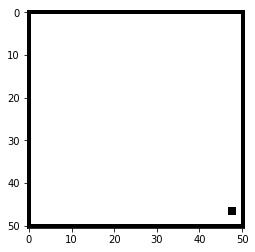

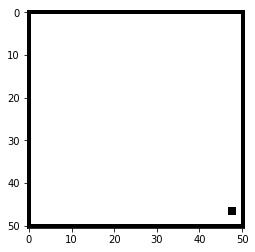

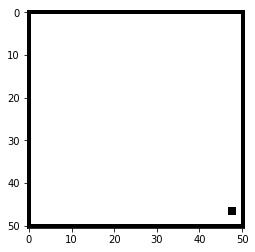

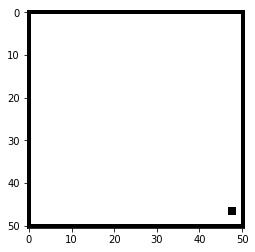

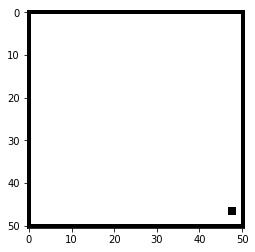

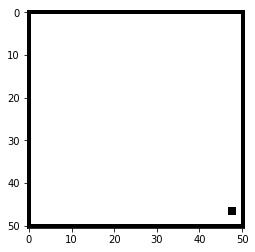

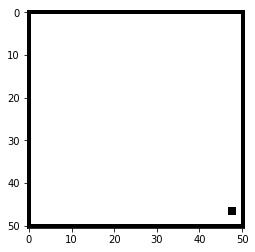

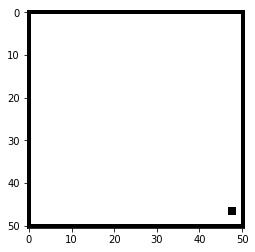

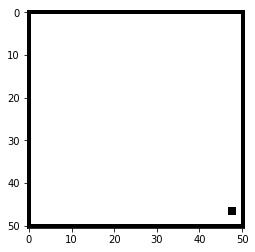

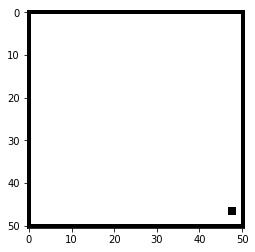

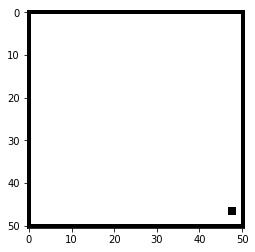

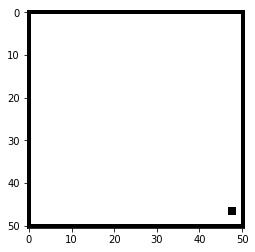

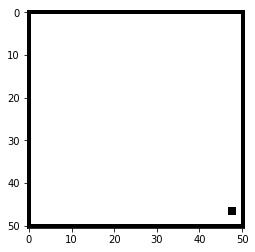

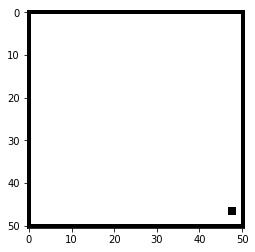

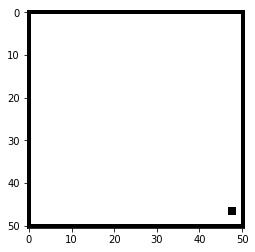

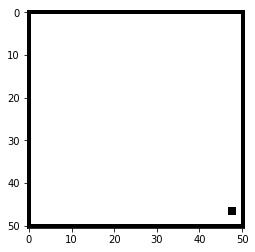

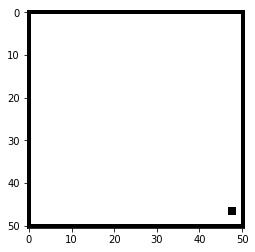

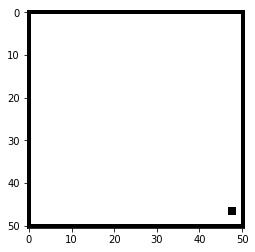

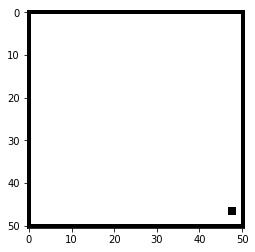

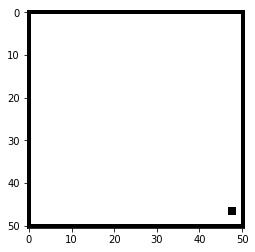

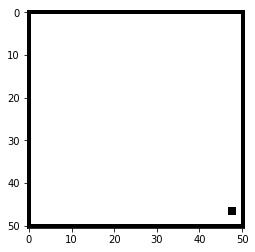

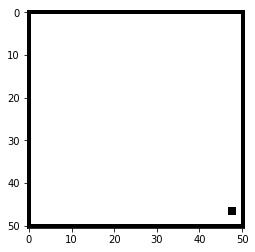

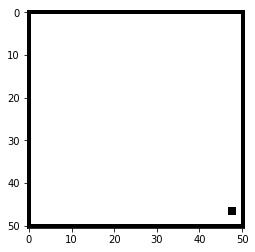

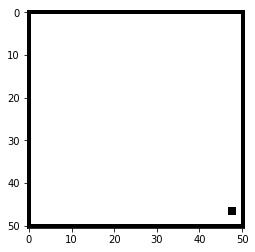

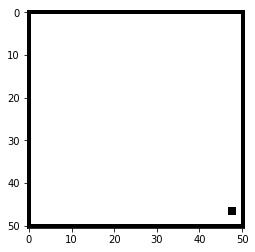

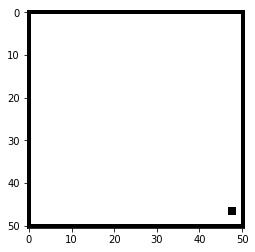

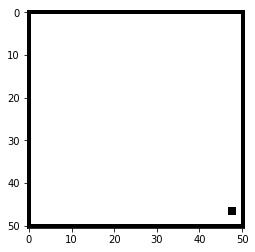

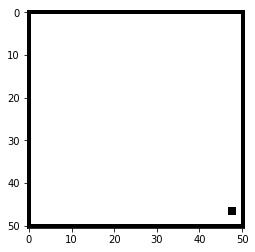

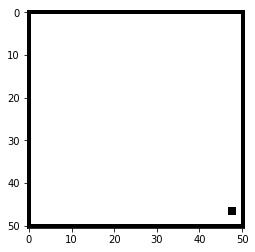

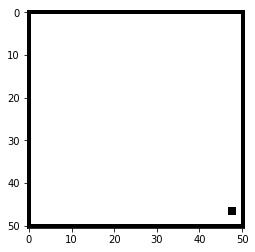

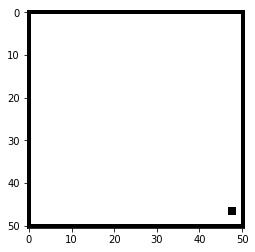

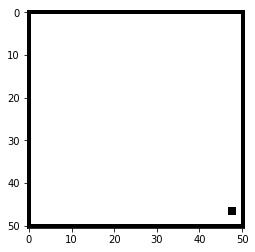

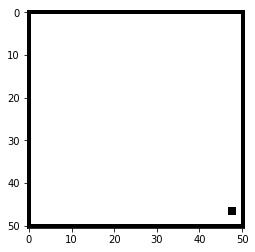

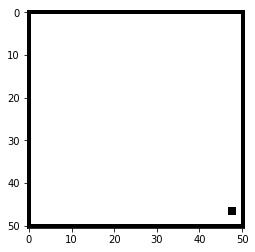

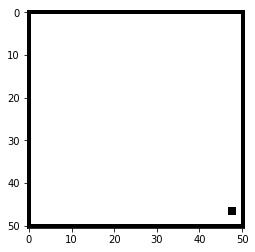

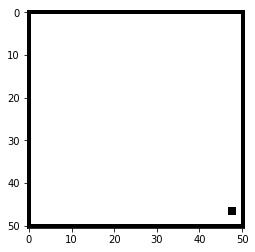

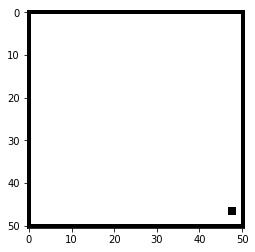

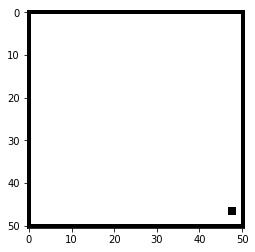

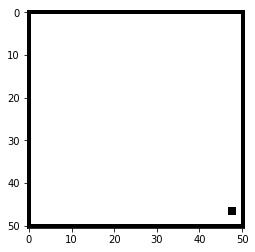

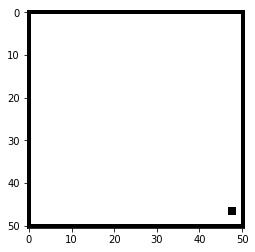

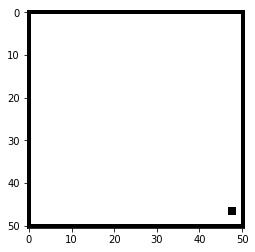

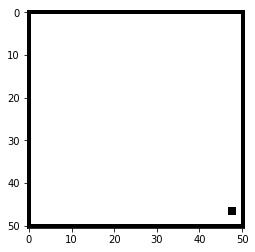

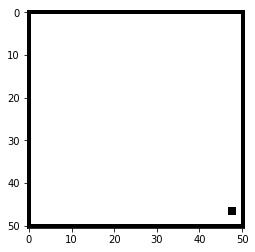

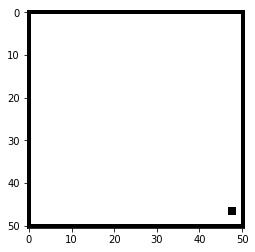

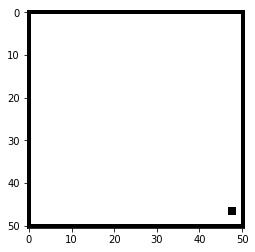

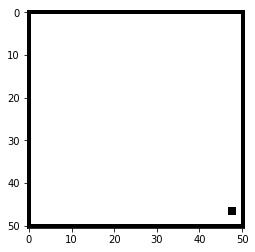

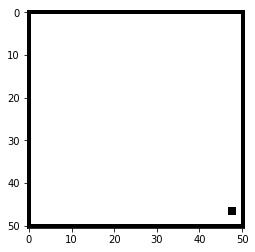

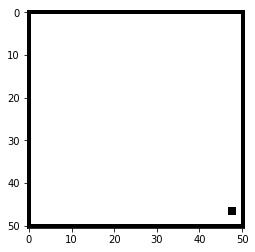

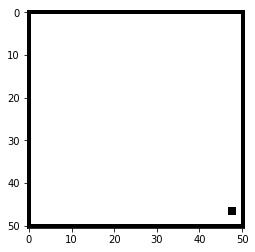

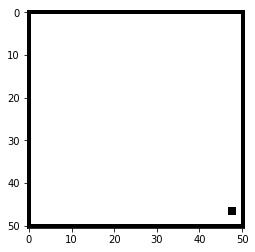

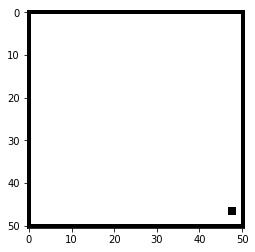

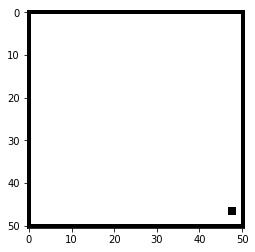

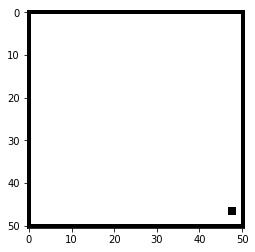

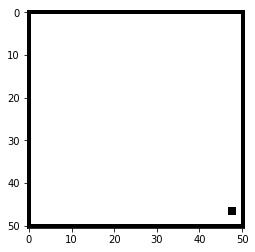

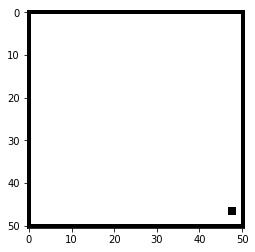

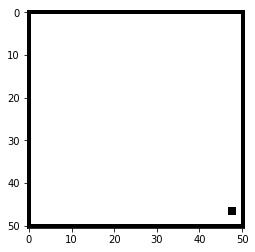

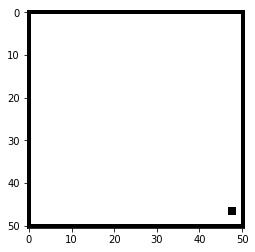

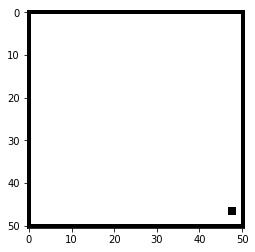

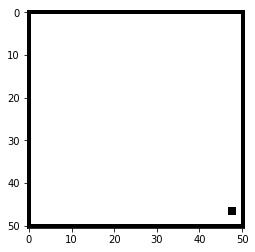

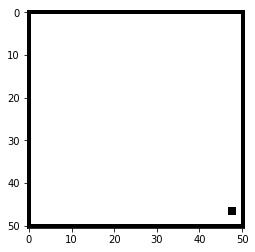

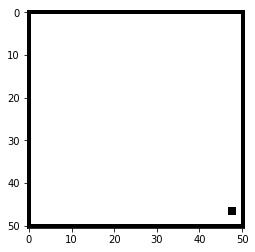

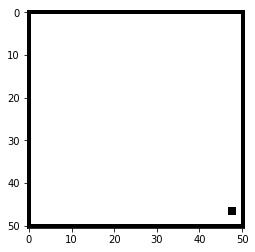

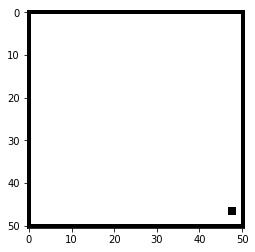

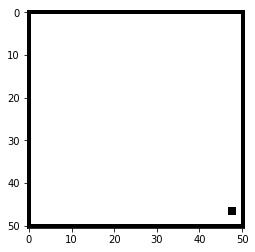

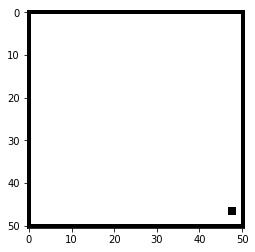

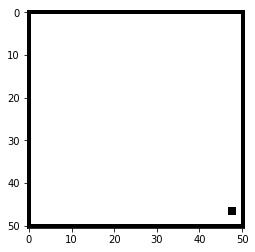

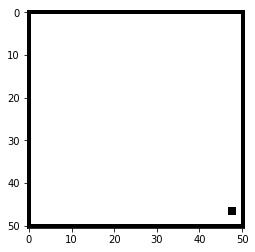

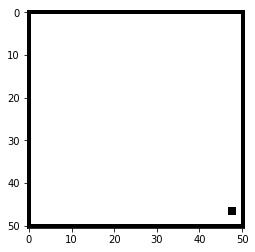

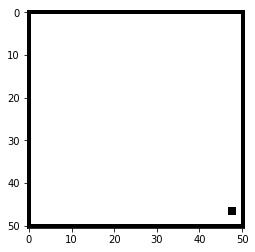

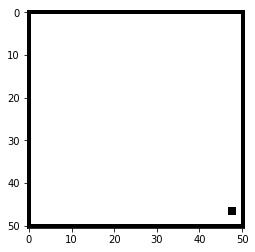

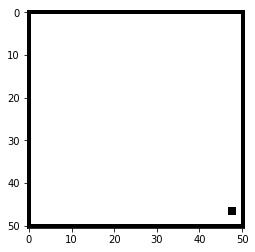

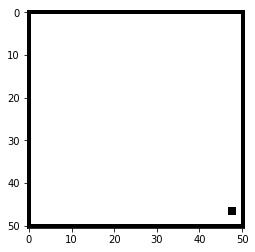

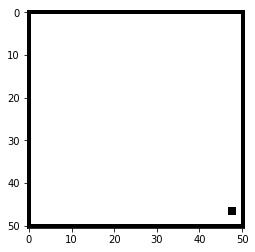

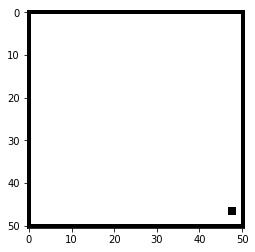

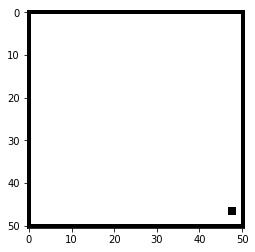

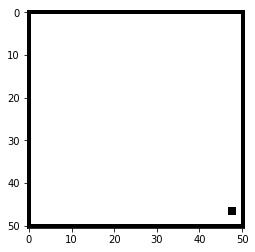

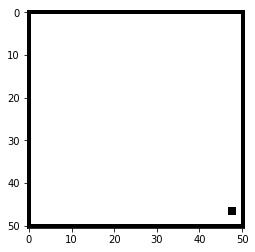

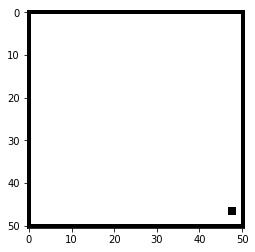

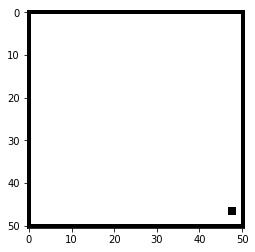

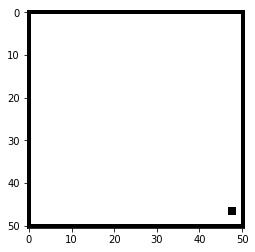

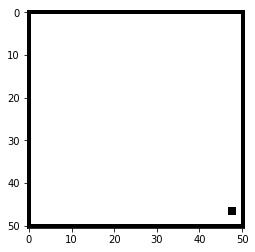

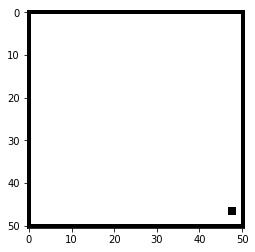

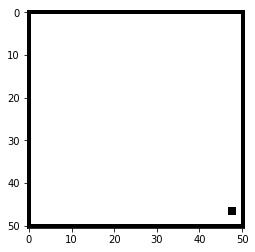

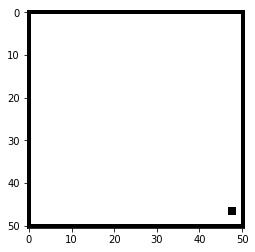

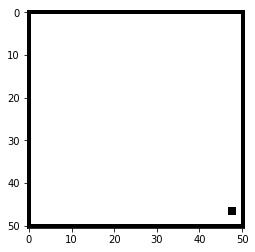

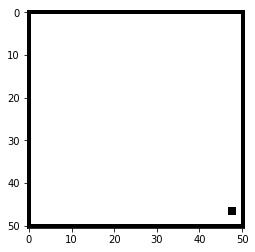

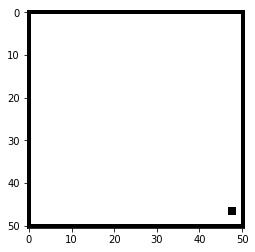

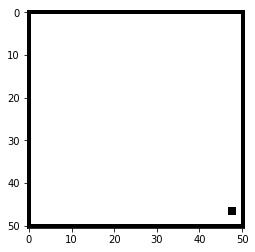

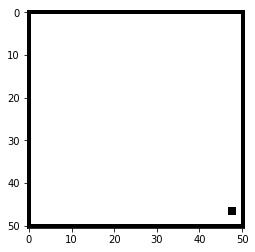

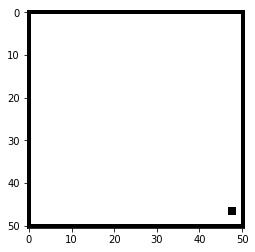

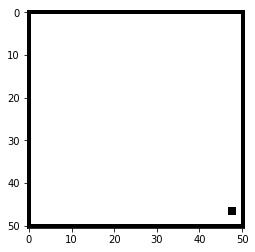

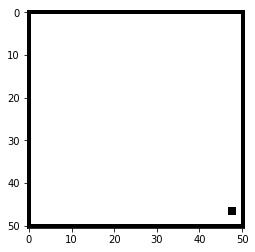

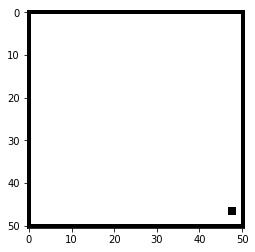

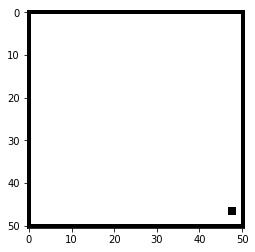

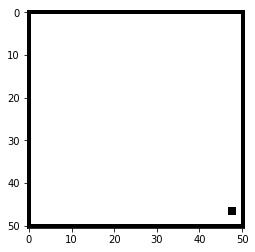

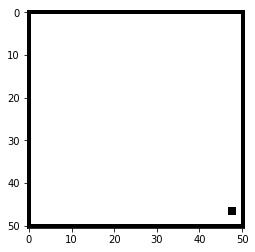

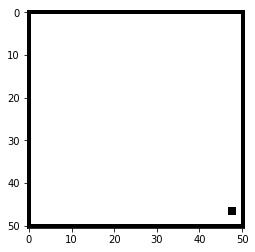

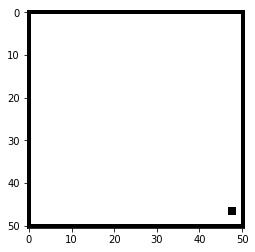

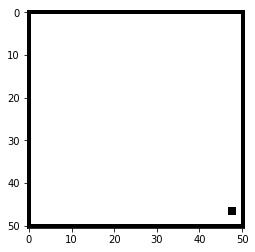

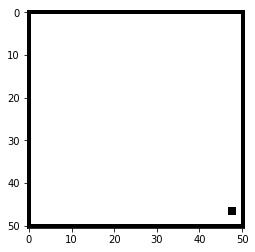

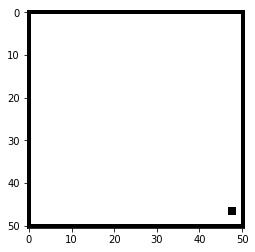

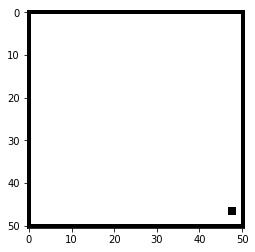

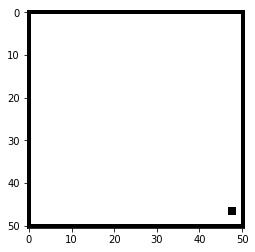

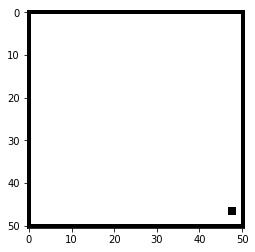

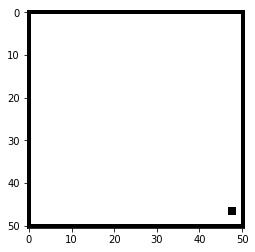

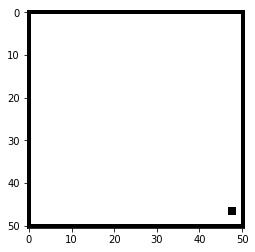

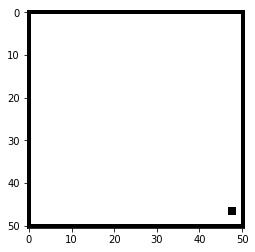

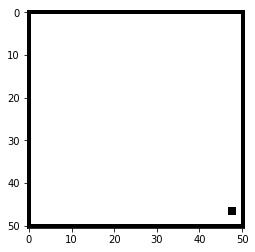

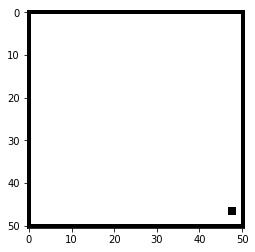

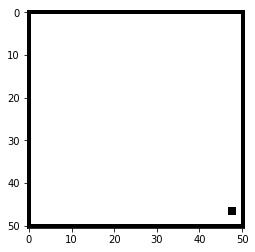

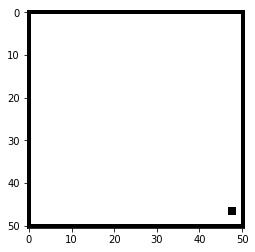

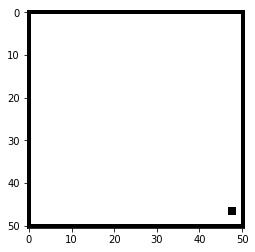

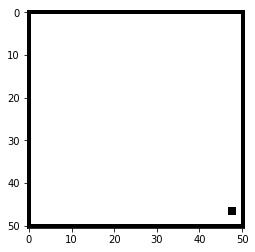

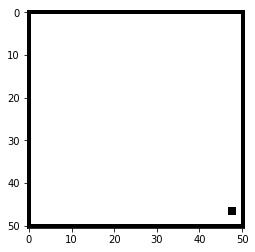

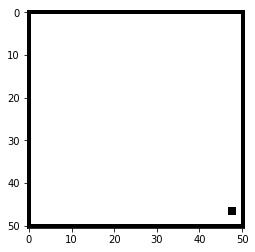

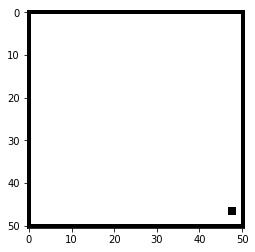

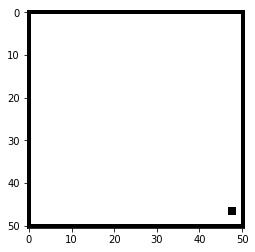

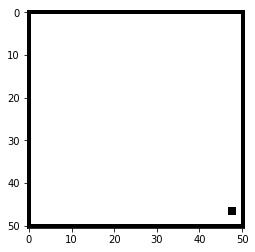

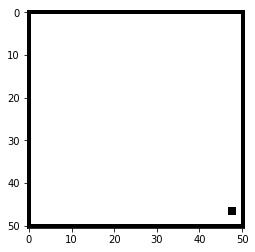

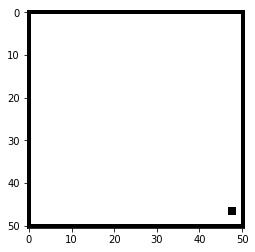

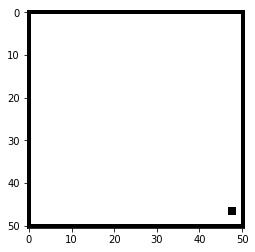

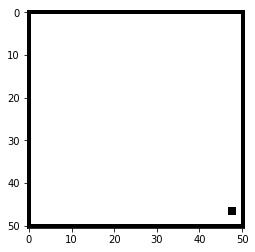

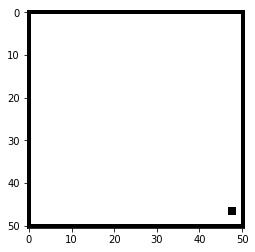

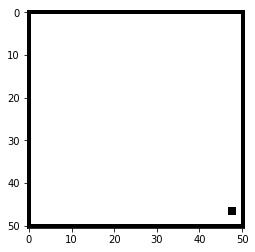

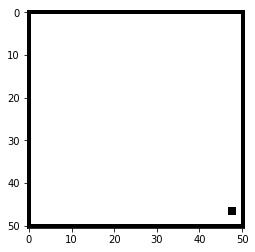

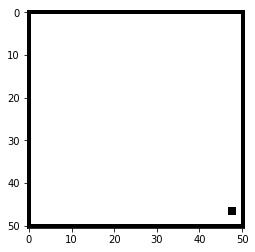

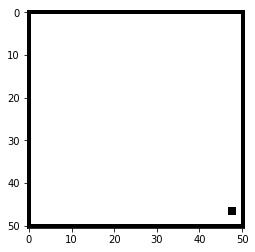

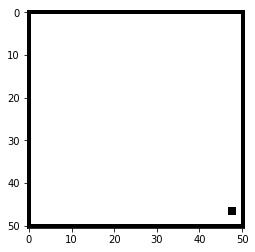

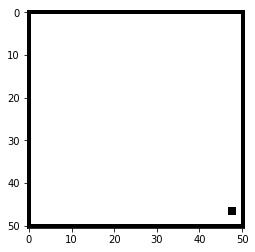

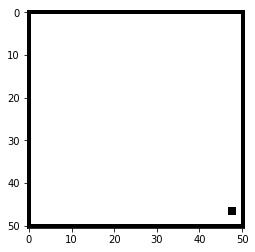

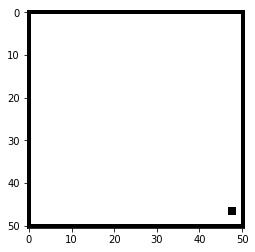

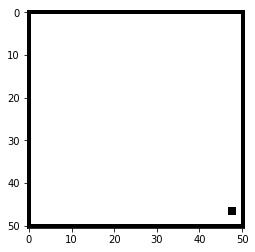

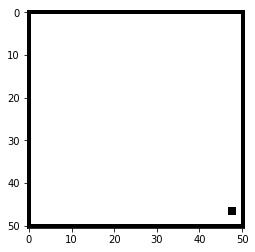

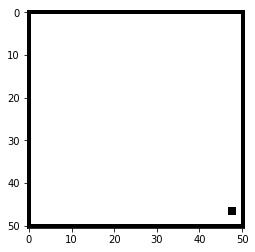

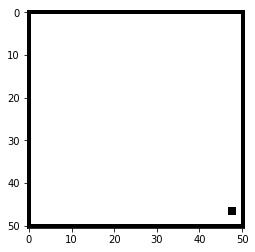

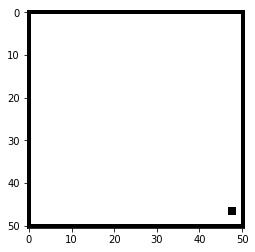

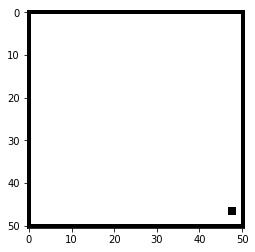

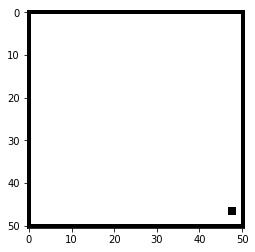

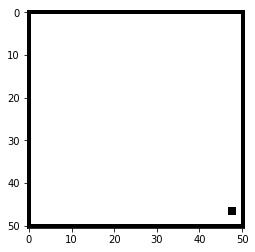

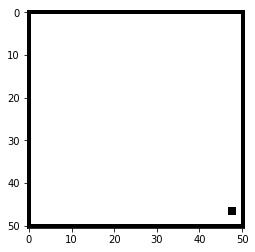

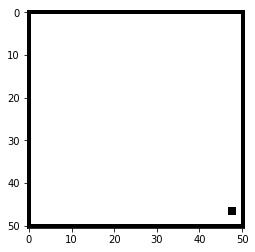

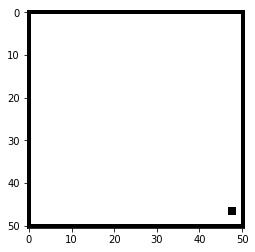

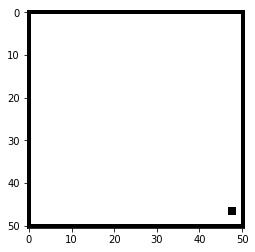

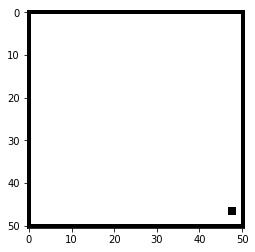

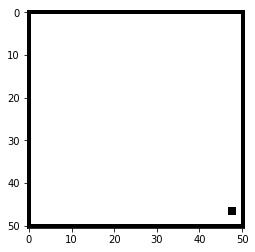

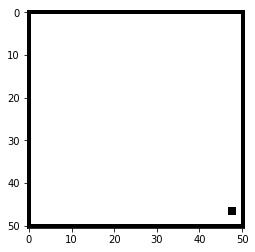

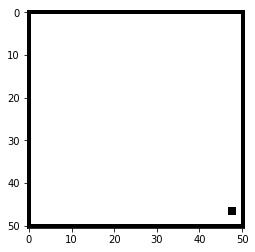

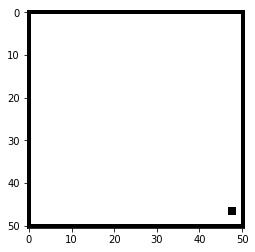

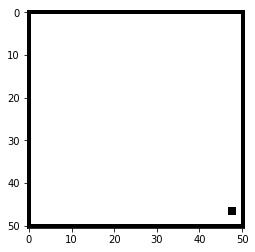

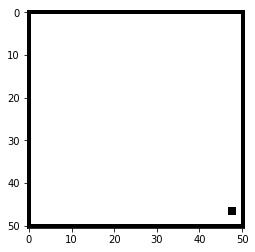

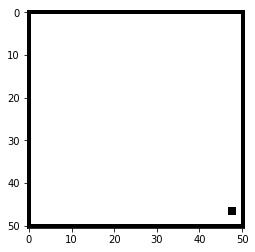

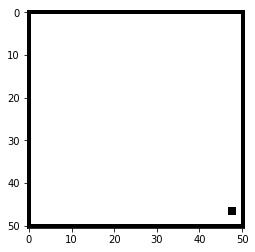

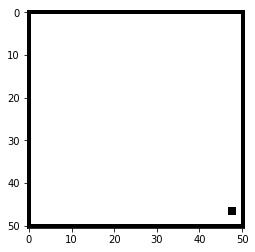

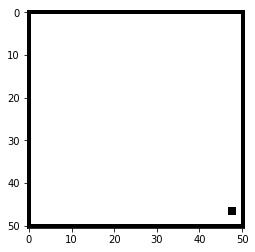

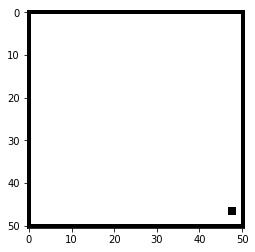

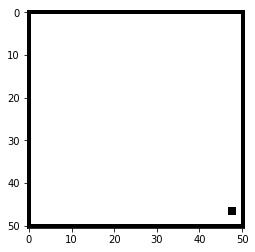

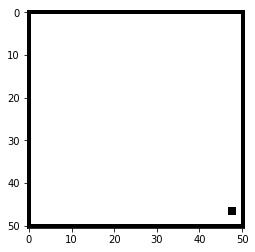

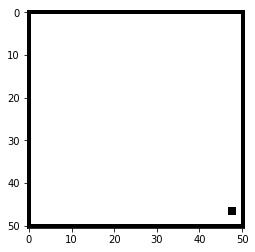

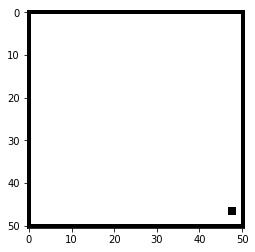

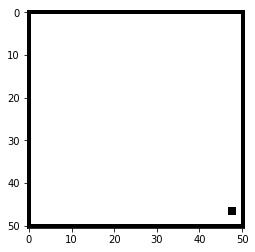

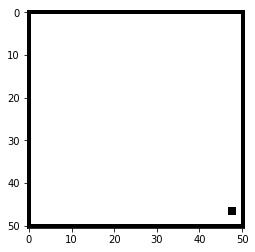

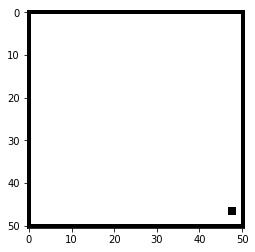

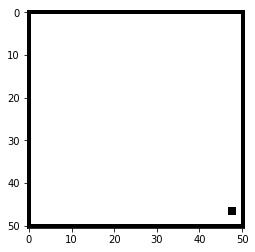

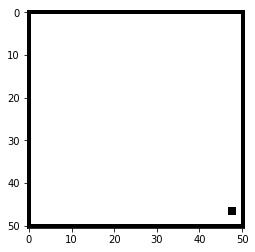

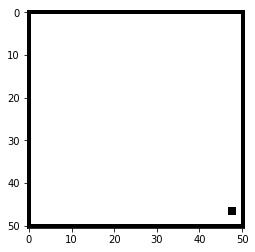

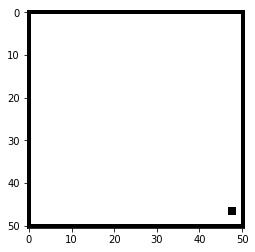

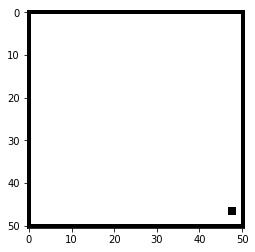

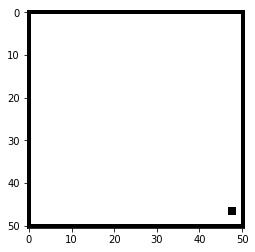

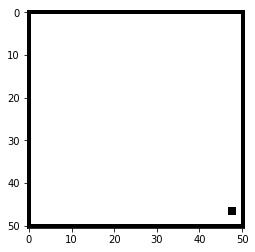

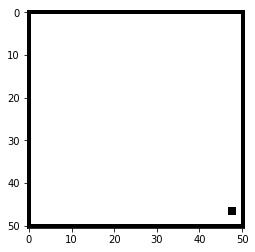

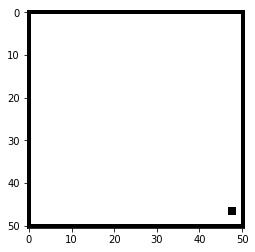

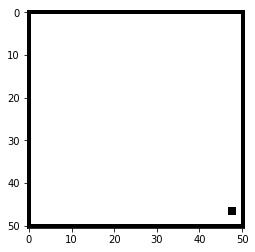

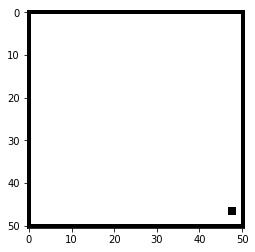

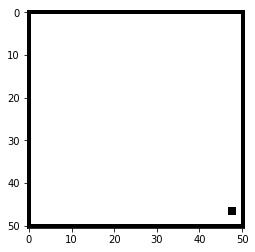

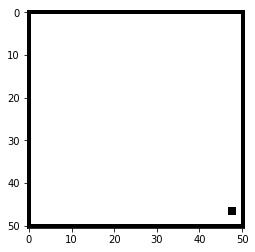

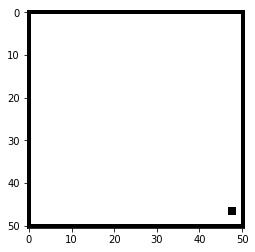

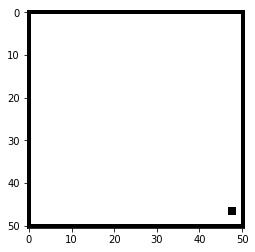

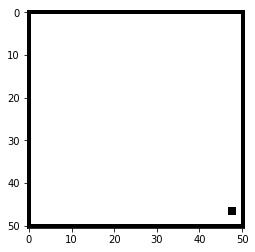

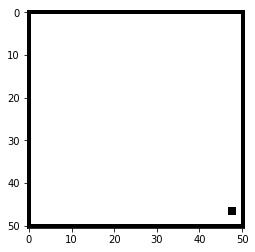

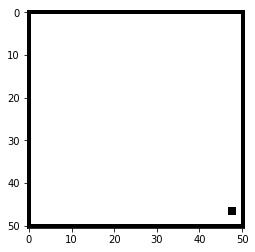

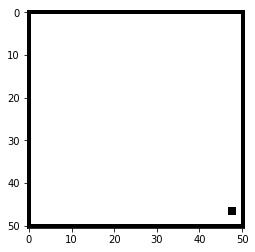

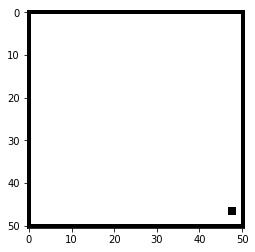

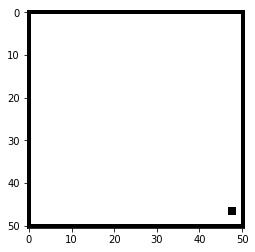

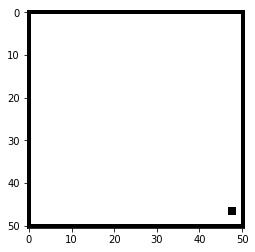

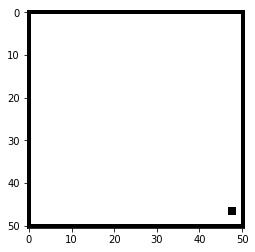

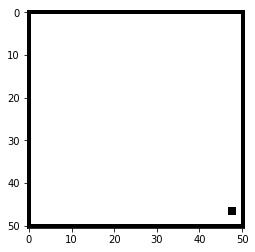

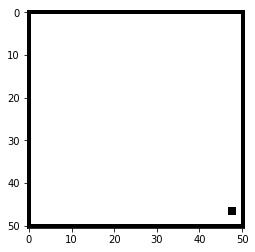

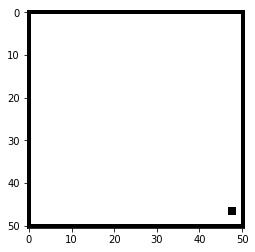

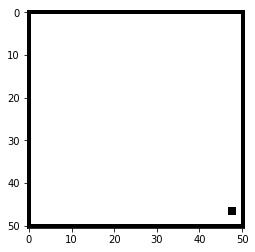

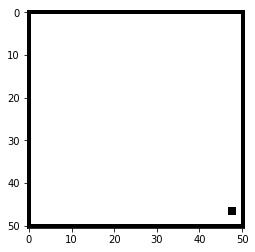

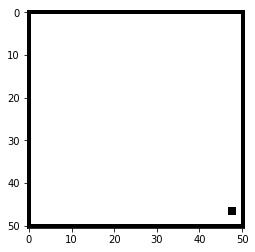

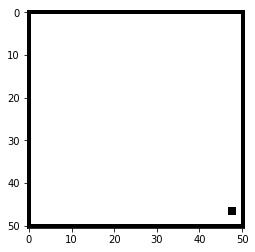

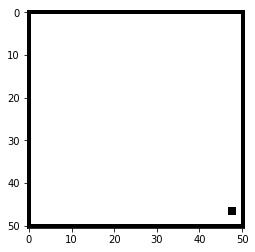

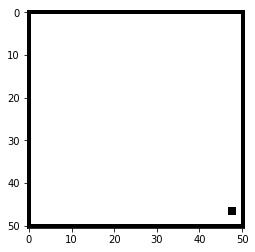

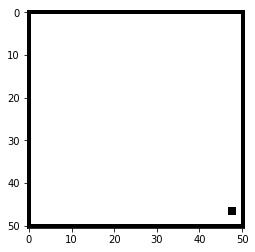

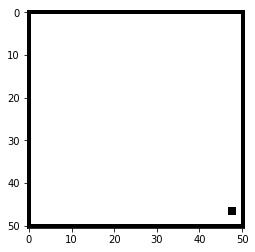

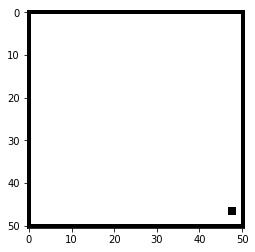

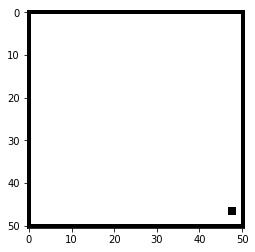

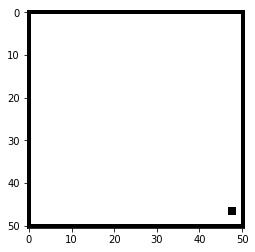

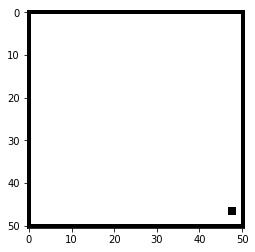

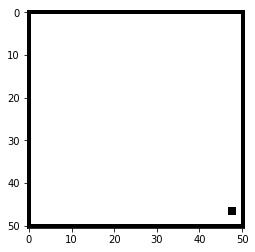

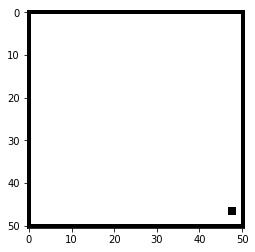

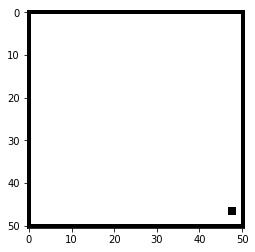

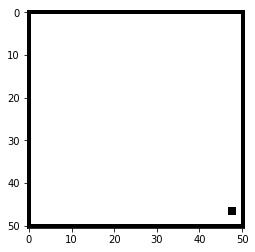

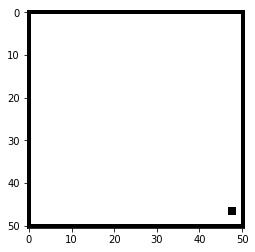

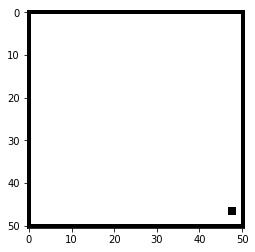

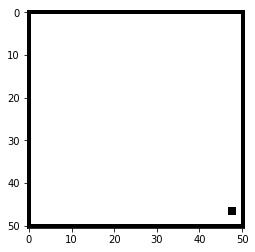

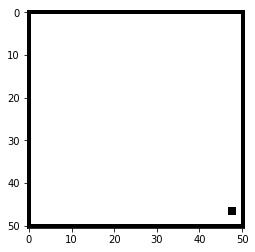

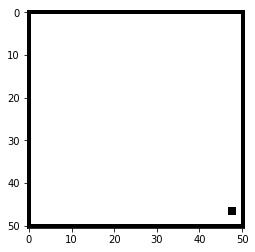

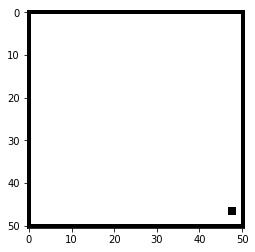

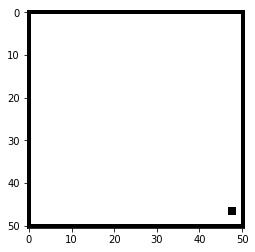

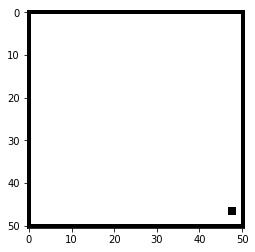

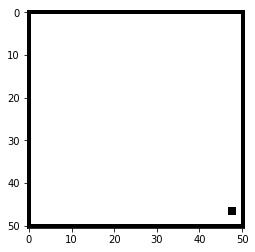

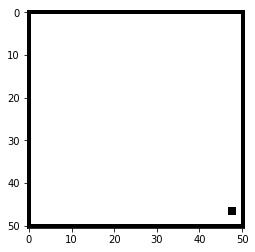

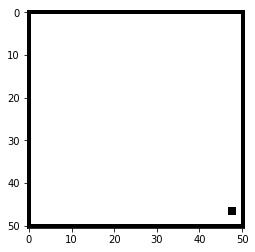

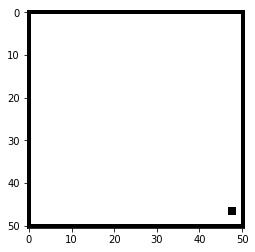

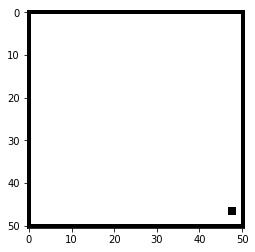

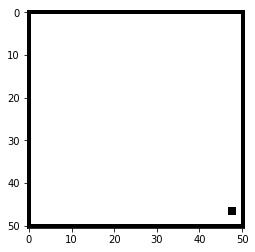

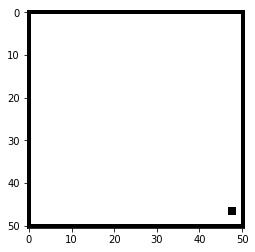

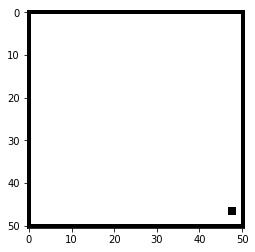

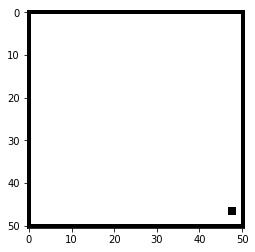

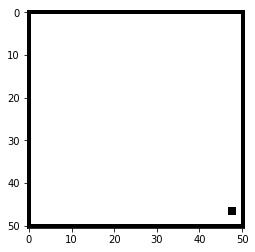

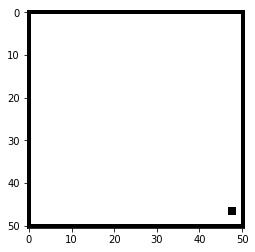

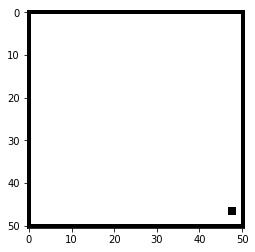

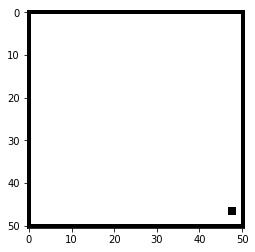

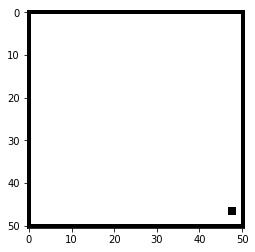

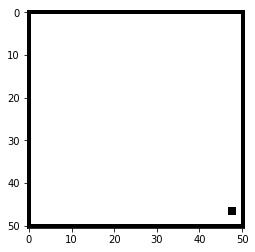

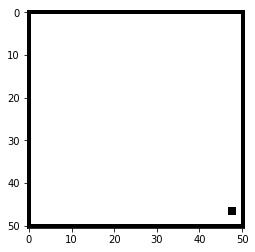

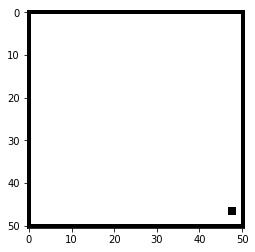

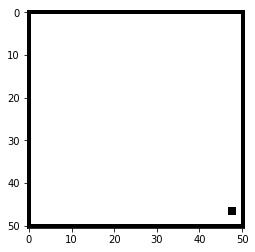

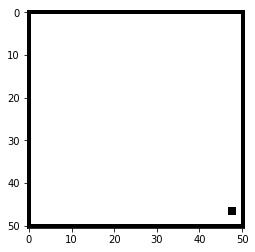

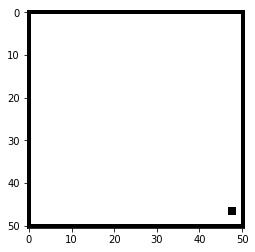

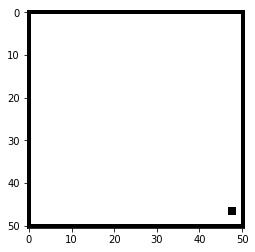

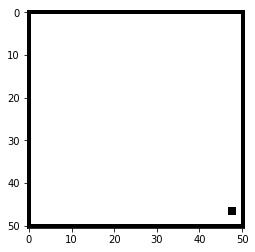

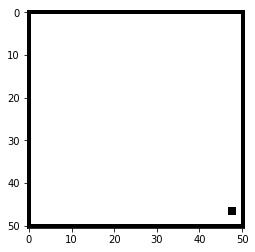

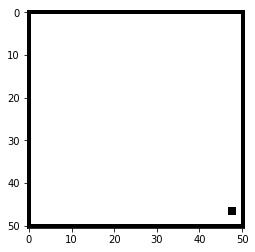

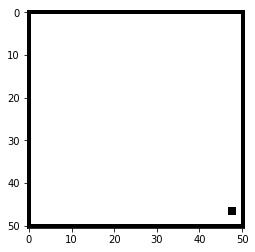

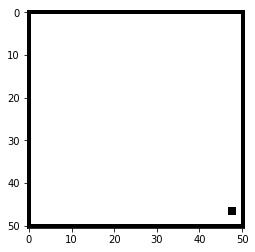

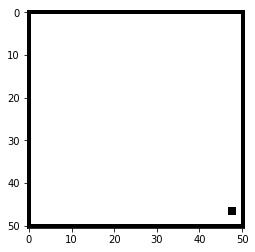

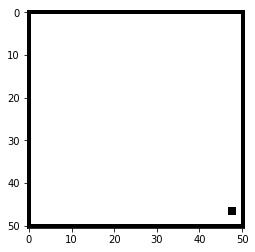

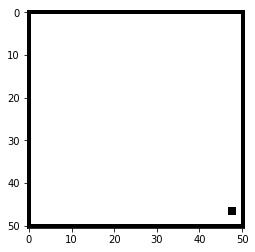

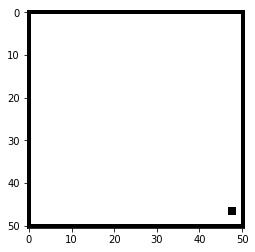

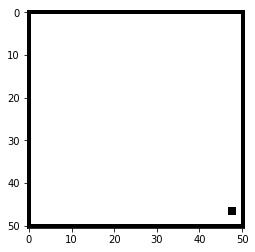

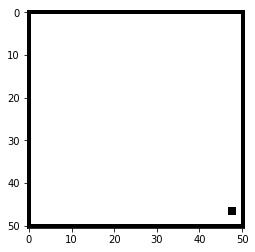

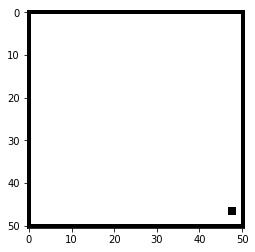

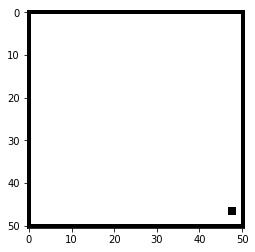

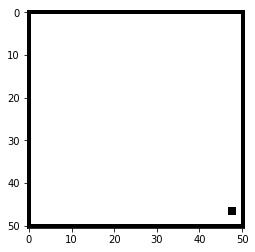

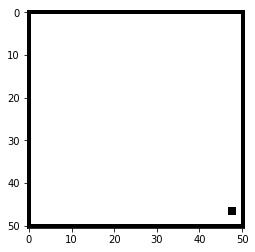

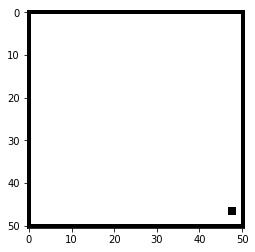

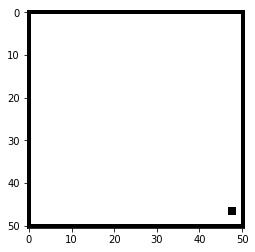

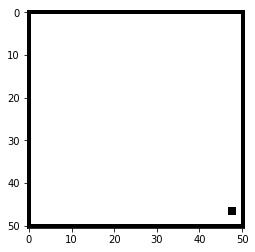

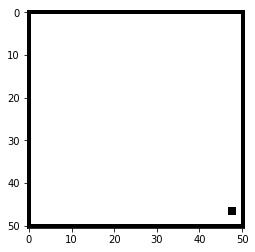

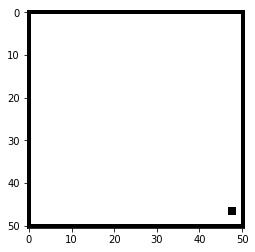

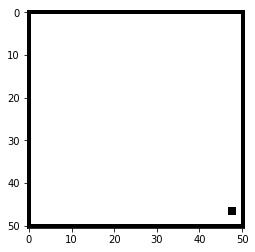

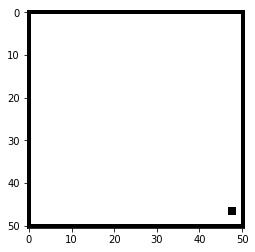

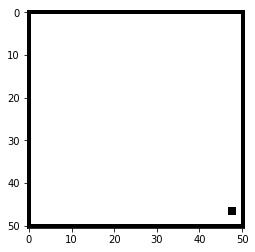

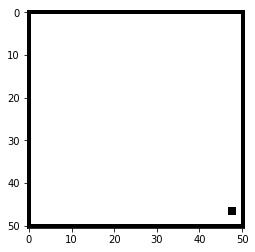

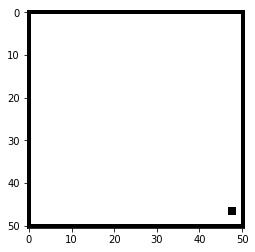

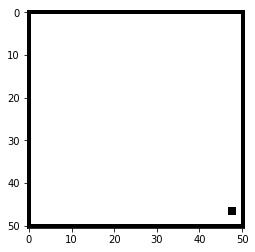

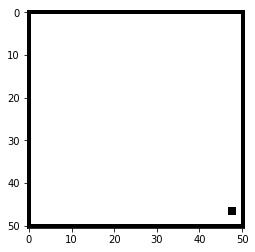

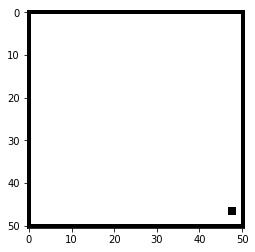

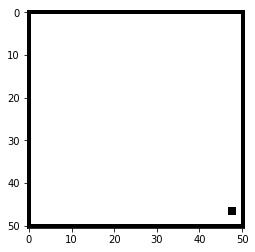

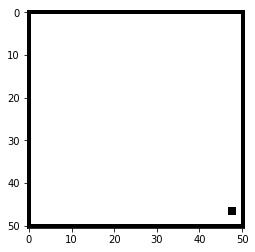

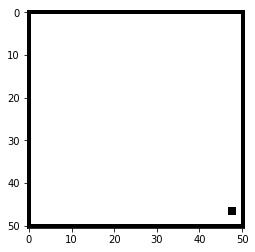

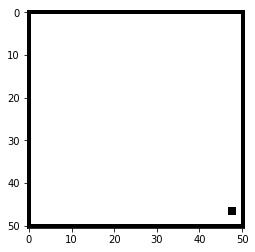

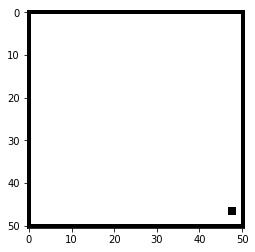

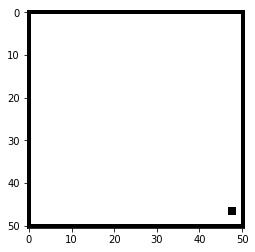

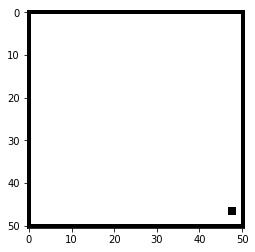

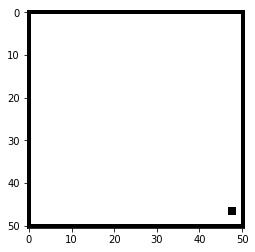

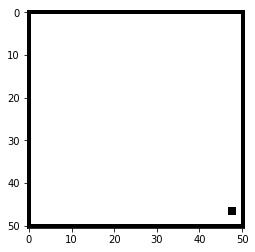

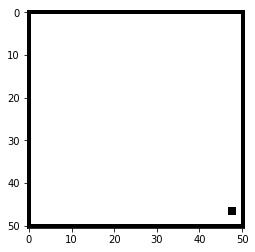

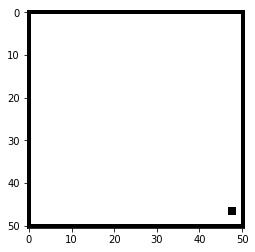

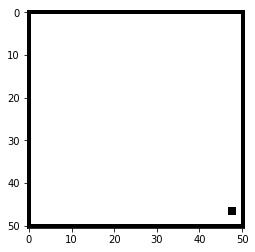

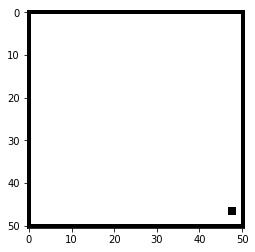

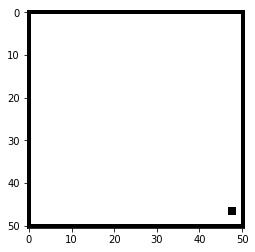

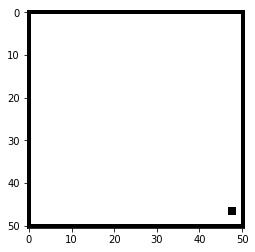

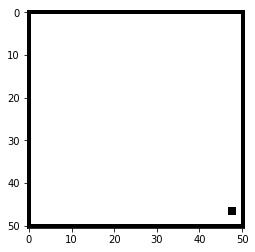

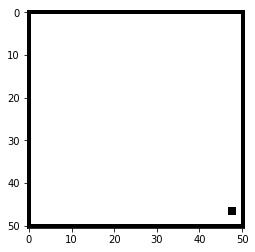

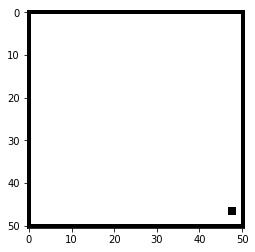

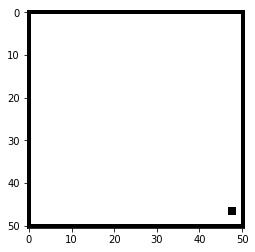

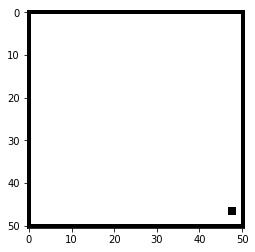

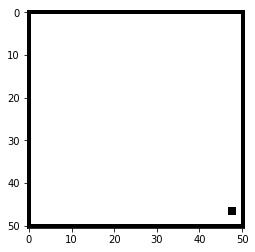

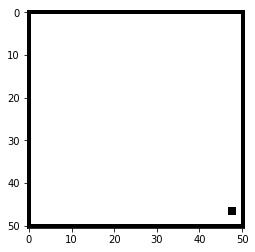

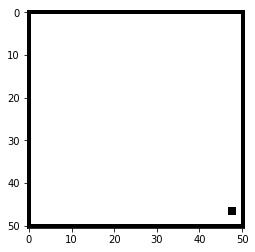

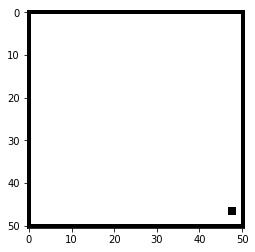

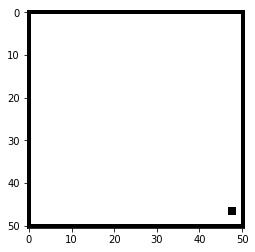

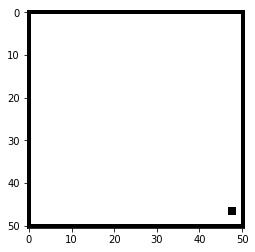

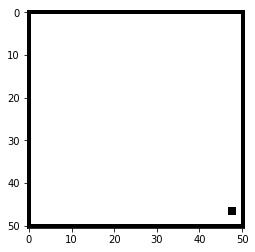

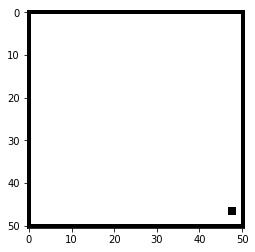

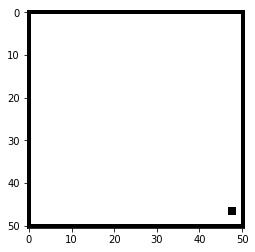

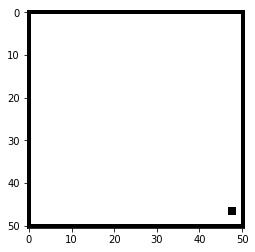

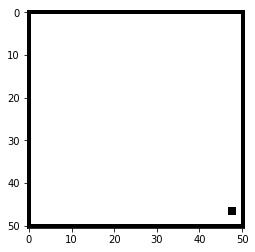

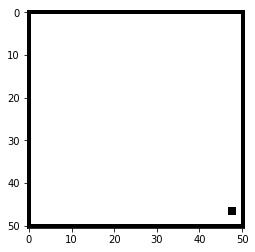

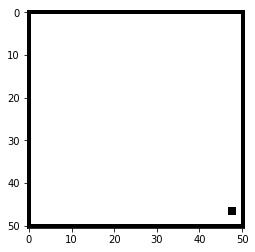

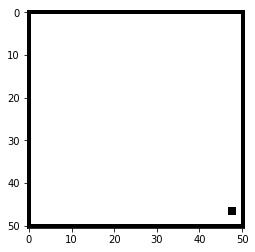

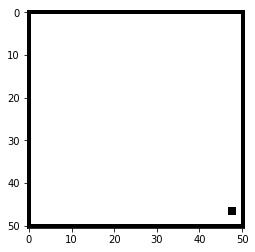

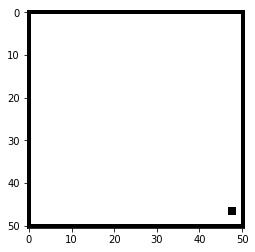

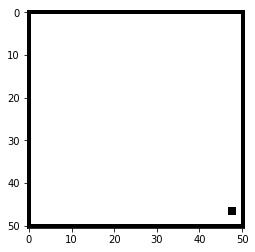

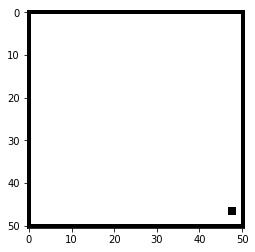

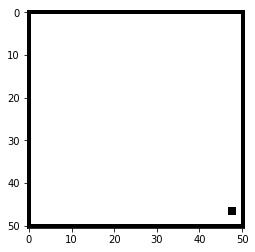

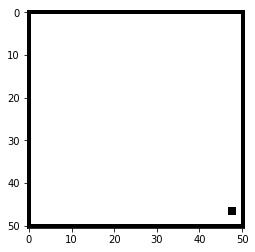

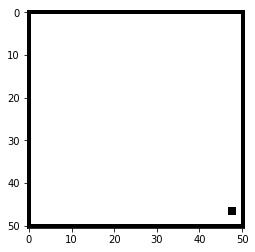

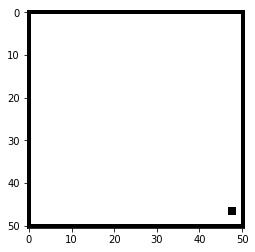

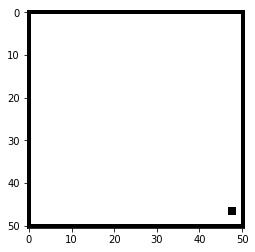

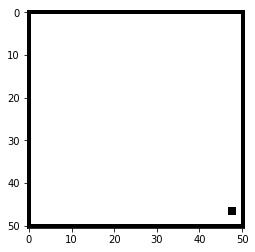

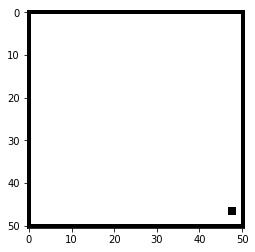

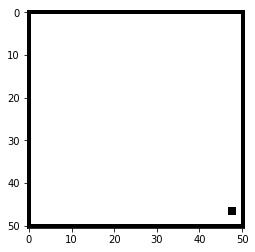

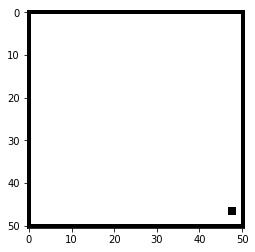

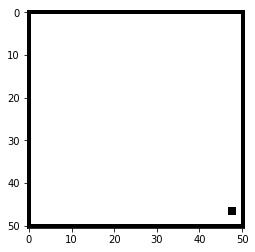

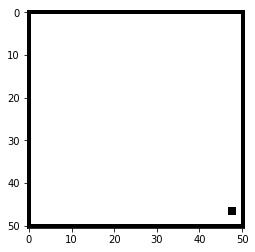

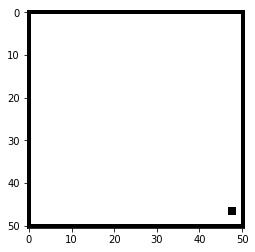

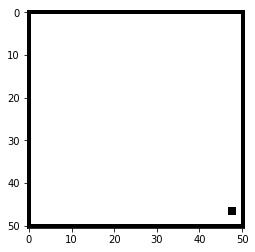

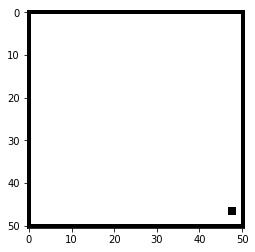

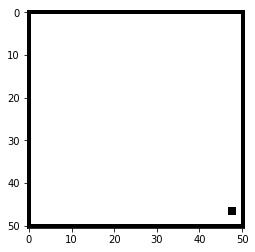

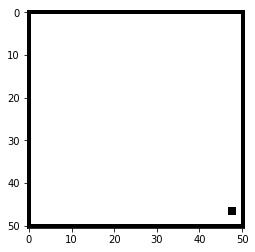

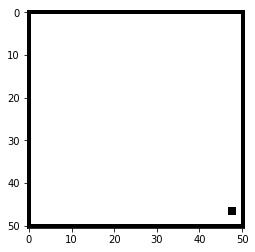

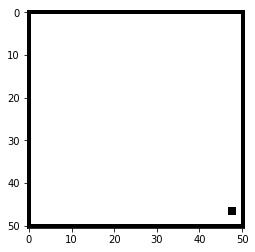

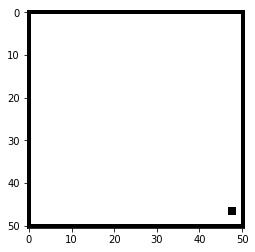

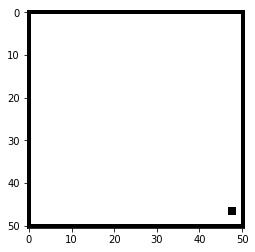

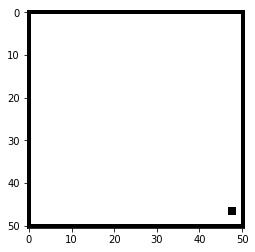

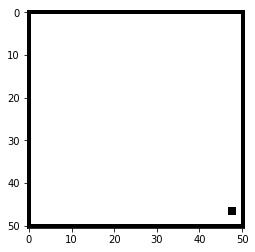

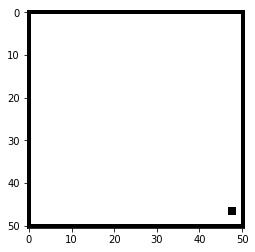

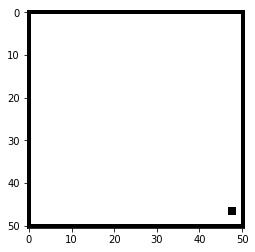

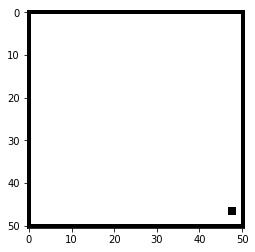

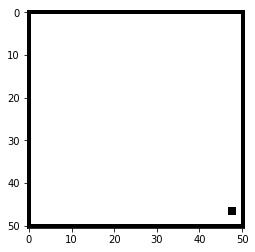

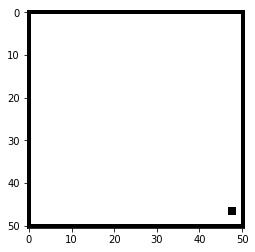

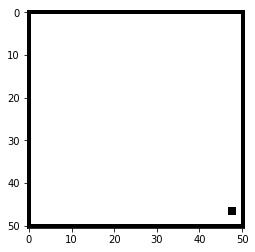

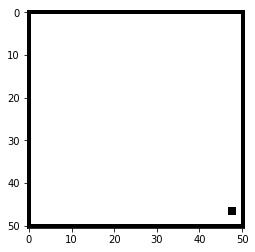

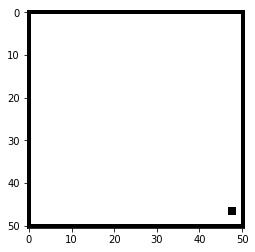

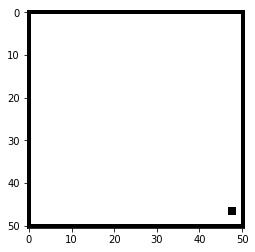

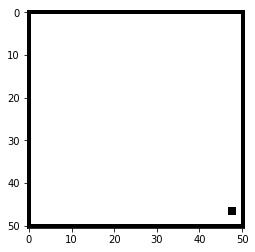

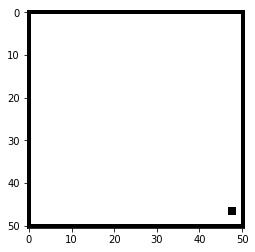

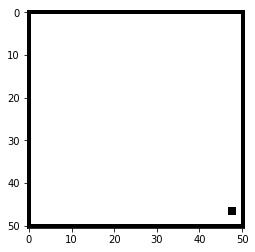

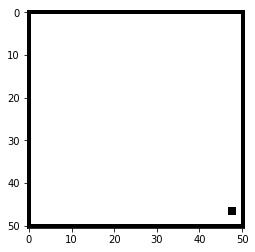

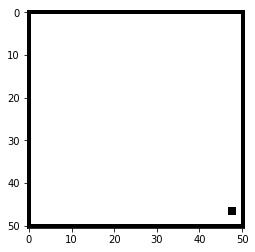

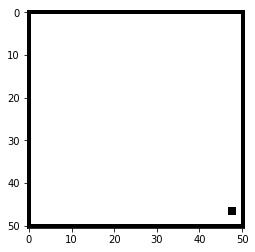

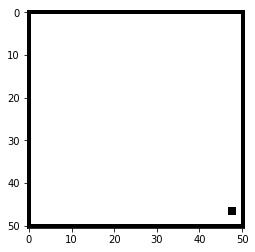

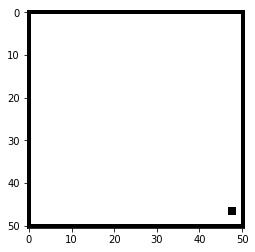

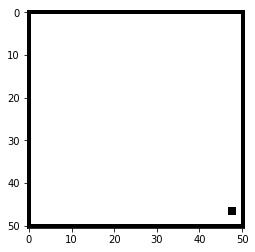

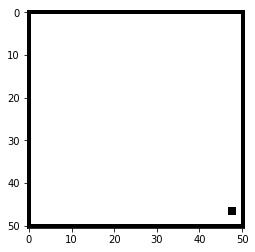

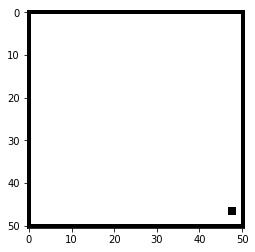

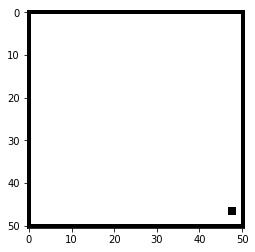

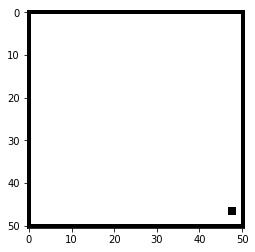

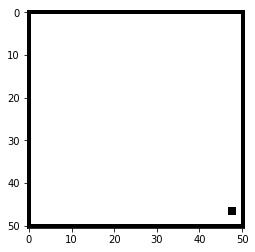

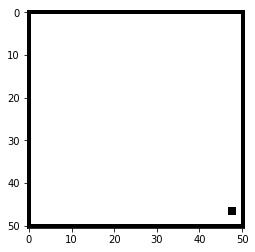

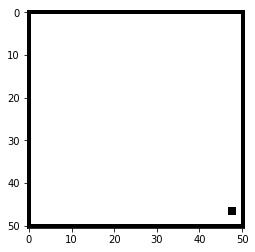

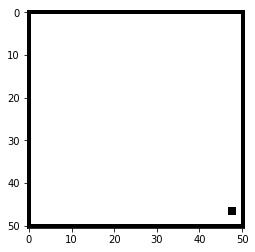

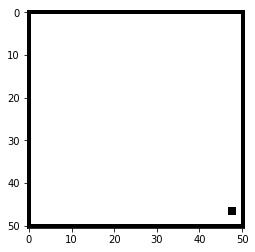

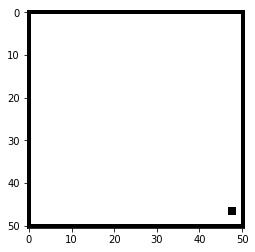

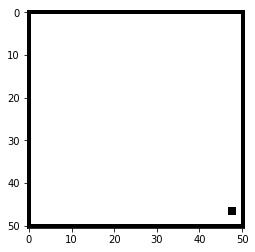

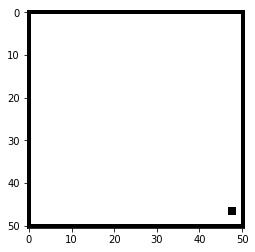

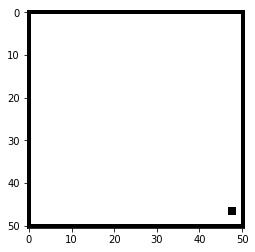

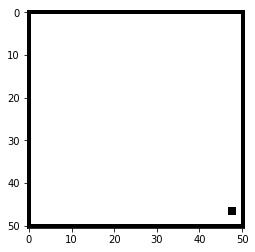

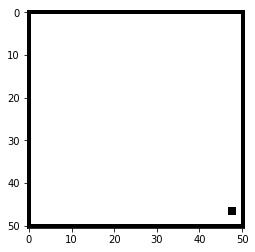

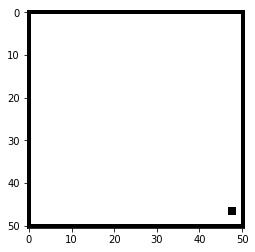

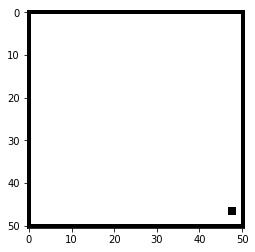

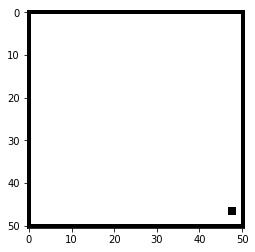

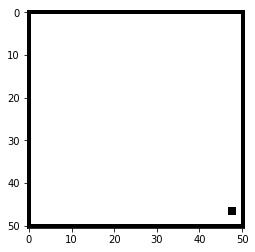

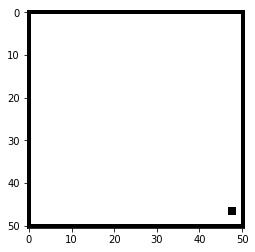

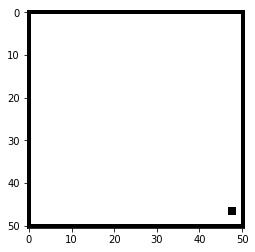

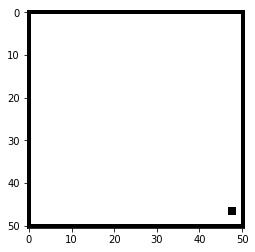

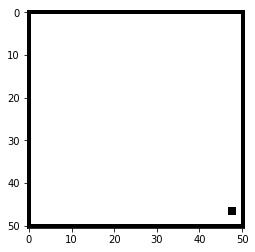

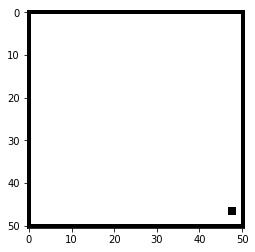

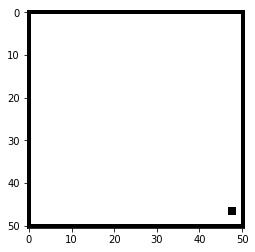

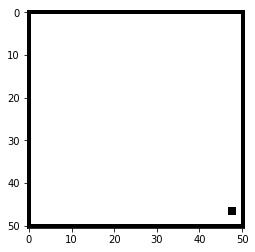

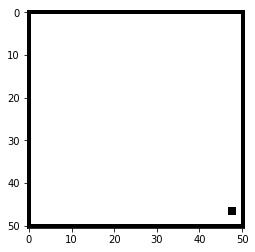

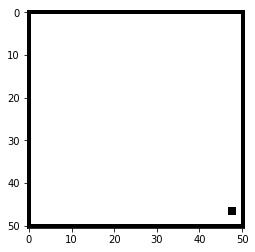

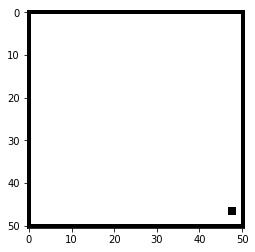

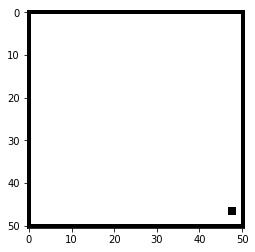

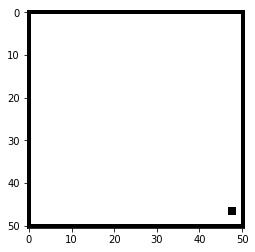

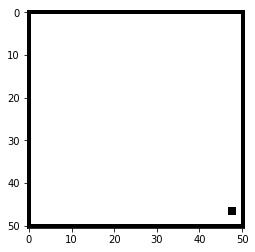

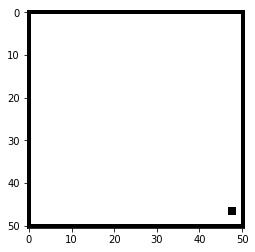

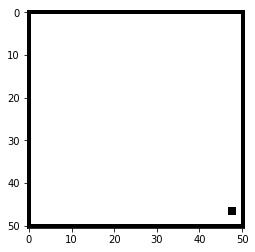

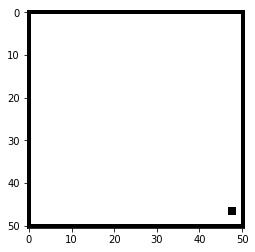

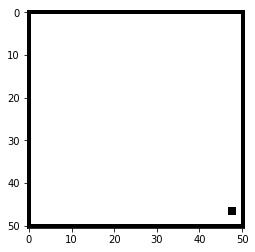

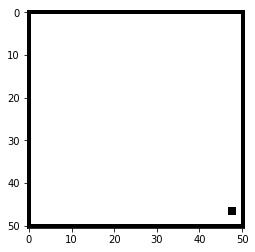

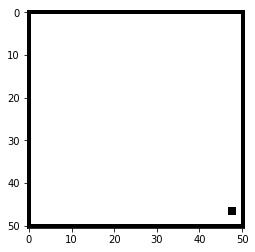

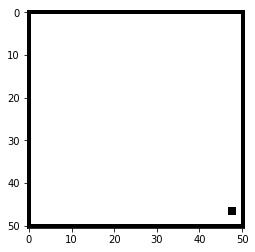

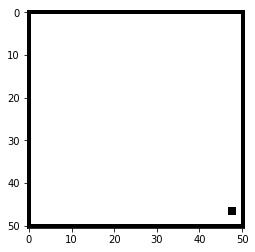

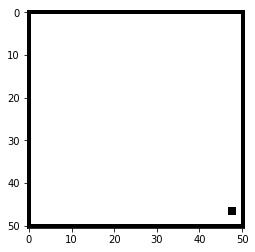

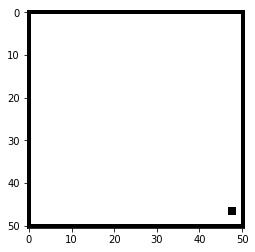

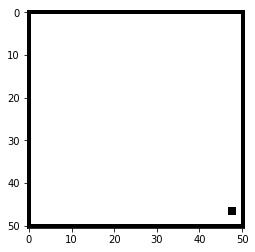

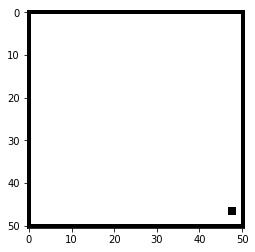

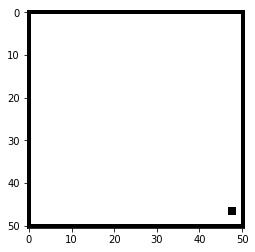

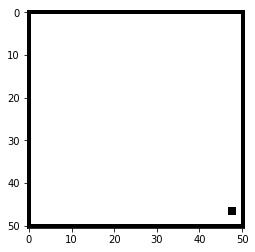

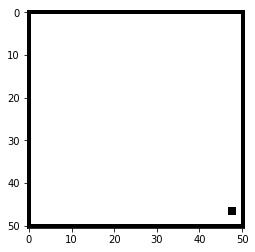

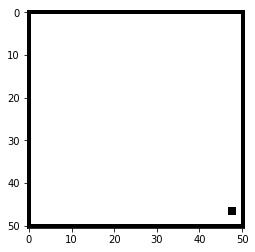

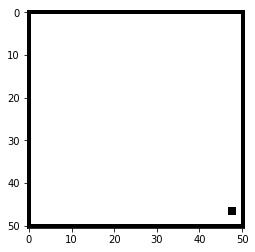

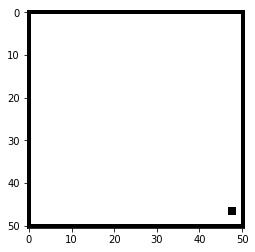

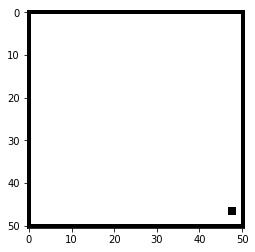

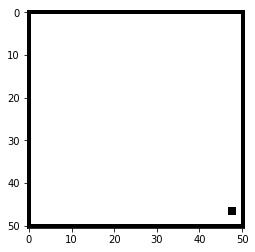

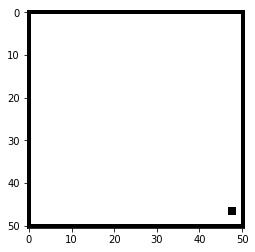

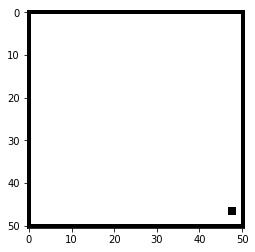

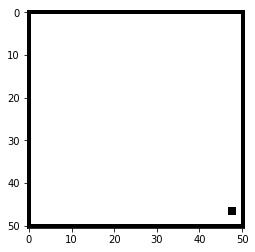

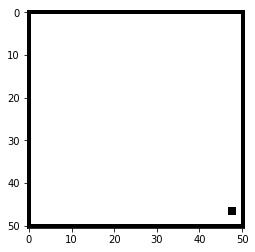

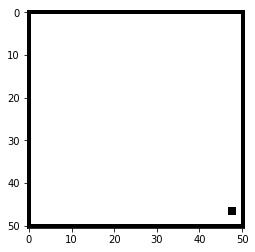

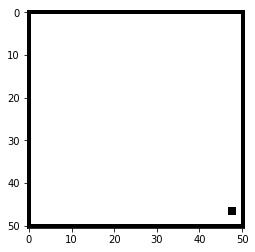

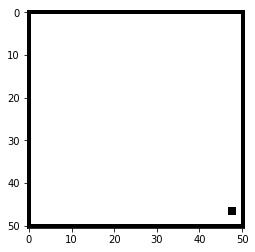

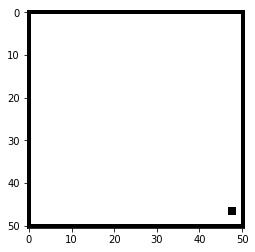

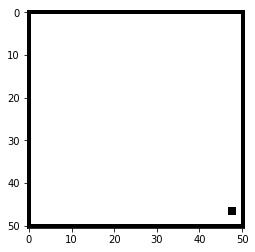

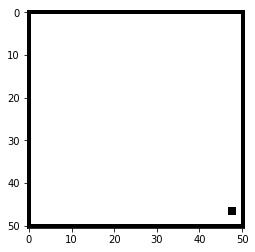

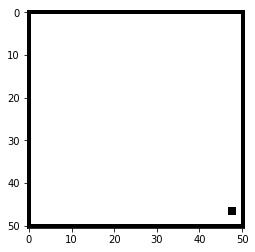

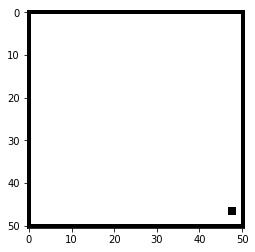

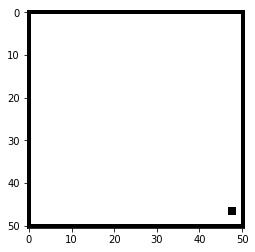

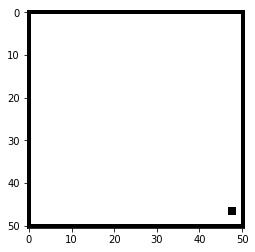

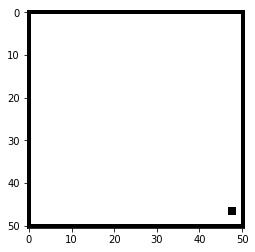

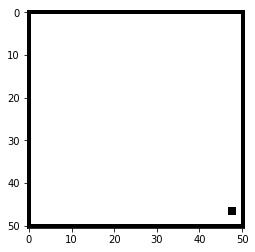

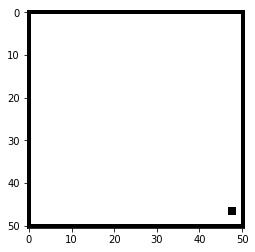

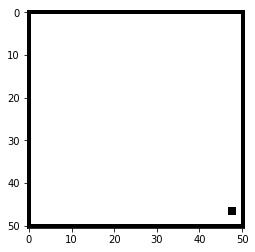

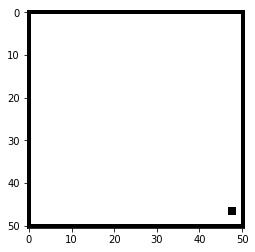

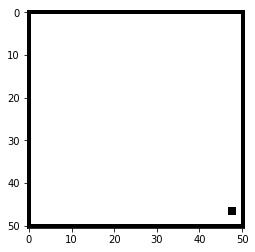

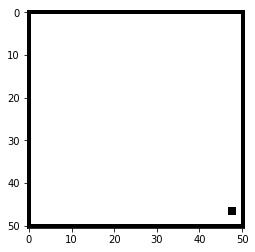

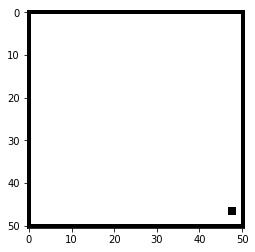

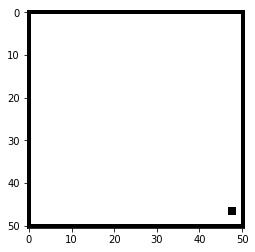

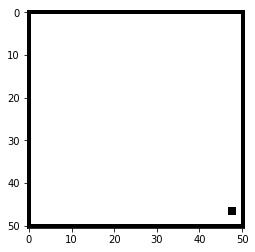

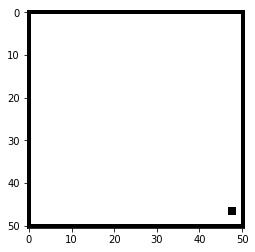

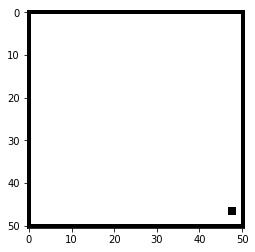

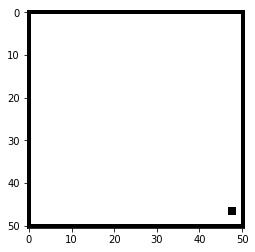

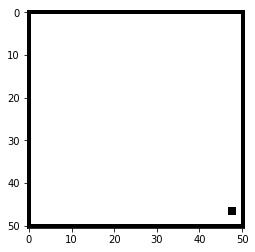

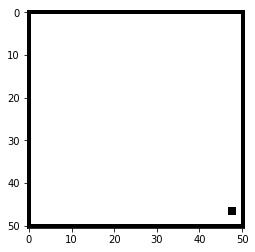

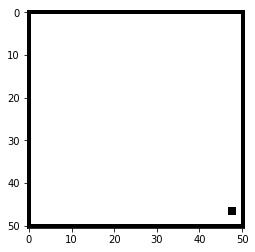

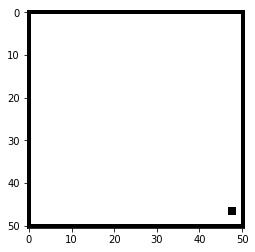

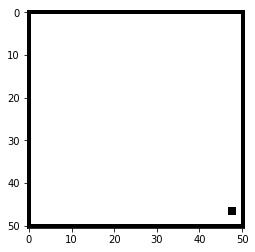

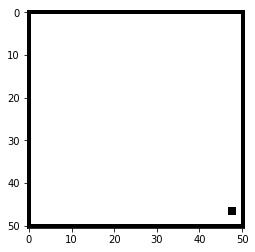

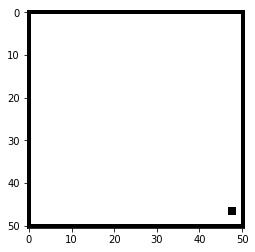

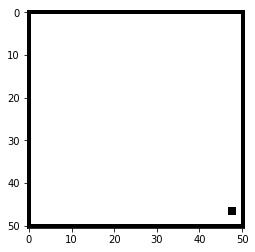

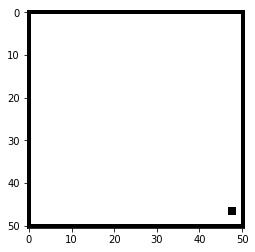

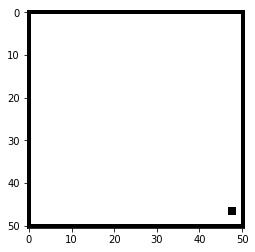

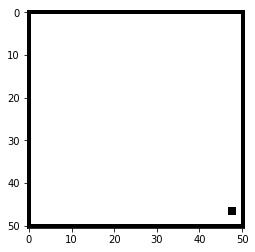

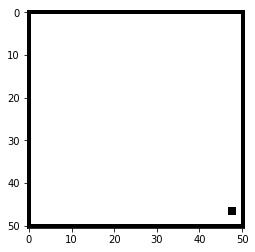

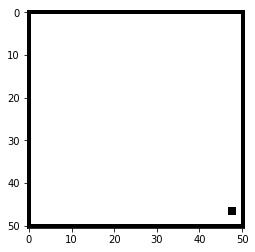

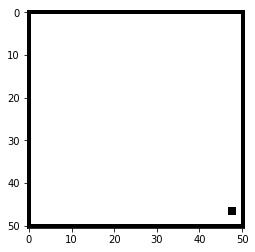

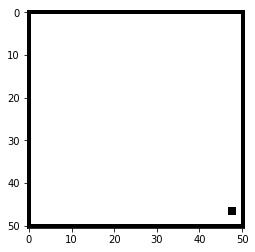

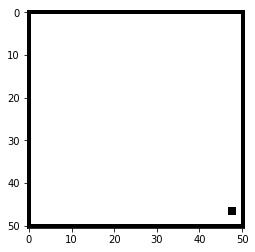

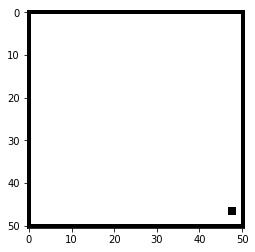

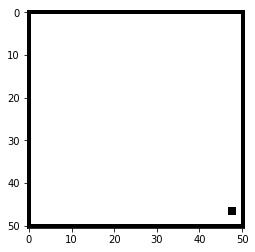

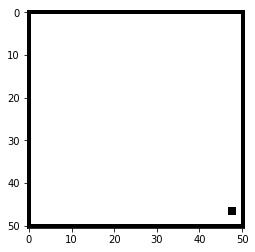

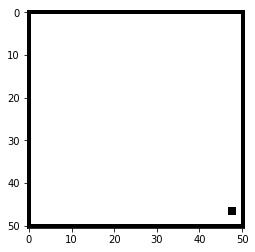

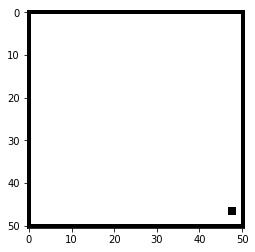

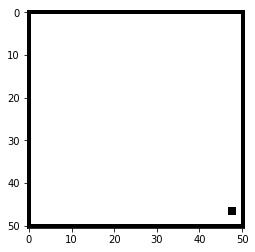

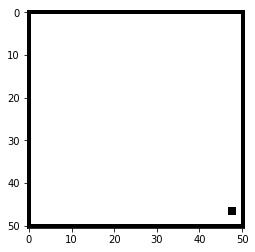

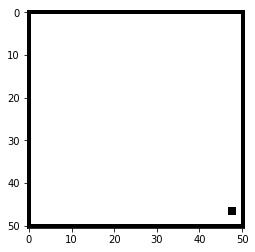

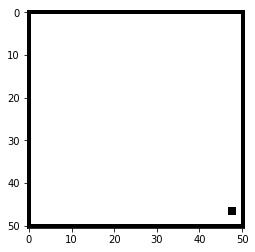

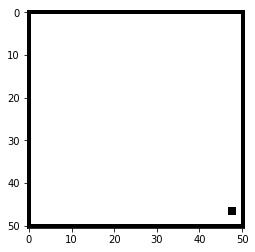

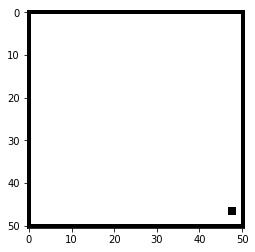

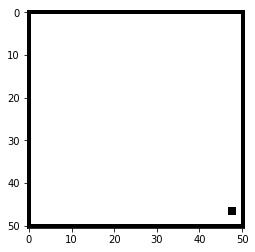

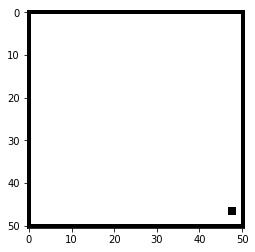

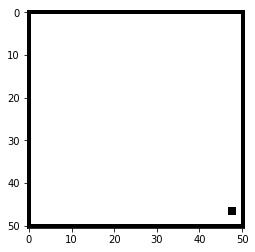

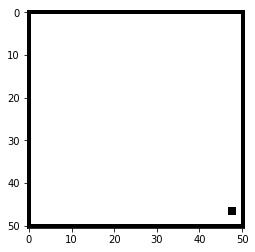

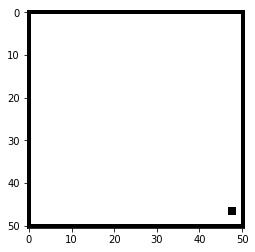

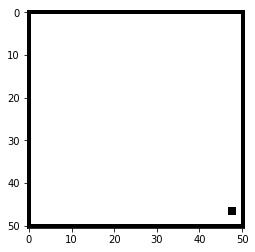

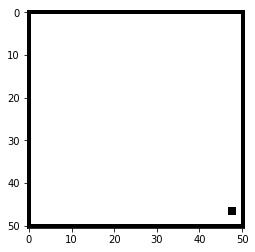

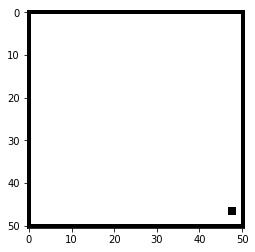

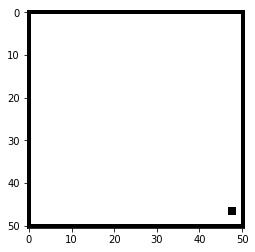

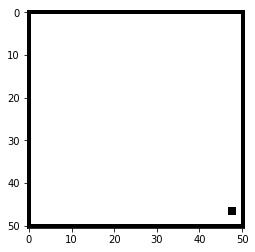

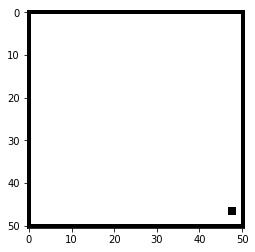

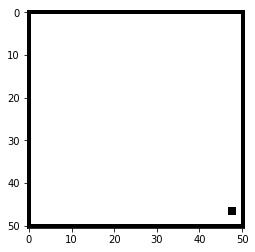

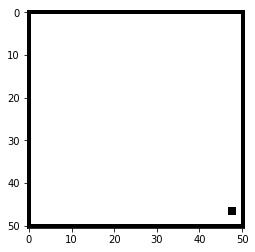

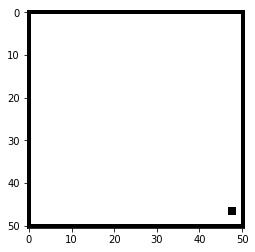

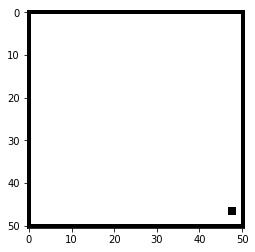

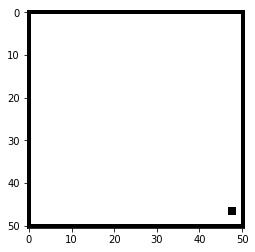

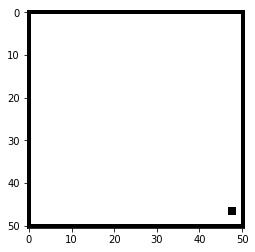

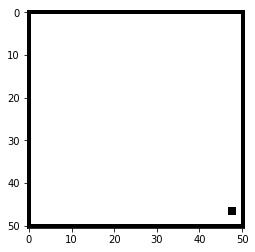

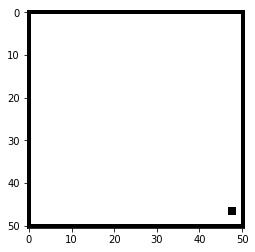

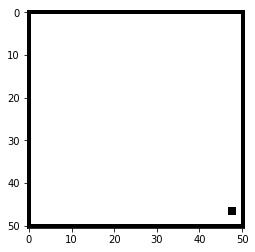

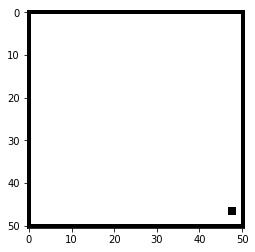

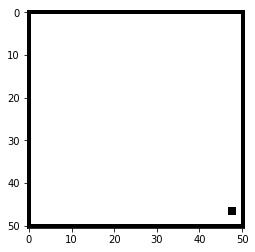

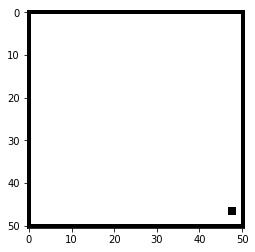

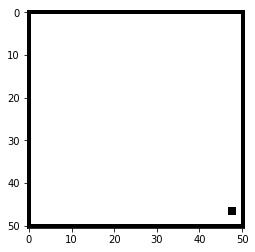

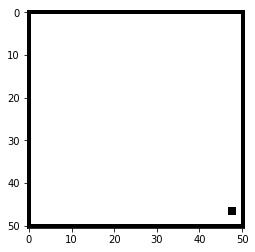

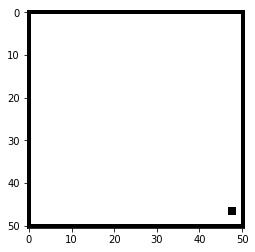

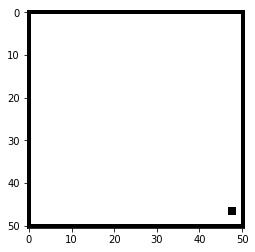

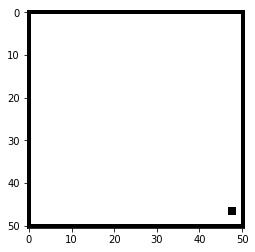

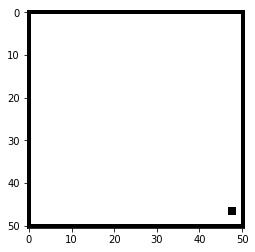

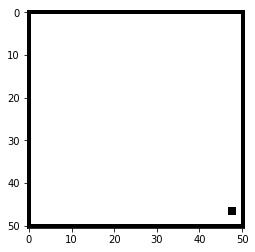

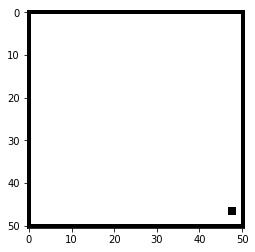

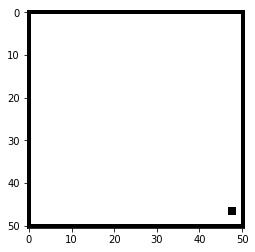

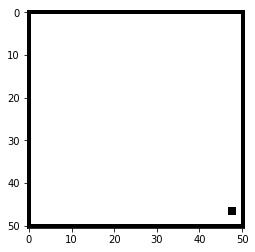

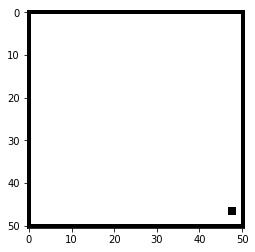

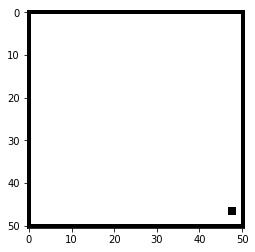

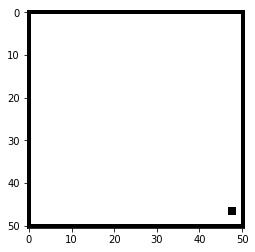

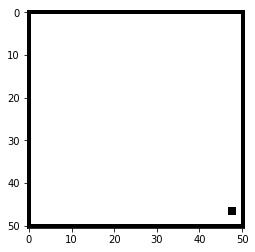

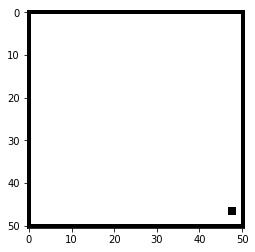

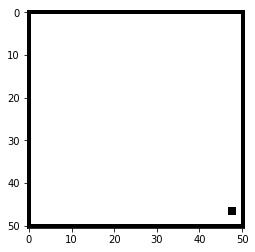

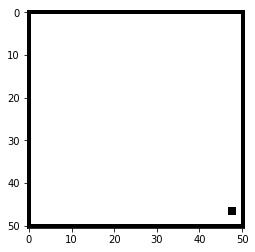

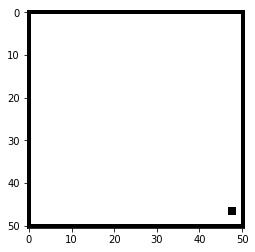

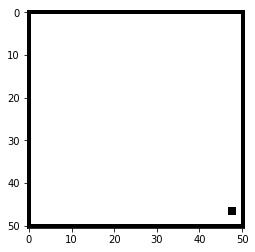

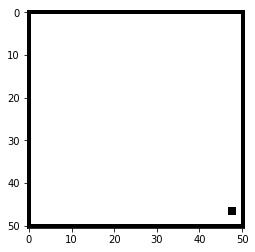

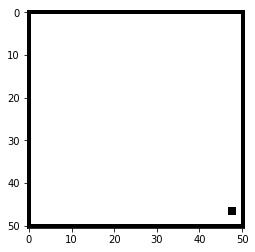

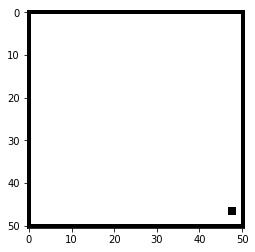

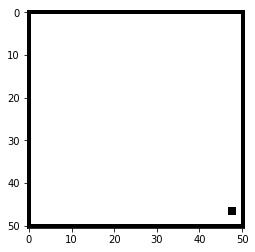

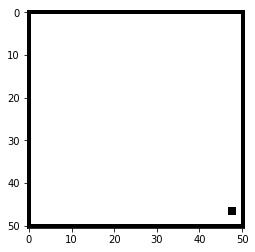

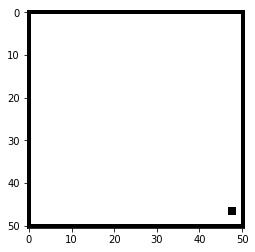

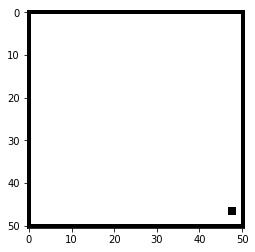

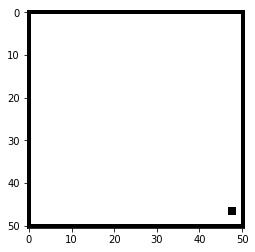

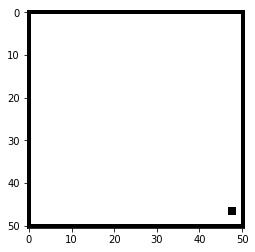

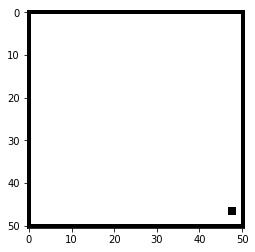

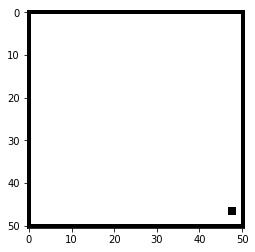

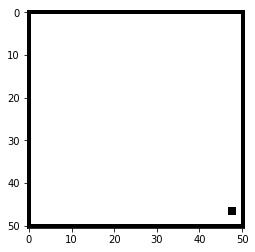

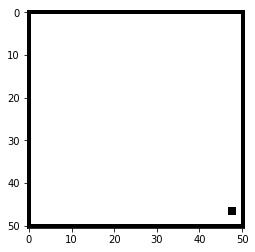

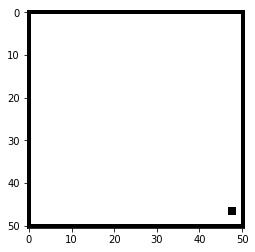

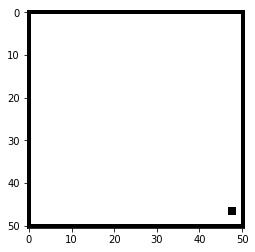

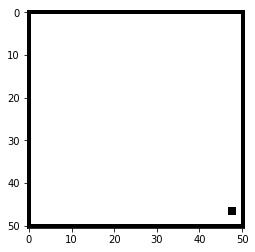

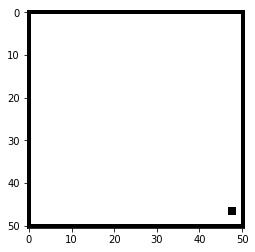

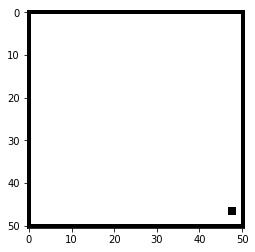

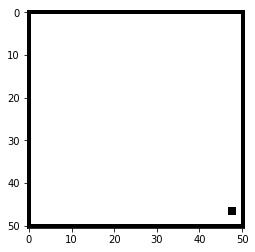

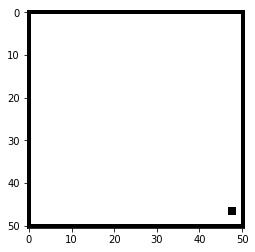

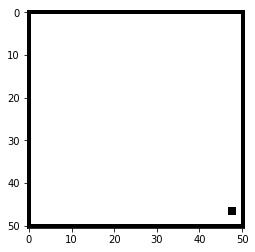

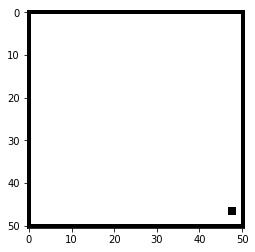

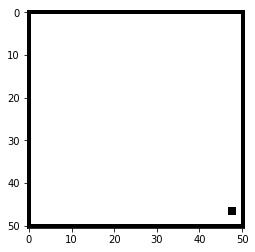

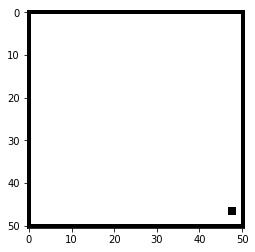

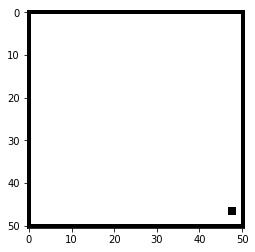

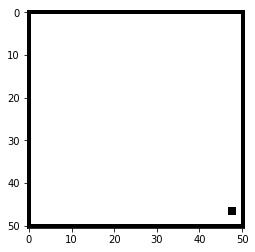

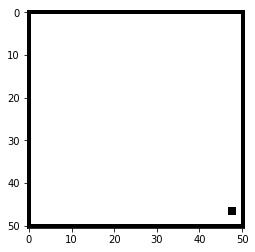

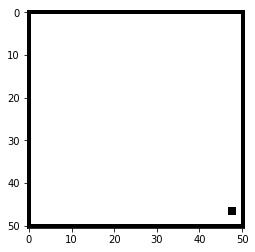

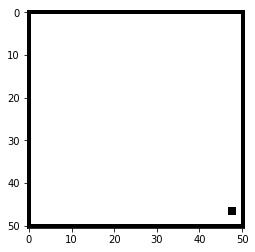

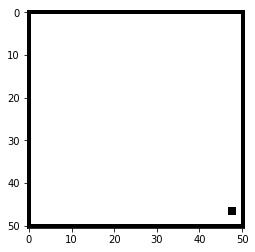

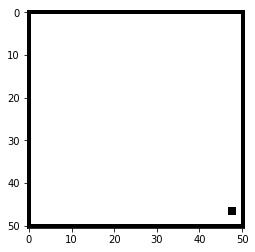

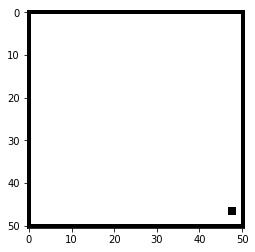

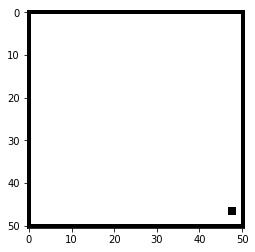

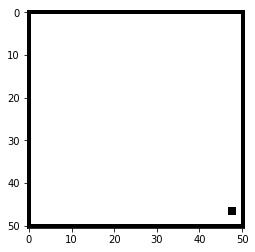

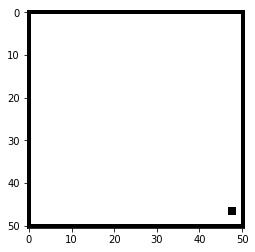

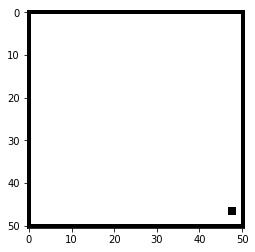

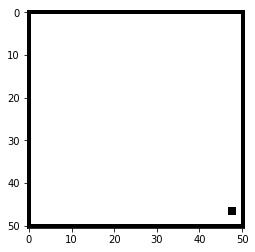

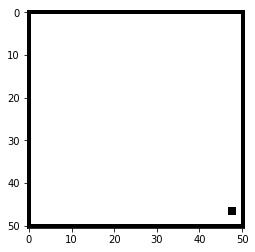

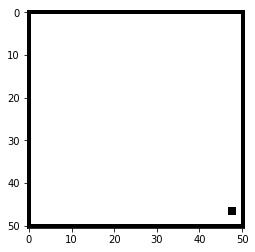

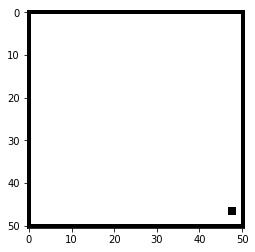

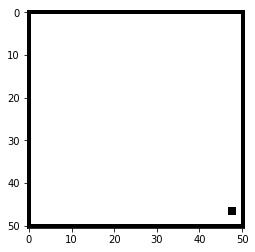

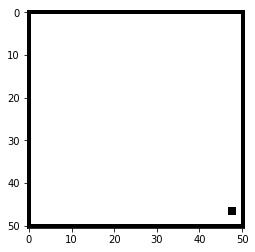

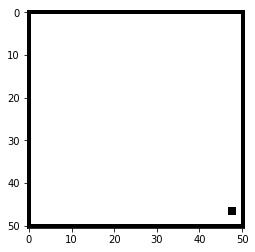

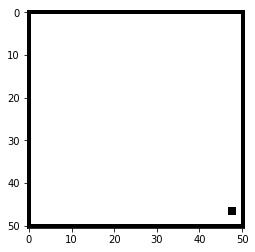

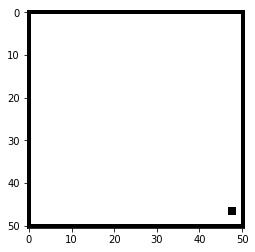

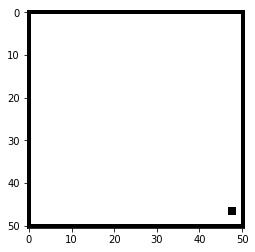

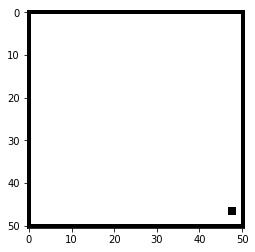

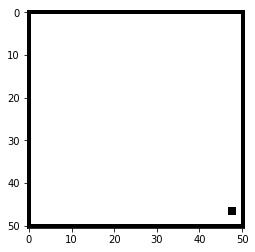

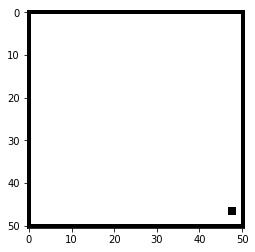

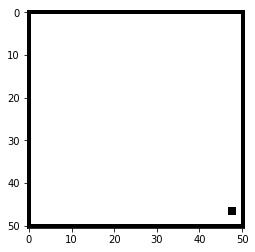

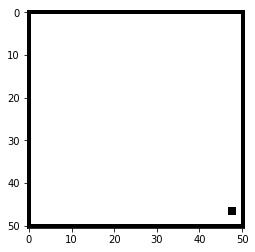

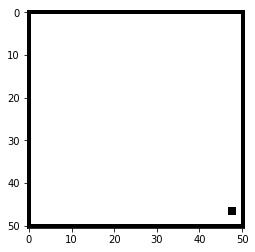

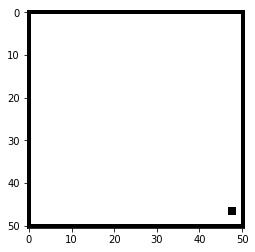

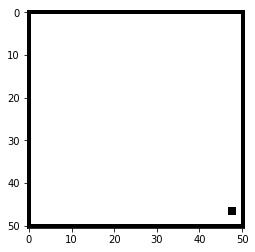

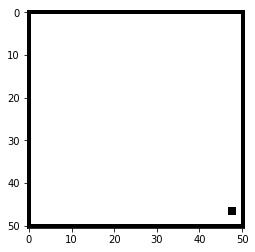

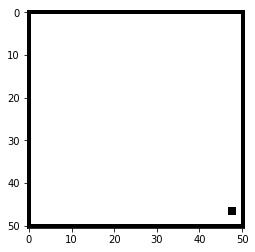

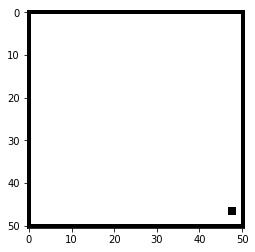

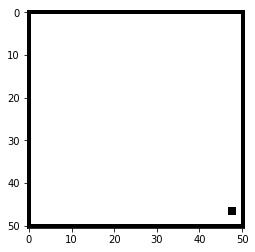

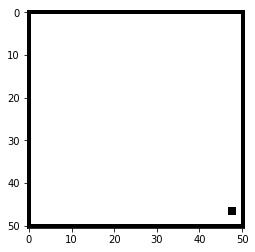

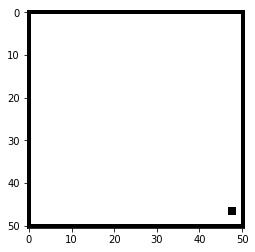

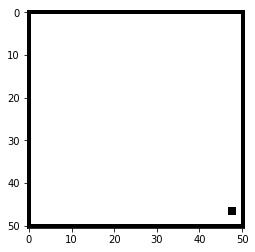

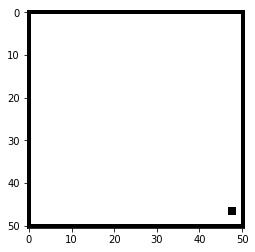

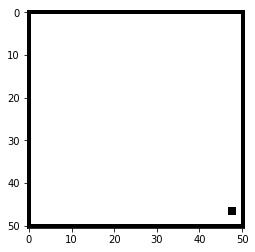

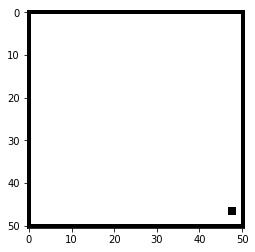

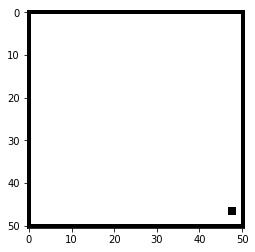

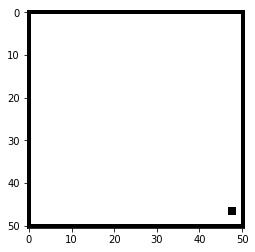

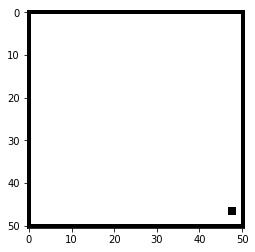

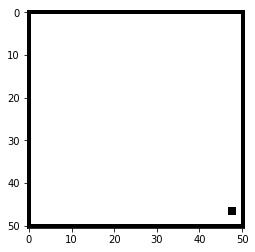

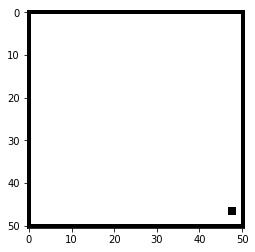

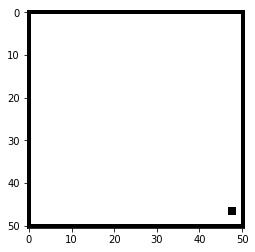

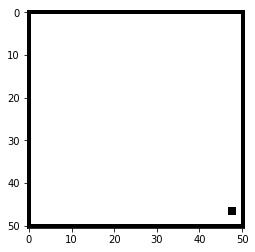

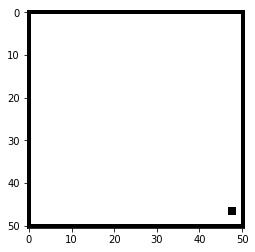

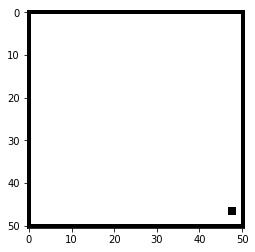

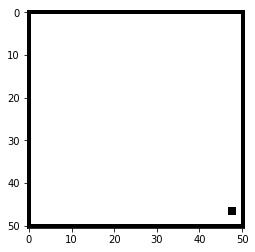

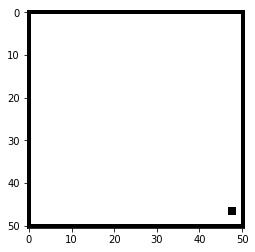

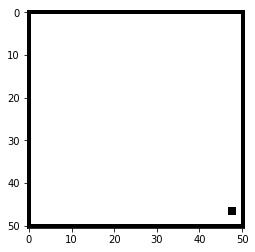

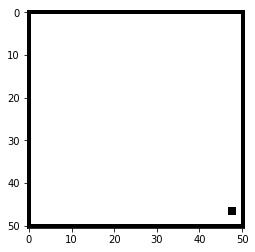

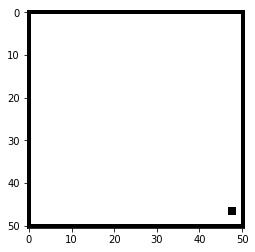

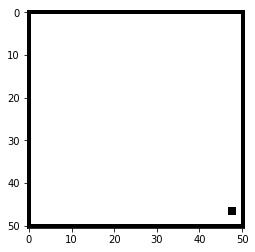

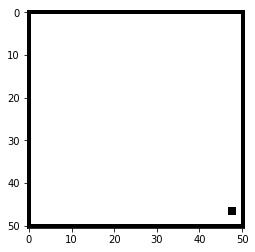

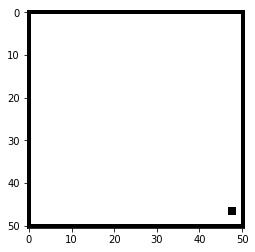

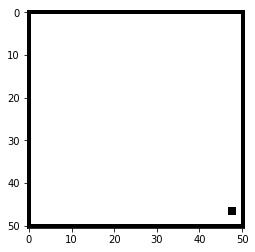

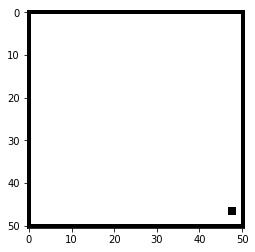

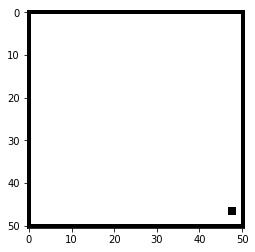

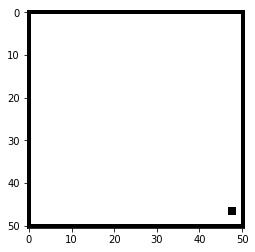

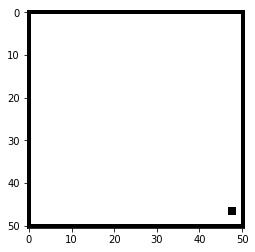

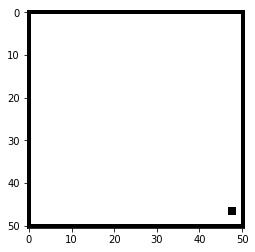

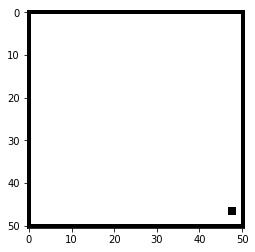

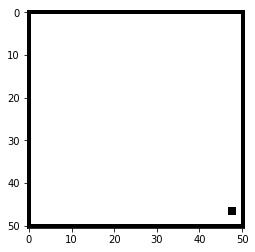

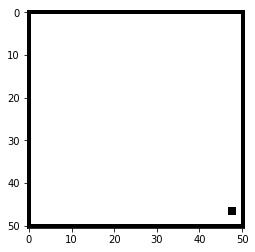

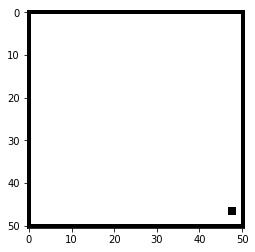

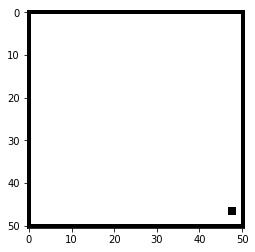

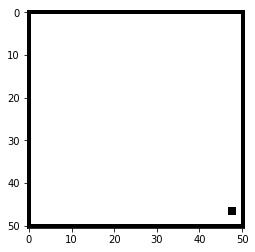

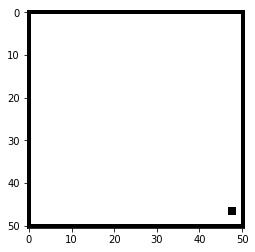

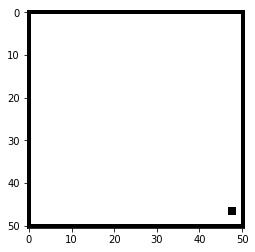

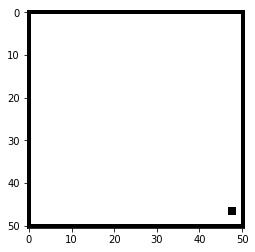

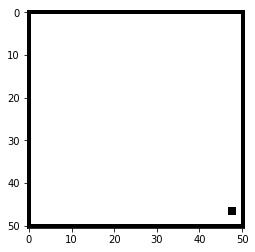

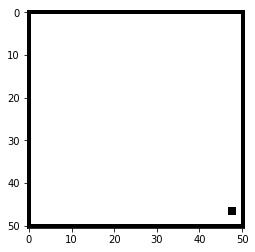

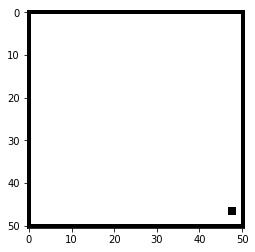

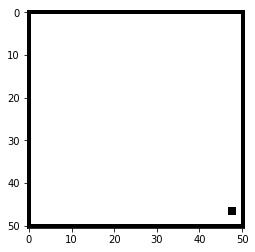

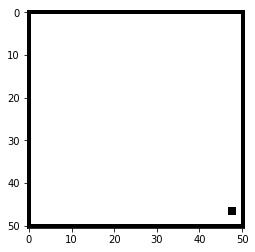

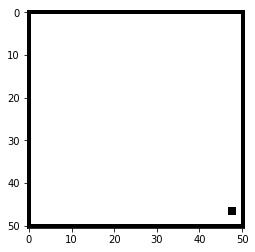

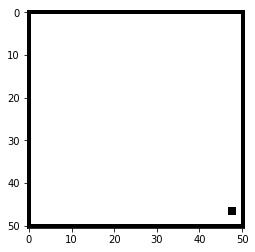

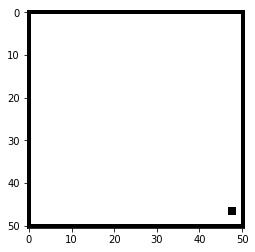

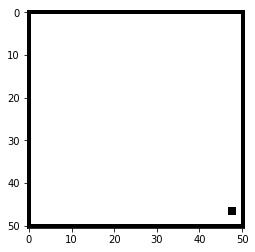

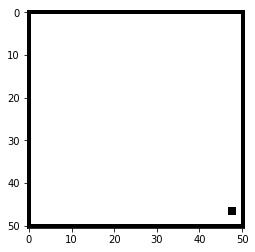

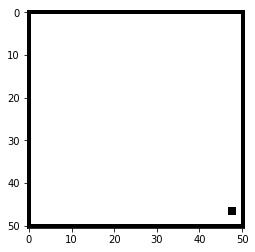

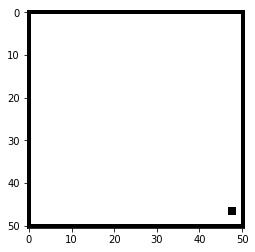

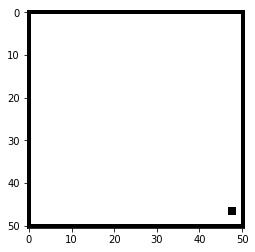

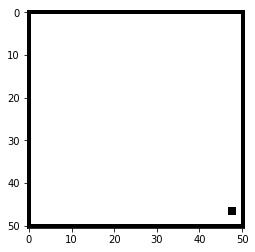

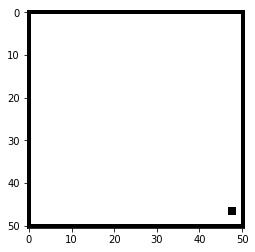

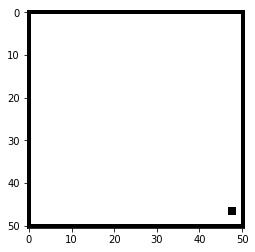

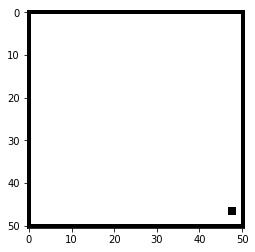

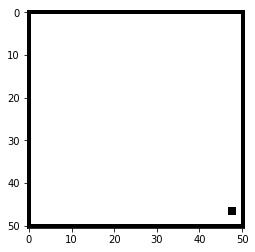

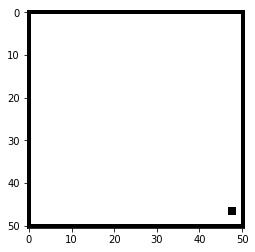

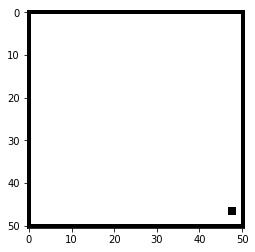

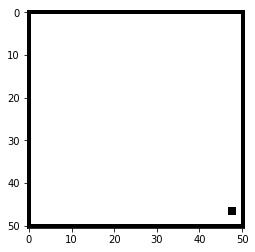

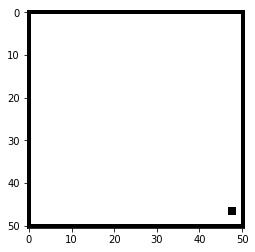

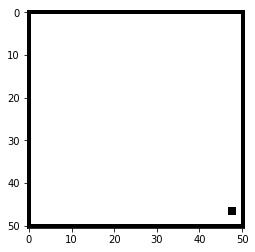

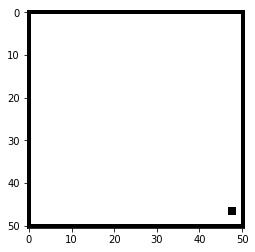

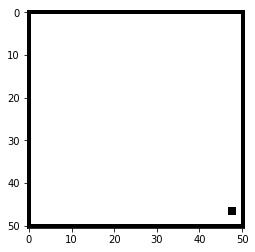

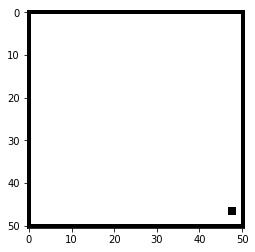

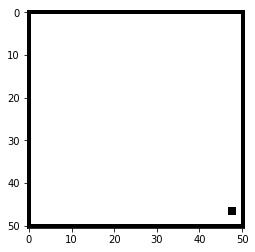

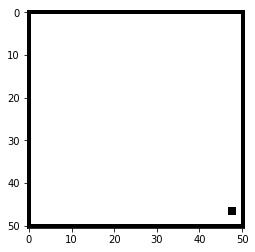

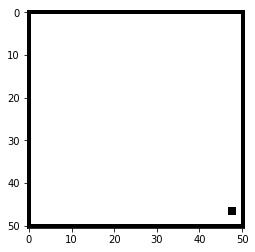

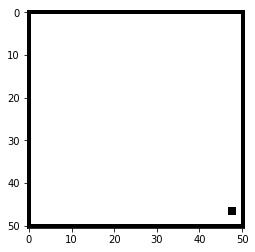

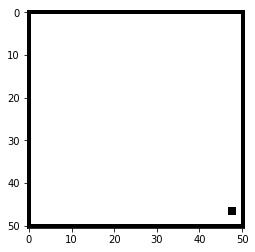

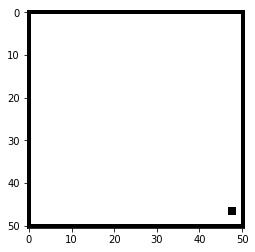

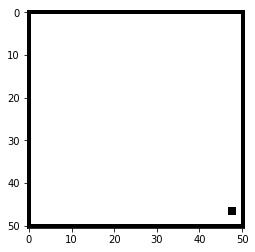

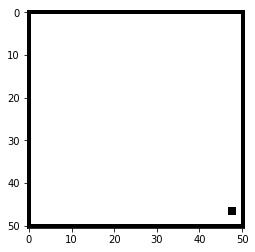

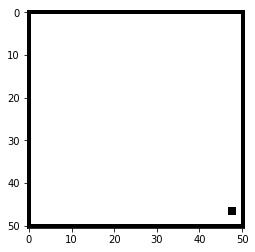

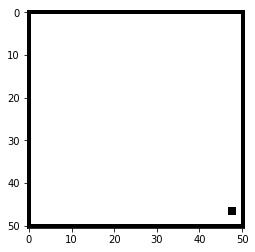

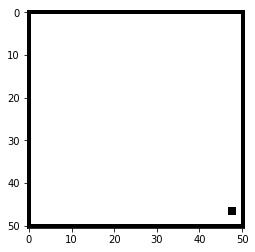

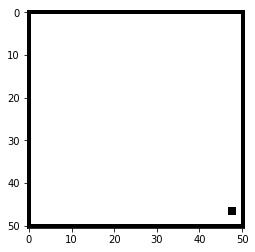

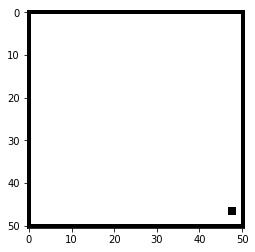

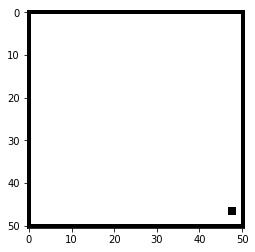

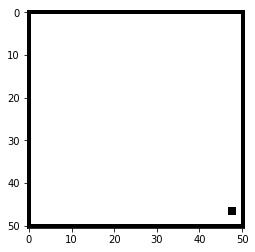

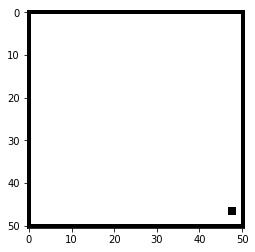

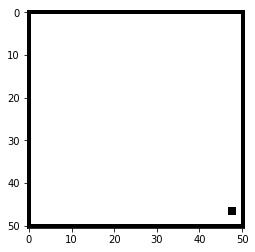

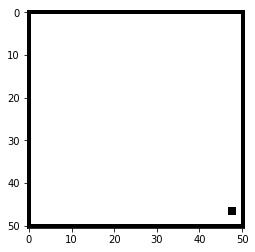

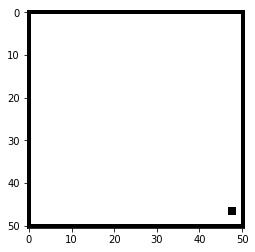

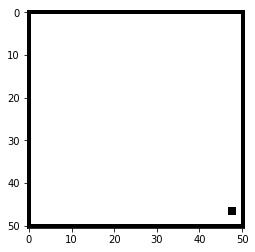

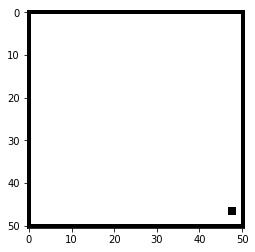

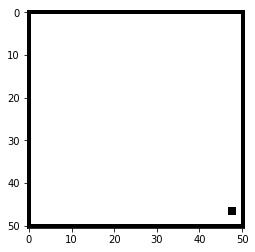

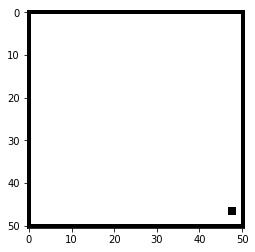

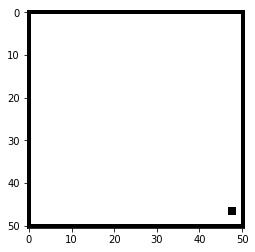

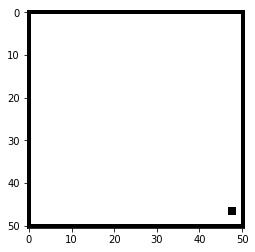

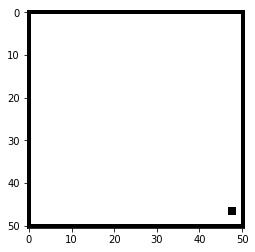

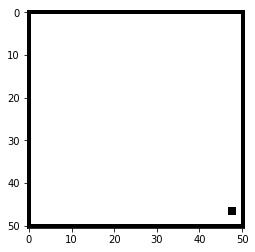

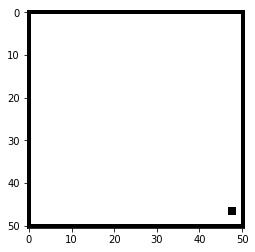

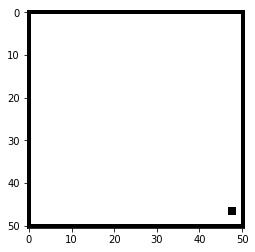

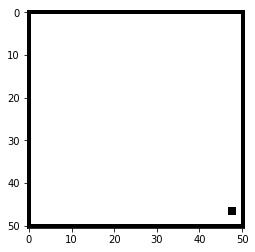

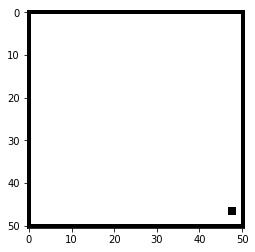

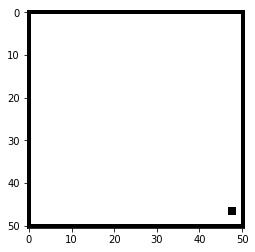

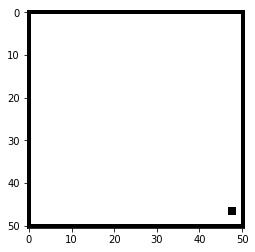

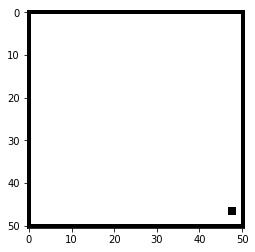

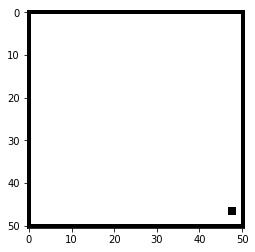

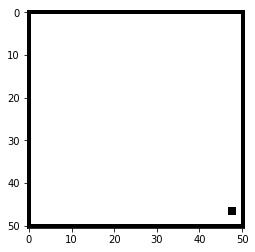

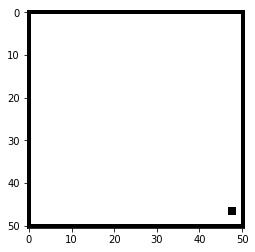

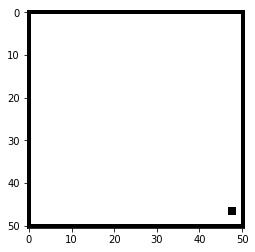

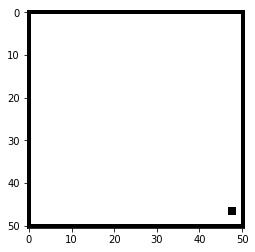

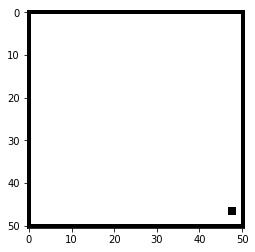

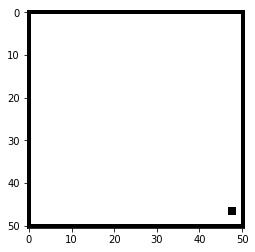

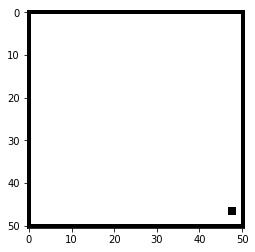

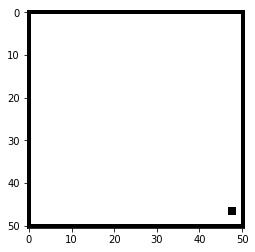

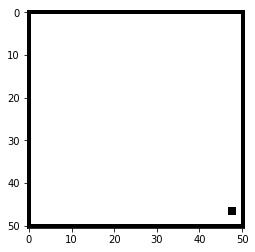

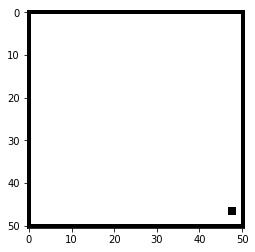

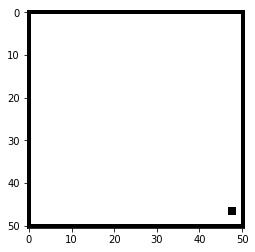

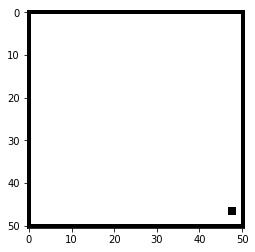

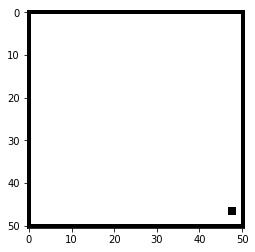

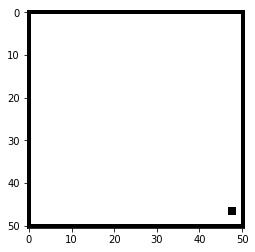

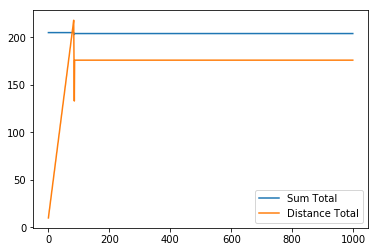

In [222]:
lattice = GliderLat(51)
lattice,sumList, distanceList = manyStepsOnePlot(lattice,1000,B=[3],S=[2,3],locs = [0], vals = [1,2,2,2],boundary = True,analysis = True)
